# Exploring Health Effects related to PFAS Contamination in Colorado

## Part 1: Sourcing PFAS Contamination Data from Colorado

**Overview**
In this section, we focus on gathering data related to Per- and Polyfluoroalkyl Substances (PFAS) contamination across various counties in Colorado. Understanding the distribution and concentration of PFAS is crucial for assessing environmental impact and public health risks associated with water quality.

**Data Source**
The primary source for our PFAS contamination data is the Colorado Department of Public Health and Environment (CDPHE). This dataset includes comprehensive sampling results from water testing conducted across the state, aiming to monitor the levels of various PFAS compounds in public water systems.

**Access the data here**: [Colorado Department of Public Health and Environment - PFAS Data](https://cdphe.colorado.gov/dwinfo)

**Data Cleaning and Exploratory Data Analysis (EDA)**
Upon acquiring the data, the following steps are undertaken to prepare it for analysis:
1. **Data Cleaning**:
   - Removing duplicates and irrelevant entries.
   - Handling missing values appropriately, either by imputation or removal, depending on their impact on subsequent analysis.
   - Ensuring consistency in data formatting, particularly for datetime and categorical data types.
2. **Exploratory Data Analysis**:
   - **Statistical Summary**: Descriptive statistics to understand the distribution of PFAS levels.
   - **Visualization**: Creating plots to visually explore the data trends over time and across different regions.
   - **Correlation Analysis**: Identifying potential correlations between PFAS levels and demographic or geographic features.

**Objectives**
- **Identify hotspots**: Pinpoint areas with unusually high PFAS levels.
- **Trend analysis**: Examine how PFAS contamination has changed over time across Colorado.
- **Impact assessment**: Correlate PFAS levels with population density and water source types to understand potential public health impacts.

By the end of this section, we aim to have a cleaned and well-understood dataset that can be used for more detailed analysis and modeling in subsequent sections.


In [4]:
# Import pandas library
import pandas as pd

### Loading the First Dataset: All Sample Results (2021-Present)  
Data is sourced from the [Colorado Department of Public Health and Environment - All Sample Results (2021-Present)](https://drive.google.com/file/d/1bbtjOixYKWTonkgO-2zEAQI6Tgf41Q8T/view?usp=sharing).  

Colorado began testing for PFAS in 2020, but early analysis methods were still being refined, making some initial results less reliable.

In [6]:
# Load Colorado drinking water from 2021-present
cowater1 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/co_drinking_21_present1.csv')

In [7]:
cowater1.shape

(1016001, 24)

In [8]:
#display analyte list
analyte_list = cowater1["Analyte Name"].unique()
print(analyte_list)

['E. COLI' 'COLIFORM (TCR)' 'LEAD' 'COPPER FREE' 'TDS'
 'HARDNESS TOTAL (AS CACO3)' 'MANGANESE' 'IRON' 'CALCIUM'
 'TOTAL HALOACETIC ACIDS (HAA5)' 'DIBROMOACETIC ACID'
 'MONOBROMOACETIC ACID' 'TRICHLOROACETIC ACID' 'DICHLOROACETIC ACID'
 'MONOCHLOROACETIC ACID' 'TTHM' 'DIBROMOCHLOROMETHANE'
 'BROMODICHLOROMETHANE' 'BROMOFORM' 'CHLOROFORM' 'FLUORIDE' 'CHLORIDE'
 'SULFATE' 'PH' 'ODOR' 'COLOR' 'NITRATE' 'ARSENIC' 'BROMATE'
 'CIS-12-DICHLOROETHYLENE' '124-TRICHLOROBENZENE' '11-DICHLOROETHYLENE'
 'VINYL CHLORIDE' 'P-DICHLOROBENZENE' 'O-DICHLOROBENZENE'
 'DICHLOROMETHANE' 'XYLENES TOTAL' 'TRICHLOROETHYLENE'
 '12-DICHLOROPROPANE' 'CARBON TETRACHLORIDE' '111-TRICHLOROETHANE'
 '12-DICHLOROETHANE' 'TRANS-12-DICHLOROETHYLENE' '112-TRICHLOROETHANE'
 'STYRENE' 'ETHYLBENZENE' 'TOLUENE' 'BENZENE' 'CHLOROBENZENE'
 'TETRACHLOROETHYLENE' 'CHLORITE' 'THALLIUM TOTAL' 'BERYLLIUM TOTAL'
 'ANTIMONY TOTAL' 'SODIUM' 'SELENIUM' 'NICKEL' 'MERCURY' 'CHROMIUM'
 'CADMIUM' 'BARIUM' 'ETHYLENE DIBROMIDE' '12-DIBROMO-3-

#### Filtering Dataset for PFAS Analytes

The dataset is filtered to include only PFAS-related compounds.

In [10]:
# Filter only PFAS analytes of interest
selected_analytes = [
 'PERFLUOROCTANE SULFONIC ACID (PFOS)', 'PERFLUORONONANOIC ACID (PFNA)',
 'PERFLUOROHEXANE SULFONIC ACID (PFHxS)', 'PERFLUOROHEPTANOIC ACID (PFHPA)',
 'PERFLUOROBUTANE SULFONIC ACID (PFBS)', '11CL-PF3OUDS',
 'PERFLUOROUNDECANOIC ACID (PFUNA)', 'PERFLUOROHEXANOIC ACID (PFHXA)',
 'PERFLUORODODECANOIC ACID (PFDOA)', 'PERFLUORODECANOIC ACID (PFDA)',
 'PERFLUOROCTANOIC ACID (PFOA)', 'PERFLUOROHEXANE SULFONIC ACID 4:2 FTS',
 'PERFLUOROOCTANE SULFONIC ACID 6:2 FTS', 'PERFLUOROBUTANOIC ACID (PFBA)',
 'HFPO-DA', 'ADONA', '9CL-PF3ONS', 'NONAFLUORO NFDHA', 'PERFLUORO PFEESA',
 'PERFLUORO PFMBA', 'PERFLUOROPENTANOIC ACID (PFPEA)', 'PERFLUORO PFMPA',
 'PERFLUORODECANE SULFONIC ACID 8:2 FTS',
 'PERFLUOROHEPTANESULFONIC ACID (PFHPS)',
 'PERFLUOROPENTANESULFONIC ACID (PFPES)',
]

filtered_cowater1 = cowater1[cowater1["Analyte Name"].isin(selected_analytes)].copy()

In [11]:
filtered_cowater1.shape

(933, 24)

In [12]:
filtered_cowater1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 1351 to 602582
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PWS ID               933 non-null    object 
 1   PWS Name             933 non-null    object 
 2   PWS Status           933 non-null    object 
 3   PWS Type             933 non-null    object 
 4   PWS Source Type      683 non-null    object 
 5   Population           933 non-null    int64  
 6   County               933 non-null    object 
 7   Facility Name        933 non-null    object 
 8   Facility ID          933 non-null    object 
 9   Facility Type        933 non-null    object 
 10  Sample Point ID      933 non-null    object 
 11  Sample Point Type    933 non-null    object 
 12  labName              933 non-null    object 
 13  Lab Sample ID        933 non-null    object 
 14  Analyte Name         933 non-null    object 
 15  Sample Type          933 non-null    ob

#### Standardizing Units of Measurement to Parts Per Trillion (ppt)

All concentration measurements in the dataset are standardized to parts per trillion (ppt). This adjustment includes converting measurements from micrograms per liter (UG/L) to ppt and setting missing entires to ppt.  This ensure consistency when analyzing the data.

In [14]:
# Display unique units of measure and their frequency
print(filtered_cowater1['Unit Of Measure'].value_counts(dropna=False))

Unit Of Measure
NG/L    861
UG/L     49
NaN      23
Name: count, dtype: int64


In [15]:
# Convert UG/L to ppt (since 1 UG/L = 1000 NG/L = 1000 ppt)
mask = filtered_cowater1['Unit Of Measure'] == 'UG/L'
filtered_cowater1.loc[mask, 'Measure'] *= 1000  # Convert UG/L to NG/L which is equivalent to ppt
filtered_cowater1.loc[mask, 'Unit Of Measure'] = 'ppt'

# Convert NG/L to ppt (since 1 NG/L = 1 ppt)
mask_ng = filtered_cowater1['Unit Of Measure'] == 'NG/L'
filtered_cowater1.loc[mask_ng, 'Unit Of Measure'] = 'ppt'

# Fill missing 'Unit Of Measure' with ppt
filtered_cowater1['Unit Of Measure'] = filtered_cowater1['Unit Of Measure'].fillna('ppt')

# Check the updated distribution of units
print(filtered_cowater1['Unit Of Measure'].value_counts())

# Check if there are any null values in 'Unit Of Measure'
if filtered_cowater1['Unit Of Measure'].isnull().sum() == 0:
    print("No missing values in 'Unit Of Measure'.")
else:
    print("Warning: There are missing values in 'Unit Of Measure'.")

# Check if all measurements are now standardized to 'ppt'
if all(filtered_cowater1['Unit Of Measure'] == 'ppt'):
    print("All measurements have been successfully standardized to 'ppt'.")
else:
    print("Error: Not all measurements are standardized to 'ppt'. Check for inconsistencies.")

Unit Of Measure
ppt    933
Name: count, dtype: int64
No missing values in 'Unit Of Measure'.
All measurements have been successfully standardized to 'ppt'.


#### Enhancing the Dataset with Geographic Features

Using the Public Water System ID (PWS ID) as a key, zip code and state information were added to our dataset. This data was sourced from the EPA's Envirofacts database (https://enviro.epa.gov/envirofacts/sdwis/search#water_id), ensuring accurate and reliable geographic details for each water system. These features enable more precise geographic analysis and reporting.

In [17]:
# Display unique PWS names from the DataFrame
unique_pws_names = filtered_cowater1['PWS Name'].unique()
print(unique_pws_names)

['AURORA CITY OF' 'CLIFTON WD' 'GRANDVIEW MHP' 'LITTLE GEM MHP'
 '301 BROADWAY AVE' 'ALPINE VILLAGE MHP' 'ALTA VISTA PARK' 'ARROWHEAD MHP'
 'CIRCLE DRIVE MOBILE HOME PARK' 'COTTONWOOD MOBILE HOME PARK'
 'DOWNIEVILLE TRAILER PARK' 'ELEVADO ESTATES LLC' 'EMPIRE JUNCTION MHP'
 'ENGLEWOOD CITY OF' 'FOXRIDGE FARMS MHP' 'GRAND VIEW MHP'
 'INSPIRATION VALLEY MHP' 'JOHNSON TRAILER PARK' 'LOVELAND CITY OF'
 'MAY ROSE LANE MOBILE HOME PARK' 'MONHEISER MOBILE HOME PARK'
 'MOUNTAIN VALLEY ESTATES' 'OLD HOMESTEAD MHP' 'OVERLAND MOBILE HOME PARK'
 'SECURITY MHP' 'SHERIDAN MHP' 'STEWARTS MOBILE HOME PARK'
 'VALDEZ MOBILE HOME PARK' 'WIKIUP MHP' 'DURANGO CITY OF' 'IDALIA SCHOOL'
 'UTE WCD' 'DIVIDE WATER PROVIDERS INC']


In [18]:
# Group by 'PWS Name' and aggregate the unique values for both 'PWS ID' and 'County'
grouped_pws = filtered_cowater1.groupby('PWS Name').agg({
    'PWS ID': 'unique',
    'County': 'unique',
    'Population': 'unique'
}).reset_index()

# Display the grouped data
print(grouped_pws)

                          PWS Name       PWS ID         County Population
0                 301 BROADWAY AVE  [CO0102155]      [ALAMOSA]       [32]
1               ALPINE VILLAGE MHP  [CO0160050]       [TELLER]       [80]
2                  ALTA VISTA PARK  [CO0125113]        [GRAND]       [13]
3                    ARROWHEAD MHP  [CO0121050]      [EL PASO]      [135]
4                   AURORA CITY OF  [CO0103005]     [ARAPAHOE]   [487365]
5    CIRCLE DRIVE MOBILE HOME PARK  [CO0121177]      [EL PASO]      [544]
6                       CLIFTON WD  [CO0139180]         [MESA]    [34500]
7      COTTONWOOD MOBILE HOME PARK  [CO0102185]      [ALAMOSA]       [94]
8       DIVIDE WATER PROVIDERS INC  [CO0160195]       [TELLER]      [570]
9         DOWNIEVILLE TRAILER PARK  [CO0110220]  [CLEAR CREEK]       [13]
10                 DURANGO CITY OF  [CO0134150]     [LA PLATA]    [33787]
11             ELEVADO ESTATES LLC  [CO0130025]    [JEFFERSON]      [250]
12             EMPIRE JUNCTION MHP  [C

In [19]:
# Convert the array of unique PWS names to a DataFrame
pws_names_df = pd.DataFrame(unique_pws_names, columns=['PWS Name'])

# Save to CSV
pws_names_df.to_csv('pws_names.csv', index=False)

print("PWS names have been exported to pws_names.csv.")

PWS names have been exported to pws_names.csv.


I used the EPA Envirofacts database to retrieve zip code and city information for each Public Water System (PWS). This data is then recorded in a CSV file and subsequently imported for merging with the main DataFrame.

In [21]:
# Load the CSV file into a DataFrame
zipcode_data = pd.read_csv('pws_names_zips.csv')

# Check the first few rows to confirm it's loaded correctly
print(zipcode_data.head())

           PWS Name  Zipcode           City
0    AURORA CITY OF    80016          Auroa
1        CLIFTON WD    81520        Clifton
2     GRANDVIEW MHP    80133    Palmer Lake
3    LITTLE GEM MHP    80866  Woodland Park
4  301 BROADWAY AVE    81101        Alamosa


In [22]:
# Merge the DataFrames
filtered_cowater1 = pd.merge(filtered_cowater1, zipcode_data, on='PWS Name', how='left')

# Check the first few rows of the merged DataFrame
filtered_cowater1.head()

PWS ID        PWS Name PWS Status PWS Type PWS Source Type  Population  \
0  CO0103005  AURORA CITY OF          A        C              SW      487365   
1  CO0103005  AURORA CITY OF          A        C              SW      487365   
2  CO0103005  AURORA CITY OF          A        C              SW      487365   
3  CO0103005  AURORA CITY OF          A        C              SW      487365   
4  CO0103005  AURORA CITY OF          A        C              SW      487365   

     County          Facility Name Facility ID Facility Type  ...  \
0  ARAPAHOE  THOMAS J GRISWOLD WTP         001            TP  ...   
1  ARAPAHOE  THOMAS J GRISWOLD WTP         001            TP  ...   
2  ARAPAHOE  THOMAS J GRISWOLD WTP         001            TP  ...   
3  ARAPAHOE  THOMAS J GRISWOLD WTP         001            TP  ...   
4  ARAPAHOE  THOMAS J GRISWOLD WTP         001            TP  ...   

           Collection Date Measure Unit Of Measure Free Chlorine  \
0  2025-01-10 00:00:00.000     0.0             ppt           NaN   
1  2025-01-10 00:00:00.000     0.0             ppt           NaN   
2  2025-01-10 00:00:00.000     0.0             ppt           NaN   
3  2025-01-10 00:00:00.000     0.0             ppt           NaN   
4  2025-01-10 00:00:00.000     0.0             ppt           NaN   

  Total Chlorine Detection Type Detection Limit  Detection Limit UOM Zipcode  \
0            NaN            MRL            1.82                 NG/L   80016   
1            NaN            MRL            1.97                 NG/L   80016   
2            NaN            MRL            1.79                 NG/L   80016   
3            NaN            MRL            1.97                 NG/L   80016   
4            NaN            MRL            1.75                 NG/L   80016   

    City  
0  Auroa  
1  Auroa  
2  Auroa  
3  Auroa  
4  Auroa  

[5 rows x 26 columns]

### Loading the Second Dataset: PFCS and PFAS Sample Results  
Data is sourced from the [Colorado Department of Public Health and Environment - PFCS and PFAS Sample Results](https://cohealthviz.dphe.state.co.us/t/EnvironmentalEpidemiologyPublic/views/PFAS_results_DRAFT/SamplingSummary?%3AshowAppBanner=false&%3Adisplay_count=n&%3AshowVizHome=n&%3Aorigin=viz_share_link&%3AisGuestRedirectFromVizportal=y&%3Aembed=y).  

All available PFAS sample results were selected for analysis.

In [24]:
# Load Colorado PFCS and PFAS Sample results
cowater2 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/pfas2020.csv')

In [25]:
# Display head
cowater2.head()

LOC_NAME                         LOC_DESC SYS_SAMPLE_CODE SYS_LOC_CODE  \
0    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
1    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
2    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
3    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
4    11915  Divide Fire Protection District      11915-RW01   11915-RW01   

           SAMPLE_DATE MATRIX_CODE  FIELD_SDG    LAB_SDG      CAS_RN  \
0  2020/04/13 11:13:00           W  320-60237  320-60237  13252-13-6   
1  2020/04/13 11:13:00           W  320-60237  320-60237   1763-23-1   
2  2020/04/13 11:13:00           W  320-60237  320-60237   2058-94-8   
3  2020/04/13 11:13:00           W  320-60237  320-60237   2355-31-9   
4  2020/04/13 11:13:00           W  320-60237  320-60237   2991-50-6   

                                       CHEMICAL_NAME  ...  \
0               Hexafluoropropylene oxide dimer acid  ...   
1                Perfluorooctanesulfonic acid (PFOS)  ...   
2                   Perfluoroundecanoic acid (PFUnA)  ...   
3  N-methyl perfluorooctanesulfonamidoacetic acid...  ...   
4  N-ethyl perfluorooctanesulfonamidoacetic acid ...  ...   

  METHOD_DETECTION_LIMIT REPORTING_DETECTION_LIMIT  LAB_QUALIFIERS  PPT_unit  \
0                   1.30                       3.4               U       ppt   
1                   0.45                       1.7               U       ppt   
2                   0.92                       1.7               U       ppt   
3                   2.60                      17.0               U       ppt   
4                   1.60                      17.0               U       ppt   

       REMARK_1      REMARK_2 LOC_TYPE LOC_TYPE_2 dt_location_loc_name  \
0  Fire Station  Fire Station       RW        RAW                11915   
1  Fire Station  Fire Station       RW        RAW                11915   
2  Fire Station  Fire Station       RW        RAW                11915   
3  Fire Station  Fire Station       RW        RAW                11915   
4  Fire Station  Fire Station       RW        RAW                11915   

  LOC_PURPOSE  
0          FS  
1          FS  
2          FS  
3          FS  
4          FS  

[5 rows x 24 columns]

In [26]:
# Display info
cowater2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16180 entries, 0 to 16179
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LOC_NAME                   16180 non-null  object 
 1   LOC_DESC                   16180 non-null  object 
 2   SYS_SAMPLE_CODE            16180 non-null  object 
 3   SYS_LOC_CODE               16180 non-null  object 
 4   SAMPLE_DATE                16180 non-null  object 
 5   MATRIX_CODE                16180 non-null  object 
 6   FIELD_SDG                  16180 non-null  object 
 7   LAB_SDG                    14562 non-null  object 
 8   CAS_RN                     16180 non-null  object 
 9   CHEMICAL_NAME              16180 non-null  object 
 10  DETECT_FLAG                16180 non-null  object 
 11  REPORT_RESULT_TEXT         16180 non-null  object 
 12  RESULT_NUMERIC             2285 non-null   float64
 13  REPORT_RESULT_LIMIT        14562 non-null  flo

In [27]:
# Find analyte list
analyte_list2 = cowater2["CHEMICAL_NAME"].unique()
print(analyte_list2)

['Hexafluoropropylene oxide dimer acid'
 'Perfluorooctanesulfonic acid (PFOS)' 'Perfluoroundecanoic acid (PFUnA)'
 'N-methyl perfluorooctanesulfonamidoacetic acid (MeFOSAA)'
 'N-ethyl perfluorooctanesulfonamidoacetic acid (EtFOSAA)'
 'Perfluorohexanoic acid (PFHxA)' 'Perfluorododecanoic acid (PFDoA)'
 'Perfluorooctanoic acid (PFOA)' 'Perfluorodecanoic acid (PFDA)'
 'Perfluorohexanesulfonic acid (PFHxS)'
 'Perfluorobutanesulfonic acid (PFBS)' 'Perfluoroheptanoic acid (PFHpA)'
 'Perfluorononanoic acid (PFNA)' 'Perfluorotetradecanoic (PFTeA)'
 'Perfluorotridecanoic acid (PFTriA)'
 '9-chlorohexadecafluoro-3-oxanone-1-sulfonic acid (9Cl-PF3ONS)'
 '11-chloroeicosafluoro-3-oxaundecane-1-sulfonic acid (11Cl-PF3OUdS)'
 '4,8-dioxa-3H-perfluorononanoic acid (ADONA)'
 'PFOS and PFOA, Total Combined' 'Total PFAS']


In [28]:
# Find location names
cowater2["LOC_NAME"].unique()

array(['11915', '11930', '12312', '12570', '1357', '1381', '1384', '155',
       '170', '4127', '4910', '5943', '6990', '7760', '8940',
       'CLEAR CREEK', 'CO0101015', 'CO0101025', 'CO0101055', 'CO0101063',
       'CO0101070', 'CO0101080', 'CO0101085', 'CO0101095', 'CO0101115',
       'CO0101125', 'CO0101150', 'CO0101157', 'CO0101158', 'CO0101187',
       'CO0101234', 'CO0102100', 'CO0103005', 'CO0103010', 'CO0103030',
       'CO0103035', 'CO0103045', 'CO0103666', 'CO0104090', 'CO0104121',
       'CO0104300', 'CO0104393', 'CO0104700', 'CO0104900', 'CO0105100',
       'CO0105500', 'CO0105700', 'CO0105800', 'CO0105900', 'CO0107152',
       'CO0107155', 'CO0107401', 'CO0107471', 'CO0107473', 'CO0107485',
       'CO0107489', 'CO0107538', 'CO0107582', 'CO0107610', 'CO0107701',
       'CO0107702', 'CO0107710', 'CO0107719', 'CO0107725', 'CO0107834',
       'CO0108300', 'CO0108313', 'CO0108350', 'CO0108415', 'CO0108525',
       'CO0108600', 'CO0108650', 'CO0108900', 'CO0108925', 'CO0109006'

#### Enhancing the Dataset with Geographic Features  

Zip code, state, and county information were added to the dataset using the Public Water System ID (LOC_NAME = PWS ID) as a key.  

All geographic data was sourced from the [CDPHE Web Drinking Water Info Site](https://lookerstudio.google.com/u/0/reporting/18DpQAMm-riBo5DfqEUCgDqMspPPhu-Ul/page/q5Fz?s=pDK3Pjkl7T4&params=%7B%22df27%22:%22include%25EE%2580%25800%25EE%2580%2580IN%25EE%2580%2580No%22,%22df24%22:%22include%25EE%2580%25800%25EE%2580%2580IN%25EE%2580%2580NITRATE%22%7D), with city and zip code data from one table and county data from another. These features were integrated to support spatial analysis and a better understanding of PFAS distribution.  

In [30]:
# Load csv files
cityzip_records = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/PWS_city&zip_identifier.csv')
county_records = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/PWS_county_identifier.csv')

In [31]:
# Display head
cityzip_records.head()

Name - PWS ID             Admin Contact  \
0                     1001 LAMAR - CO0150466   CARLA AND JOSHUA GRANOF   
1  101 SAN LUIS VALLEY LIVESTOCK - CO0253730             JODY PETERSON   
2          10251 10341 KERMIT RD - CO0115437  MHP 10251 10341 KERMIT R   
3               10838 HIGHWAY 93 - CO0230204             DEB EISENHAND   
4            11 MILE CROSS CREEK - CO0247118            GENE J BALICKI   

                     Mailing Address  \
0       18 WILDCAT LN BOULDER  80304   
1  5660 E HWY 160 MONTE VISTA  81144   
2                       See Schedule   
3          2009 HWY 72 ARVADA  80007   
4      4229 CR 92 LAKE GEORGE  80827   

                                             Emails         Phone Numbers  \
0                           carla@livewellmhc.com;   (BUS) 720-327-3526;    
1                                               NaN  (BUS) 719-852-5936;    
2                                               NaN                   NaN   
3                      DEISENHAND@CHURCHRANCH.COM;   (BUS) 303-469-1873;    
4  GENE.BALICKI@STATE.CO.US; BALICKI@GHVALLEY.NET;   (BUS) 719-748-8106;    

             Owner Contact                  Owner Emails  \
0  CARLA AND JOSHUA GRANOF       carla@livewellmhc.com;    
1            JODY PETERSON                           NaN   
2                      NaN                           NaN   
3            DEB EISENHAND  DEISENHAND@CHURCHRANCH.COM;    
4                      NaN                           NaN   

    Owner Phone Numbers Dist Operator Treatment Operator  
0  (BUS) 720-327-3526;            NaN                NaN  
1  (BUS) 719-852-5936;            NaN                NaN  
2                   NaN           NaN                NaN  
3  (BUS) 303-469-1873;            NaN                NaN  
4                   NaN           NaN                NaN

#### Extracting PWS ID from Name - PWS ID  

The **PWS ID** was extracted from the **Name - PWS ID** field to enable consistent matching across datasets.

In [33]:
# Extract everything after the hyphen and remove spaces
cityzip_records['PWS ID'] = cityzip_records['Name - PWS ID'].str.split('-').str[-1].str.strip()
# Display head
cityzip_records.head()

Name - PWS ID             Admin Contact  \
0                     1001 LAMAR - CO0150466   CARLA AND JOSHUA GRANOF   
1  101 SAN LUIS VALLEY LIVESTOCK - CO0253730             JODY PETERSON   
2          10251 10341 KERMIT RD - CO0115437  MHP 10251 10341 KERMIT R   
3               10838 HIGHWAY 93 - CO0230204             DEB EISENHAND   
4            11 MILE CROSS CREEK - CO0247118            GENE J BALICKI   

                     Mailing Address  \
0       18 WILDCAT LN BOULDER  80304   
1  5660 E HWY 160 MONTE VISTA  81144   
2                       See Schedule   
3          2009 HWY 72 ARVADA  80007   
4      4229 CR 92 LAKE GEORGE  80827   

                                             Emails         Phone Numbers  \
0                           carla@livewellmhc.com;   (BUS) 720-327-3526;    
1                                               NaN  (BUS) 719-852-5936;    
2                                               NaN                   NaN   
3                      DEISENHAND@CHURCHRANCH.COM;   (BUS) 303-469-1873;    
4  GENE.BALICKI@STATE.CO.US; BALICKI@GHVALLEY.NET;   (BUS) 719-748-8106;    

             Owner Contact                  Owner Emails  \
0  CARLA AND JOSHUA GRANOF       carla@livewellmhc.com;    
1            JODY PETERSON                           NaN   
2                      NaN                           NaN   
3            DEB EISENHAND  DEISENHAND@CHURCHRANCH.COM;    
4                      NaN                           NaN   

    Owner Phone Numbers Dist Operator Treatment Operator     PWS ID  
0  (BUS) 720-327-3526;            NaN                NaN  CO0150466  
1  (BUS) 719-852-5936;            NaN                NaN  CO0253730  
2                   NaN           NaN                NaN  CO0115437  
3  (BUS) 303-469-1873;            NaN                NaN  CO0230204  
4                   NaN           NaN                NaN  CO0247118

#### Extracting Zip Code from Mailing Address  

The **Zip Code** was extracted from the **Mailing Address** field by identifying the five-digit numeric sequence at the end of the address

In [35]:
import re

# Extract Zipcode (last 5-digit number), ensuring only the first 5 digits are captured if followed by a hyphen
cityzip_records['Zipcode'] = cityzip_records['Mailing Address'].str.extract(r'(\d{5})-?\d{0,4}$')

# Display results
cityzip_records.head()

Name - PWS ID             Admin Contact  \
0                     1001 LAMAR - CO0150466   CARLA AND JOSHUA GRANOF   
1  101 SAN LUIS VALLEY LIVESTOCK - CO0253730             JODY PETERSON   
2          10251 10341 KERMIT RD - CO0115437  MHP 10251 10341 KERMIT R   
3               10838 HIGHWAY 93 - CO0230204             DEB EISENHAND   
4            11 MILE CROSS CREEK - CO0247118            GENE J BALICKI   

                     Mailing Address  \
0       18 WILDCAT LN BOULDER  80304   
1  5660 E HWY 160 MONTE VISTA  81144   
2                       See Schedule   
3          2009 HWY 72 ARVADA  80007   
4      4229 CR 92 LAKE GEORGE  80827   

                                             Emails         Phone Numbers  \
0                           carla@livewellmhc.com;   (BUS) 720-327-3526;    
1                                               NaN  (BUS) 719-852-5936;    
2                                               NaN                   NaN   
3                      DEISENHAND@CHURCHRANCH.COM;   (BUS) 303-469-1873;    
4  GENE.BALICKI@STATE.CO.US; BALICKI@GHVALLEY.NET;   (BUS) 719-748-8106;    

             Owner Contact                  Owner Emails  \
0  CARLA AND JOSHUA GRANOF       carla@livewellmhc.com;    
1            JODY PETERSON                           NaN   
2                      NaN                           NaN   
3            DEB EISENHAND  DEISENHAND@CHURCHRANCH.COM;    
4                      NaN                           NaN   

    Owner Phone Numbers Dist Operator Treatment Operator     PWS ID Zipcode  
0  (BUS) 720-327-3526;            NaN                NaN  CO0150466   80304  
1  (BUS) 719-852-5936;            NaN                NaN  CO0253730   81144  
2                   NaN           NaN                NaN  CO0115437     NaN  
3  (BUS) 303-469-1873;            NaN                NaN  CO0230204   80007  
4                   NaN           NaN                NaN  CO0247118   80827

#### Extracting City from Mailing Address  

City names were extracted from the **Mailing Address** field using **fuzzy matching** against an official list of Colorado cities, sourced from [Colorado.com](https://www.colorado.com/all-colorado-cities-towns).  

1. **Preprocessing**:  
   - A list of Colorado cities was loaded and converted to uppercase for matching.  

2. **Fuzzy Matching**:  
   - Each mailing address was **scanned for potential city names** by testing different word combinations against the city list.   
   - A threshold score of **85% similarity** was used to identify the closest match.  

3. **Validation**:  
   - The process outputs unmatched addresses for manual review.  

In [37]:
import numpy as np
from rapidfuzz import process

# Load city list and convert to uppercase for matching consistency
co_cities = pd.read_csv("co_cities.csv")["CO_city"].str.upper().tolist()

# Function to find the closest match from the city list
def get_closest_city(address, city_list, threshold=85):
    if pd.isna(address) or not isinstance(address, str):
        return None  # Skip if address is missing or not a string
    
    words = address.upper().split()  # Convert address to uppercase and split into words
    
    for i in range(len(words)):
        candidate = " ".join(words[i:])  # Try different subsets of words as city name
        result = process.extractOne(candidate, city_list, score_cutoff=threshold)
        
        if result:
            return result[0]  # Return best match if found
    
    return np.nan  # No match found

# Apply fuzzy matching to extract city from Mailing Address
cityzip_records["City"] = cityzip_records["Mailing Address"].apply(lambda x: get_closest_city(x, co_cities))

# Display sample results
print(cityzip_records[["Mailing Address", "City"]].head())

# Check how many were not matched
unmatched = cityzip_records[cityzip_records["City"].isna()]
print(f"Unmatched Addresses: {len(unmatched)}")


                     Mailing Address         City
0       18 WILDCAT LN BOULDER  80304      BOULDER
1  5660 E HWY 160 MONTE VISTA  81144  MONTE VISTA
2                       See Schedule          NaN
3          2009 HWY 72 ARVADA  80007       ARVADA
4      4229 CR 92 LAKE GEORGE  80827  LAKE GEORGE
Unmatched Addresses: 1507


#### Reviewing Unmatched Addresses  

1,507 addresses remain unmatched. A **manual review** is needed to identify missing City, State and County information  

In [39]:
# sort unique cities
unique_cities = sorted(cityzip_records["City"].dropna().unique())
print(unique_cities)

['AKRON', 'ALAMOSA', 'ALLENSPARK', 'ALMA', 'ALMONT', 'ANTONITO', 'ARAPAHOE BASIN', 'ARVADA', 'ASPEN', 'AULT', 'AURORA', 'AVON', 'BAILEY', 'BASALT', 'BATTLEMENT MESA', 'BAYFIELD', 'BEAVER CREEK', 'BELLVUE', 'BENNETT', 'BERTHOUD', 'BEULAH', 'BLACK HAWK', 'BLANCA', 'BOND', 'BOULDER', 'BRECKENRIDGE', 'BRIGHTON', 'BROOMFIELD', 'BRUSH', 'BUENA VISTA', 'BURLINGTON', 'CAMPO', 'CARBONDALE', 'CASCADE', 'CASTLE ROCK', 'CAÑON CITY', 'CEDAREDGE', 'CENTENNIAL', 'CENTRAL CITY', 'CHERAW', 'CHEYENNE WELLS', 'CHIMNEY ROCK', 'CLARK', 'CLIFTON', 'CLIMAX', 'COLLBRAN', 'COLORADO CITY', 'COLORADO SPRINGS', 'COLUMBINE VALLEY', 'COMMERCE CITY', 'CONEJOS', 'CONIFER', 'COPPER MOUNTAIN', 'CORTEZ', 'COTOPAXI', 'COWDREY', 'CRAIG', 'CRAWFORD', 'CREEDE', 'CRESTED BUTTE', 'CRESTONE', 'CRIPPLE CREEK', 'CROOK', 'DACONO', 'DEBEQUE', 'DEL NORTE', 'DELTA', 'DENVER', 'DILLON', 'DINOSAUR', 'DIVIDE', 'DOLORES', 'DOVE CREEK', 'DRAKE', 'DUMONT', 'DURANGO', 'EADS', 'EAGLE', 'EDGEWATER', 'EDWARDS', 'EL JEBEL', 'ELBERT', 'ELDORADO

Keep only relevant columns needed to match Zip Code and City to cowater2 dataset.

In [41]:
# keep only relevant columns
cityzip_records = cityzip_records[['PWS ID', 'Zipcode', 'City']]

# display the first few rows to confirm
print(cityzip_records.head())

      PWS ID Zipcode         City
0  CO0150466   80304      BOULDER
1  CO0253730   81144  MONTE VISTA
2  CO0115437     NaN          NaN
3  CO0230204   80007       ARVADA
4  CO0247118   80827  LAKE GEORGE


#### Merging County Data  

County information is matched to records using **PWS ID** as the key, aligning it with existing **Zip Code** and **City** data.  

In [43]:
# Display county records head
county_records.head()

PWS ID (Links to Records)                           Name Reports/Notices  \
0                 CO0150466                     1001 LAMAR         Reports   
1                 CO0253730  101 SAN LUIS VALLEY LIVESTOCK         Reports   
2                 CO0115437          10251 10341 KERMIT RD         Reports   
3                 CO0230204               10838 HIGHWAY 93         Reports   
4                 CO0247118            11 MILE CROSS CREEK         Reports   

       County Status Federal Type Full Name State Source Type Full Name  \
0     PROWERS      I              Community                         NaN   
1  RIO GRANDE      I             Non-Public                 Groundwater   
2       DELTA      P             Non-Public                         NaN   
3   JEFFERSON      P             Non-Public               Surface Water   
4        PARK      I             Non-Public                 Groundwater   

  Regulated As Water Hauler?  Population  Service Connections  \
0                         No          50                 54.0   
1                         No           0                 17.0   
2                         No          19                  7.0   
3                         No           0                  1.0   
4                         No           0                  1.0   

          Enforcement  
0  No Recent Activity  
1  No Recent Activity  
2  No Recent Activity  
3  No Recent Activity  
4  No Recent Activity

In [44]:
# Merge county_records with cityzip_records to add County
merged_records = county_records.merge(cityzip_records, how='left', left_on='PWS ID (Links to Records)', right_on='PWS ID')

# Keep only the required columns
merged_records = merged_records[['PWS ID', 'Zipcode', 'City', 'County']]

# Display the first few rows to confirm
merged_records.head()

PWS ID Zipcode         City      County
0  CO0150466   80304      BOULDER     PROWERS
1  CO0253730   81144  MONTE VISTA  RIO GRANDE
2  CO0115437     NaN          NaN       DELTA
3  CO0230204   80007       ARVADA   JEFFERSON
4  CO0247118   80827  LAKE GEORGE        PARK

In [45]:
# Merge cowater2 with merged_records to add County, Zipcode, and City
cowater2 = cowater2.merge(merged_records, how='left', left_on='LOC_NAME', right_on='PWS ID')

# Keep only necessary columns and rename for clarity
cowater2 = cowater2.drop(columns=['PWS ID'])  # Drop duplicate PWS ID column if necessary

# Display the first few rows to confirm
cowater2.head()

LOC_NAME                         LOC_DESC SYS_SAMPLE_CODE SYS_LOC_CODE  \
0    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
1    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
2    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
3    11915  Divide Fire Protection District      11915-RW01   11915-RW01   
4    11915  Divide Fire Protection District      11915-RW01   11915-RW01   

           SAMPLE_DATE MATRIX_CODE  FIELD_SDG    LAB_SDG      CAS_RN  \
0  2020/04/13 11:13:00           W  320-60237  320-60237  13252-13-6   
1  2020/04/13 11:13:00           W  320-60237  320-60237   1763-23-1   
2  2020/04/13 11:13:00           W  320-60237  320-60237   2058-94-8   
3  2020/04/13 11:13:00           W  320-60237  320-60237   2355-31-9   
4  2020/04/13 11:13:00           W  320-60237  320-60237   2991-50-6   

                                       CHEMICAL_NAME  ... PPT_unit  \
0               Hexafluoropropylene oxide dimer acid  ...      ppt   
1                Perfluorooctanesulfonic acid (PFOS)  ...      ppt   
2                   Perfluoroundecanoic acid (PFUnA)  ...      ppt   
3  N-methyl perfluorooctanesulfonamidoacetic acid...  ...      ppt   
4  N-ethyl perfluorooctanesulfonamidoacetic acid ...  ...      ppt   

       REMARK_1      REMARK_2  LOC_TYPE  LOC_TYPE_2  dt_location_loc_name  \
0  Fire Station  Fire Station        RW         RAW                 11915   
1  Fire Station  Fire Station        RW         RAW                 11915   
2  Fire Station  Fire Station        RW         RAW                 11915   
3  Fire Station  Fire Station        RW         RAW                 11915   
4  Fire Station  Fire Station        RW         RAW                 11915   

  LOC_PURPOSE Zipcode City County  
0          FS     NaN  NaN    NaN  
1          FS     NaN  NaN    NaN  
2          FS     NaN  NaN    NaN  
3          FS     NaN  NaN    NaN  
4          FS     NaN  NaN    NaN  

[5 rows x 27 columns]

#### Identifying and Filling Missing Geographic Data  

A **CSV file** was generated to capture unique **LOC_NAME** records missing **City, Zip Code, and County**. Due to the uniqueness of **LOC_DESC**, automated matching was not feasible. Instead, missing values were manually researched and filled using **internet searches** based on location descriptions.  

In [47]:
# Check missing values
print("Missing values:\n", cowater2.isna().sum())

Missing values:
 LOC_NAME                         0
LOC_DESC                         0
SYS_SAMPLE_CODE                  0
SYS_LOC_CODE                     0
SAMPLE_DATE                      0
MATRIX_CODE                      0
FIELD_SDG                        0
LAB_SDG                       1618
CAS_RN                           0
CHEMICAL_NAME                    0
DETECT_FLAG                      0
REPORT_RESULT_TEXT               0
RESULT_NUMERIC               13895
REPORT_RESULT_LIMIT           1618
METHOD_DETECTION_LIMIT        1618
REPORTING_DETECTION_LIMIT     1618
LAB_QUALIFIERS                2345
PPT_unit                         0
REMARK_1                         0
REMARK_2                         0
LOC_TYPE                         0
LOC_TYPE_2                       0
dt_location_loc_name             0
LOC_PURPOSE                      0
Zipcode                       1360
City                          2780
County                        1360
dtype: int64


#### Merging Completed Geographic Data  

After manually filling the missing values in the **CSV file**, it was reloaded and merged with the dataset to provide **complete geographic details**, ensuring each record had an associated **City, Zip Code, and County**.


In [49]:
# Load datasets
merged_pfcs_pfas = pd.read_csv("merged_pfcs_pfas1.csv")

# Extract unique city & ZIP code records
unique_location_map = (
    merged_pfcs_pfas[["loc_name", "zipcode", "city", "county"]]
    .drop_duplicates(subset=["loc_name"])
    .copy()  # Ensure modifications are applied
)

# Convert both the column name & values to uppercase
unique_location_map.rename(columns={"loc_name": "LOC_NAME", "zipcode": "Zipcode", "city": "City", "county": "County"}, inplace=True)
unique_location_map["LOC_NAME"] = unique_location_map["LOC_NAME"].astype(str).str.upper()

# Verify transformation worked
print("Transformed DataFrame:\n", unique_location_map.head())

Transformed DataFrame:
       LOC_NAME  Zipcode              City   County
0    CO0162285    80621       FORT LUPTON     WELD
20   CO0221810    80920  COLORADO SPRINGS  EL PASO
40   CO0221980    80908  COLORADO SPRINGS  EL PASO
60   CO0118076    80138            PARKER  DOUGLAS
100  CO0101157    80601          BRIGHTON    ADAMS


In [50]:
unique_location_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 17733
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOC_NAME  475 non-null    object
 1   Zipcode   475 non-null    int64 
 2   City      475 non-null    object
 3   County    475 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.6+ KB


In [51]:
print("Columns in cowater2:", cowater2.columns)
print("Columns in unique_location_map:", unique_location_map.columns)

Columns in cowater2: Index(['LOC_NAME', 'LOC_DESC', 'SYS_SAMPLE_CODE', 'SYS_LOC_CODE',
       'SAMPLE_DATE', 'MATRIX_CODE', 'FIELD_SDG', 'LAB_SDG', 'CAS_RN',
       'CHEMICAL_NAME', 'DETECT_FLAG', 'REPORT_RESULT_TEXT', 'RESULT_NUMERIC',
       'REPORT_RESULT_LIMIT', 'METHOD_DETECTION_LIMIT',
       'REPORTING_DETECTION_LIMIT', 'LAB_QUALIFIERS', 'PPT_unit', 'REMARK_1',
       'REMARK_2', 'LOC_TYPE', 'LOC_TYPE_2', 'dt_location_loc_name',
       'LOC_PURPOSE', 'Zipcode', 'City', 'County'],
      dtype='object')
Columns in unique_location_map: Index(['LOC_NAME', 'Zipcode', 'City', 'County'], dtype='object')


In [52]:
# Merge cowater2 with the recovered mapping based on LOC_NAME
cowater2_updated = cowater2.merge(unique_location_map, on="LOC_NAME", how="left", suffixes=("", "_recovered"))

# Fill missing values in cowater2 using recovered data
for col in ["City", "Zipcode", "County"]:
    cowater2_updated[col] = cowater2_updated[col].fillna(cowater2_updated[f"{col}_recovered"])

# Drop the extra columns from the merge
cowater2_updated = cowater2_updated.drop(columns=[f"{col}_recovered" for col in ["City", "Zipcode", "County"]])

# Check missing values
print("Missing values after filling:\n", cowater2_updated.isna().sum())

Missing values after filling:
 LOC_NAME                         0
LOC_DESC                         0
SYS_SAMPLE_CODE                  0
SYS_LOC_CODE                     0
SAMPLE_DATE                      0
MATRIX_CODE                      0
FIELD_SDG                        0
LAB_SDG                       1618
CAS_RN                           0
CHEMICAL_NAME                    0
DETECT_FLAG                      0
REPORT_RESULT_TEXT               0
RESULT_NUMERIC               13895
REPORT_RESULT_LIMIT           1618
METHOD_DETECTION_LIMIT        1618
REPORTING_DETECTION_LIMIT     1618
LAB_QUALIFIERS                2345
PPT_unit                         0
REMARK_1                         0
REMARK_2                         0
LOC_TYPE                         0
LOC_TYPE_2                       0
dt_location_loc_name             0
LOC_PURPOSE                      0
Zipcode                        220
City                           220
County                         220
dtype: int64


In [53]:
cowater2_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16180 entries, 0 to 16179
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LOC_NAME                   16180 non-null  object 
 1   LOC_DESC                   16180 non-null  object 
 2   SYS_SAMPLE_CODE            16180 non-null  object 
 3   SYS_LOC_CODE               16180 non-null  object 
 4   SAMPLE_DATE                16180 non-null  object 
 5   MATRIX_CODE                16180 non-null  object 
 6   FIELD_SDG                  16180 non-null  object 
 7   LAB_SDG                    14562 non-null  object 
 8   CAS_RN                     16180 non-null  object 
 9   CHEMICAL_NAME              16180 non-null  object 
 10  DETECT_FLAG                16180 non-null  object 
 11  REPORT_RESULT_TEXT         16180 non-null  object 
 12  RESULT_NUMERIC             2285 non-null   float64
 13  REPORT_RESULT_LIMIT        14562 non-null  flo

In [54]:
# Find and display rows where any values are missing for Zipcode, City, County
# Filter to find rows with missing values in 'Zipcode', 'City', or 'County'
missing_data = cowater2_updated[cowater2_updated[['Zipcode', 'City', 'County']].isnull().any(axis=1)]

# Display only the 'LOC_NAME' and 'LOC_DESC' columns for these rows and remove duplicates
result = missing_data[['LOC_NAME', 'LOC_DESC']].drop_duplicates()
result

LOC_NAME                                         LOC_DESC
15380  COARFO02b                 FOUNTAIN CK. @ 4TH STREET BRIDGE
15400  COARLA01b         ARKANSAS R. NEAR NEPESTA @ HWY 50 RD 613
15420  COARLA01c           ARKANSAS R. NR LAMAR HWY 50/287 BRIDGE
15460  COARUA02c                        ARKANSAS R. BLW LEADVILLE
15500  COGULG04b    UNCOMPAHGRE RIVER IN DELTA (at 5th St bridge)
15620  COSJAF04a                      ANIMAS RIVER NEAR SILVERTON
15680  COSPCP10a             CACHE LA POUDRE R ABOVE FORT COLLINS
15740  COSPMS01b                       SOUTH PLATTE R NEAR KERSEY
15860  COUCNP05b                         MICHIGAN RIVER AT WALDEN
15880  COUCRF03a  ROARING FORK RIVER @ 7TH ST. BRIDGE IN GLENWOOD
15920  COUCUC10c                 FRASER RIVER AT HWY 40 NR GRANBY

There are still missing geogrpahic data.  This is a short list and I can fill quickly by using the LOC_DESC which has the Colorado town name listed.

In [56]:
# Define locaiton mapping
location_mapping = {
    'COARFO02b': {'Zipcode': '81001', 'City': 'Pueblo', 'County': 'Pueblo'},
    'COARLA01b': {'Zipcode': '81067', 'City': 'Rocky Ford', 'County': 'Otero'},
    'COARLA01c': {'Zipcode': '81052', 'City': 'Lamar', 'County': 'Prowers'},
    'COARUA02c': {'Zipcode': '80461', 'City': 'Leadville', 'County': 'Lake'},
    'COGULG04b': {'Zipcode': '81416', 'City': 'Delta', 'County': 'Delta'},
    'COSJAF04a': {'Zipcode': '81433', 'City': 'Silverton', 'County': 'San Juan'},
    'COSPCP10a': {'Zipcode': '80521', 'City': 'Ft. Collins', 'County': 'Larimer'},
    'COSPMS01b': {'Zipcode': '80644', 'City': 'Kersey', 'County': 'Weld'},
    'COUCNP05b': {'Zipcode': '80480', 'City': 'Walden', 'County': 'Jackson'},
    'COUCRF03a': {'Zipcode': '81602', 'City': 'Gleenwood Springs', 'County': 'Garfield'},
    'COUCUC10c': {'Zipcode': '80446', 'City': 'Granby', 'County': 'Grand'}
}

# Function to fill missing values based on dictionary
def fill_missing(row, column):
    loc_name = row['LOC_NAME']
    if pd.isna(row[column]) and loc_name in location_mapping:
        return location_mapping[loc_name][column]
    return row[column]

# Apply the function to each relevant column
for column in ['Zipcode', 'City', 'County']:
    cowater2_updated[column] = cowater2_updated.apply(lambda row: fill_missing(row, column), axis=1)

In [57]:
# Check missing values
print("Missing values after filling:\n", cowater2_updated.isna().sum())

Missing values after filling:
 LOC_NAME                         0
LOC_DESC                         0
SYS_SAMPLE_CODE                  0
SYS_LOC_CODE                     0
SAMPLE_DATE                      0
MATRIX_CODE                      0
FIELD_SDG                        0
LAB_SDG                       1618
CAS_RN                           0
CHEMICAL_NAME                    0
DETECT_FLAG                      0
REPORT_RESULT_TEXT               0
RESULT_NUMERIC               13895
REPORT_RESULT_LIMIT           1618
METHOD_DETECTION_LIMIT        1618
REPORTING_DETECTION_LIMIT     1618
LAB_QUALIFIERS                2345
PPT_unit                         0
REMARK_1                         0
REMARK_2                         0
LOC_TYPE                         0
LOC_TYPE_2                       0
dt_location_loc_name             0
LOC_PURPOSE                      0
Zipcode                          0
City                             0
County                           0
dtype: int64


#### Handling Numeric Data in PFAS Results

The `RESULT_NUMERIC` column contained missing values, while `REPORT_RESULT_TEXT` had numeric values stored as text along with some non-numeric entries (`'ND'`). After verifying that the numeric values in `REPORT_RESULT_TEXT` matched `RESULT_NUMERIC`, we converted them and filled missing values in `RESULT_NUMERIC` with `0` for analysis.

In [59]:
# Check if REPORT_RESULT_TEXT is numeric
cowater2_updated["REPORT_RESULT_TEXT_NUMERIC"] = pd.to_numeric(cowater2_updated["REPORT_RESULT_TEXT"], errors="coerce")

# Compare with RESULT_NUMERIC
comparison = cowater2_updated[["REPORT_RESULT_TEXT", "REPORT_RESULT_TEXT_NUMERIC", "RESULT_NUMERIC"]]

# Count matches where conversion was successful
matches = (comparison["REPORT_RESULT_TEXT_NUMERIC"] == comparison["RESULT_NUMERIC"]).sum()
total_numeric = comparison["RESULT_NUMERIC"].notna().sum()
total_text = comparison["REPORT_RESULT_TEXT_NUMERIC"].notna().sum()

# Identify non-numeric values in REPORT_RESULT_TEXT
non_numeric_values = cowater2_updated.loc[cowater2_updated["REPORT_RESULT_TEXT_NUMERIC"].isna(), "REPORT_RESULT_TEXT"].unique()

# Print results
print(f"Total numeric values in RESULT_NUMERIC: {total_numeric}")
print(f"Total successfully converted values from REPORT_RESULT_TEXT: {total_text}")
print(f"Total matches after conversion: {matches}")
print("Non-numeric values found in REPORT_RESULT_TEXT:")
print(non_numeric_values[:20])  # Show first 20 unique non-numeric values

Total numeric values in RESULT_NUMERIC: 2285
Total successfully converted values from REPORT_RESULT_TEXT: 2285
Total matches after conversion: 2285
Non-numeric values found in REPORT_RESULT_TEXT:
['ND']


In [60]:
# Convert REPORT_RESULT_TEXT to numeric, coercing errors to NaN
cowater2_updated["RESULT_NUMERIC"] = pd.to_numeric(cowater2_updated["REPORT_RESULT_TEXT"], errors="coerce")

# Fill NaN values in RESULT_NUMERIC with 0
cowater2_updated.loc[:, "RESULT_NUMERIC"] = cowater2_updated["RESULT_NUMERIC"].fillna(0)

# Verify update
cowater2_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16180 entries, 0 to 16179
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOC_NAME                    16180 non-null  object 
 1   LOC_DESC                    16180 non-null  object 
 2   SYS_SAMPLE_CODE             16180 non-null  object 
 3   SYS_LOC_CODE                16180 non-null  object 
 4   SAMPLE_DATE                 16180 non-null  object 
 5   MATRIX_CODE                 16180 non-null  object 
 6   FIELD_SDG                   16180 non-null  object 
 7   LAB_SDG                     14562 non-null  object 
 8   CAS_RN                      16180 non-null  object 
 9   CHEMICAL_NAME               16180 non-null  object 
 10  DETECT_FLAG                 16180 non-null  object 
 11  REPORT_RESULT_TEXT          16180 non-null  object 
 12  RESULT_NUMERIC              16180 non-null  float64
 13  REPORT_RESULT_LIMIT         145

In [61]:
# Convert Zipcoe to numeric, coercing errors to NaN
cowater2_updated["Zipcode"] = pd.to_numeric(cowater2_updated["Zipcode"], errors="coerce")

In [62]:
filtered_cowater1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PWS ID               933 non-null    object 
 1   PWS Name             933 non-null    object 
 2   PWS Status           933 non-null    object 
 3   PWS Type             933 non-null    object 
 4   PWS Source Type      683 non-null    object 
 5   Population           933 non-null    int64  
 6   County               933 non-null    object 
 7   Facility Name        933 non-null    object 
 8   Facility ID          933 non-null    object 
 9   Facility Type        933 non-null    object 
 10  Sample Point ID      933 non-null    object 
 11  Sample Point Type    933 non-null    object 
 12  labName              933 non-null    object 
 13  Lab Sample ID        933 non-null    object 
 14  Analyte Name         933 non-null    object 
 15  Sample Type          933 non-null    obj

In [63]:
filtered_cowater1["Collection Date"].unique()

array(['2025-01-10 00:00:00.000', '2025-01-07 00:00:00.000',
       '2025-01-21 00:00:00.000', '2025-01-14 00:00:00.000',
       '2025-01-13 00:00:00.000', '2024-09-24 00:00:00.000',
       '2024-12-11 00:00:00.000', '2024-09-25 00:00:00.000',
       '2024-08-28 00:00:00.000', '2024-12-03 00:00:00.000',
       '2024-12-17 00:00:00.000', '2024-10-01 00:00:00.000',
       '2024-07-31 00:00:00.000', '2024-09-11 00:00:00.000',
       '2024-09-10 00:00:00.000', '2024-08-06 00:00:00.000',
       '2024-10-07 00:00:00.000', '2024-07-11 00:00:00.000',
       '2024-06-25 00:00:00.000', '2024-10-21 00:00:00.000',
       '2024-11-11 00:00:00.000', '2024-10-28 00:00:00.000',
       '2024-10-14 00:00:00.000', '2024-08-12 00:00:00.000',
       '2024-06-03 00:00:00.000', '2024-02-05 00:00:00.000',
       '2024-09-17 00:00:00.000', '2024-09-18 00:00:00.000',
       '2024-08-14 00:00:00.000', '2024-11-12 00:00:00.000',
       '2024-08-21 00:00:00.000', '2024-08-07 00:00:00.000',
       '2024-10-09 00:00

In [64]:
cowater2_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16180 entries, 0 to 16179
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOC_NAME                    16180 non-null  object 
 1   LOC_DESC                    16180 non-null  object 
 2   SYS_SAMPLE_CODE             16180 non-null  object 
 3   SYS_LOC_CODE                16180 non-null  object 
 4   SAMPLE_DATE                 16180 non-null  object 
 5   MATRIX_CODE                 16180 non-null  object 
 6   FIELD_SDG                   16180 non-null  object 
 7   LAB_SDG                     14562 non-null  object 
 8   CAS_RN                      16180 non-null  object 
 9   CHEMICAL_NAME               16180 non-null  object 
 10  DETECT_FLAG                 16180 non-null  object 
 11  REPORT_RESULT_TEXT          16180 non-null  object 
 12  RESULT_NUMERIC              16180 non-null  float64
 13  REPORT_RESULT_LIMIT         145

### EDA of PFAS Data

**Objectives**:
- **Understand distributions** of key variables like PFAS concentrations.
- **Identify outliers** which could influence further analysis.
- **Explore correlations** between different variables to understand potential relationships.
- **Examine temporal trends** in PFAS data over time to understand changes and patterns.

These steps will help prepare the data for deeper analysis and model building and eventual appedning of the two datasets based on shared fields.  Finally, we shall prepare the data set to be merged with the health data to investigate health effects based on PFAS contamination

#### 1. Descriptive Statitistics

In [67]:
# Generate descriptive statistics for the numerical columns
print(filtered_cowater1.describe())

          Population     Measure  Free Chlorine  Total Chlorine  \
count     933.000000  933.000000     675.000000      675.000000   
mean    58936.814577    0.342990       0.874444        0.998148   
std    150044.987698    4.129703       0.936070        1.027417   
min         0.000000    0.000000       0.000000        0.000000   
25%        17.000000    0.000000       0.130000        0.170000   
50%       135.000000    0.000000       0.530000        0.600000   
75%      1440.000000    0.000000       1.500000        1.810000   
max    487365.000000  110.000000       3.900000        4.200000   

       Detection Limit       Zipcode  
count       933.000000    933.000000  
mean          1.849552  80807.480171  
std           0.488771   1521.411744  
min           0.000800  80016.000000  
25%           2.000000  80228.000000  
50%           2.000000  80451.000000  
75%           2.000000  80866.000000  
max           2.000000  89634.000000  


In [68]:
# Generate descriptive statistics for the numerical columns
print(cowater2_updated.describe())

       RESULT_NUMERIC  REPORT_RESULT_LIMIT  METHOD_DETECTION_LIMIT  \
count    16180.000000         14562.000000            14562.000000   
mean         1.966256             2.289143                0.512722   
std         33.695071             2.682606                0.369435   
min          0.000000             1.500000                0.130000   
25%          0.000000             1.800000                0.430000   
50%          0.000000             1.800000                0.450000   
75%          0.000000             1.900000                0.480000   
max       2460.570000            37.000000                9.100000   

       REPORTING_DETECTION_LIMIT       Zipcode  REPORT_RESULT_TEXT_NUMERIC  
count               14562.000000  16180.000000                 2285.000000  
mean                    2.289143  80606.259580                   13.922989  
std                     2.682606   3600.081937                   88.746284  
min                     1.500000      0.000000               

#### 2. Distribution of Key Variables

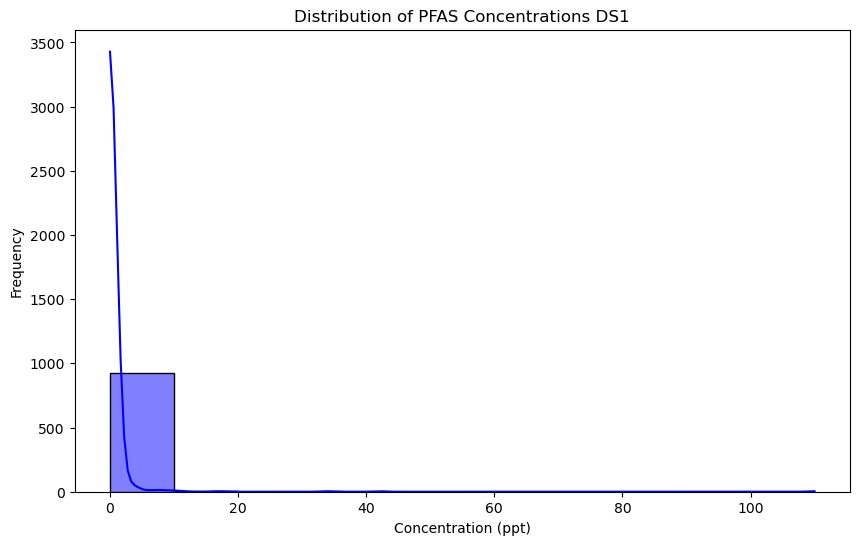

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of PFAS concentrations
plt.figure(figsize=(10, 6))
sns.histplot(filtered_cowater1['Measure'], kde=True, color='blue')
plt.title('Distribution of PFAS Concentrations DS1')
plt.xlabel('Concentration (ppt)')
plt.ylabel('Frequency')
plt.show()

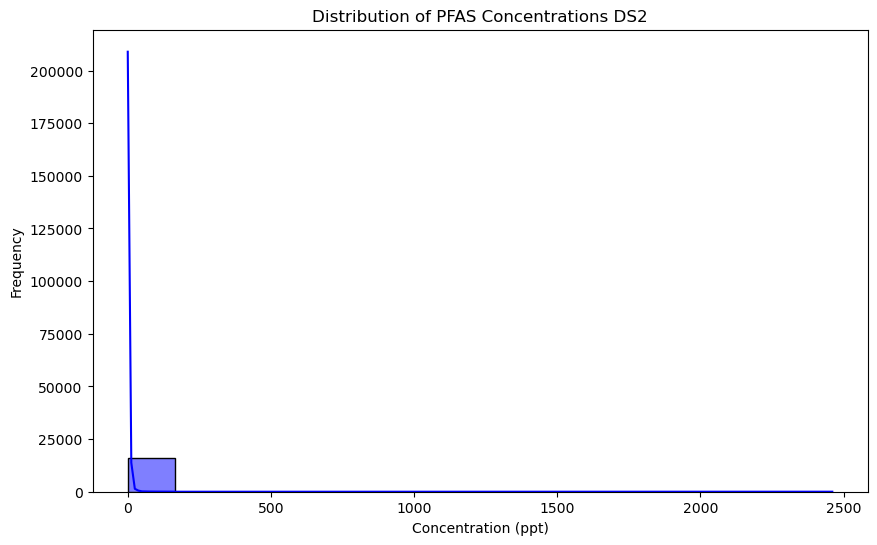

In [71]:
# Histogram of PFAS concentrations
plt.figure(figsize=(10, 6))
sns.histplot(cowater2_updated['RESULT_NUMERIC'], kde=True, color='blue')
plt.title('Distribution of PFAS Concentrations DS2')
plt.xlabel('Concentration (ppt)')
plt.ylabel('Frequency')
plt.show()

> **Note:** Most PFAS values in these datasets are non-detectable. Future data cleaning may be necessary to address this.

#### 4. Check for Outliers

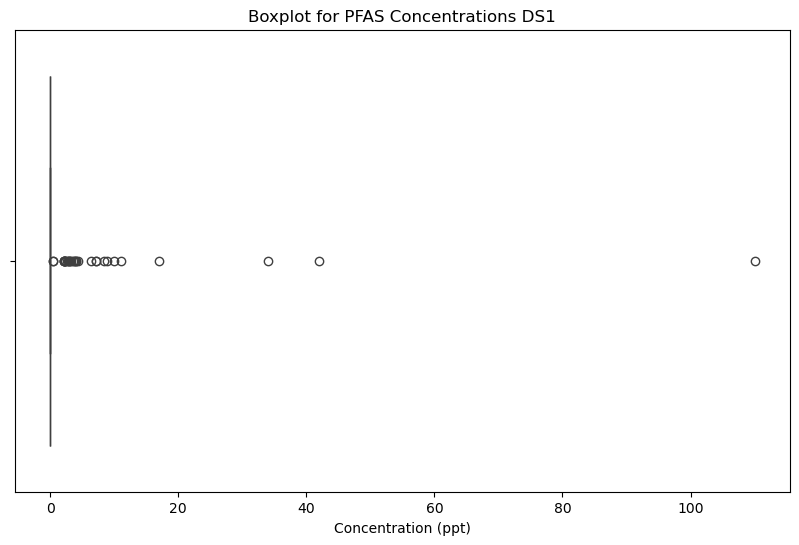

In [74]:
# Boxplot to visualize outliers in PFAS concentrations
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_cowater1['Measure'])
plt.title('Boxplot for PFAS Concentrations DS1')
plt.xlabel('Concentration (ppt)')
plt.show()

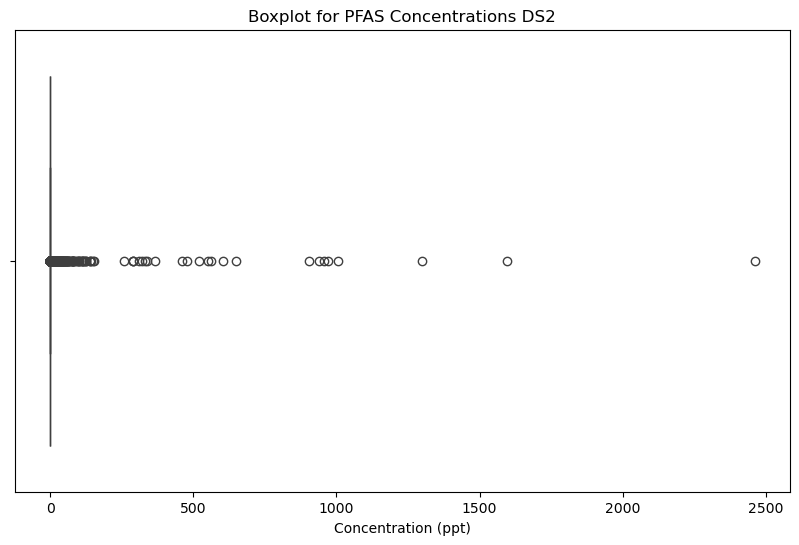

In [75]:
# Boxplot to visualize outliers in PFAS concentrations
plt.figure(figsize=(10, 6))
sns.boxplot(x=cowater2_updated['RESULT_NUMERIC'])
plt.title('Boxplot for PFAS Concentrations DS2')
plt.xlabel('Concentration (ppt)')
plt.show()

> **Note:** The numerous non-detect values may give the impression that there are many outliers in the box plots.

#### 4. Correlation Analysis

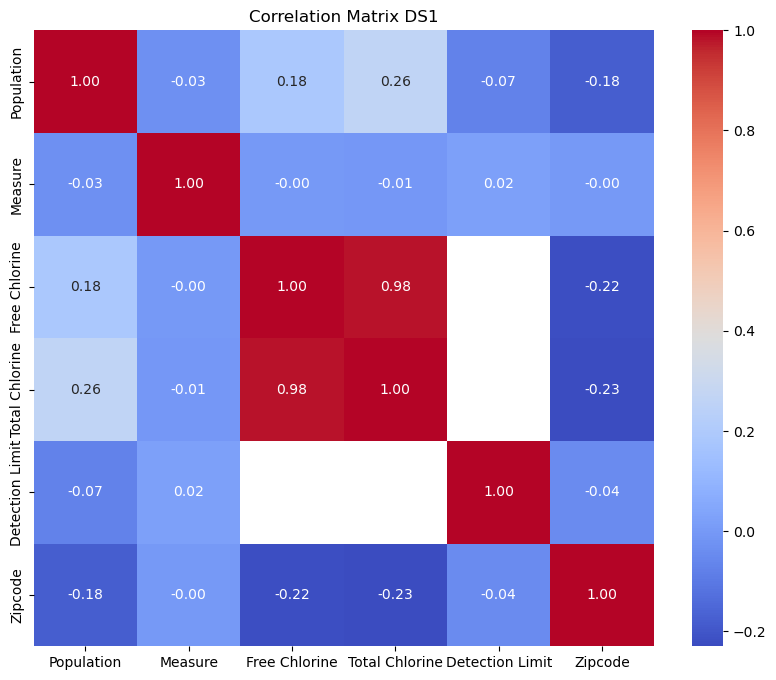

In [78]:
# Select only numeric columns for the correlation matrix
numeric_data = filtered_cowater1.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix DS1')
plt.show()

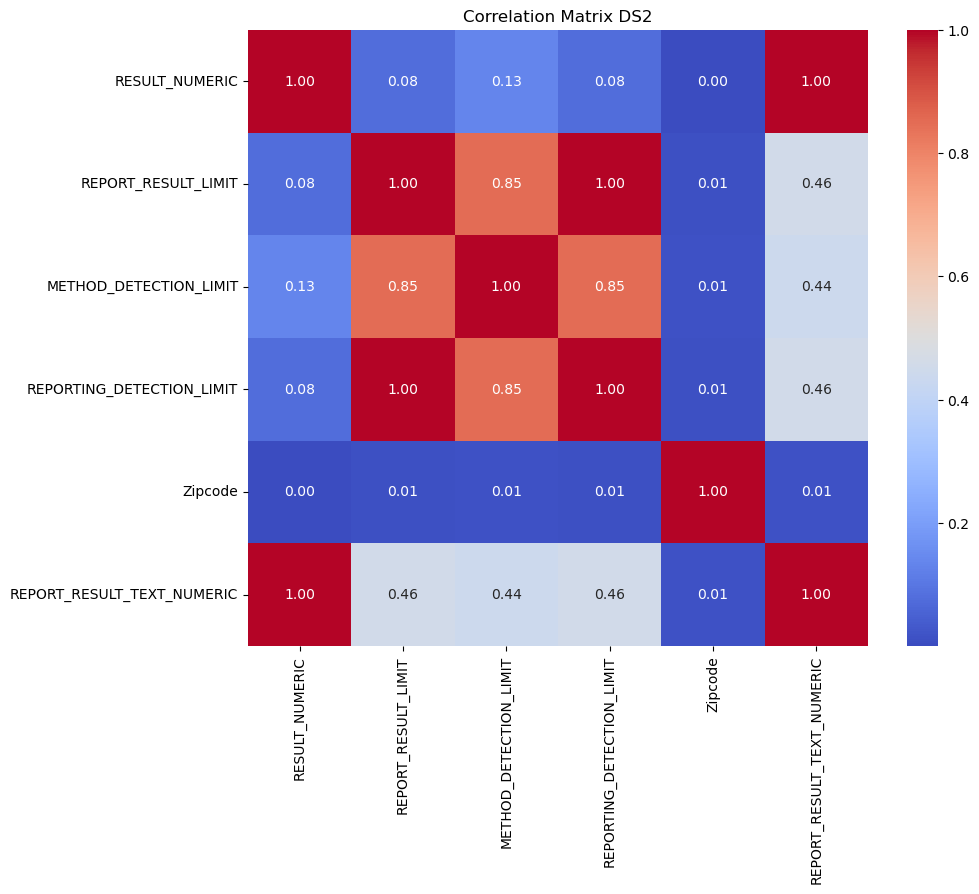

In [79]:
# Select only numeric columns for the correlation matrix
numeric_data = cowater2_updated.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix DS2')
plt.show()

> **Note:** The heat maps generated for each dataset did not reveal any significant correlations with the measured PFAS values.

#### 5. Time Series Analysis

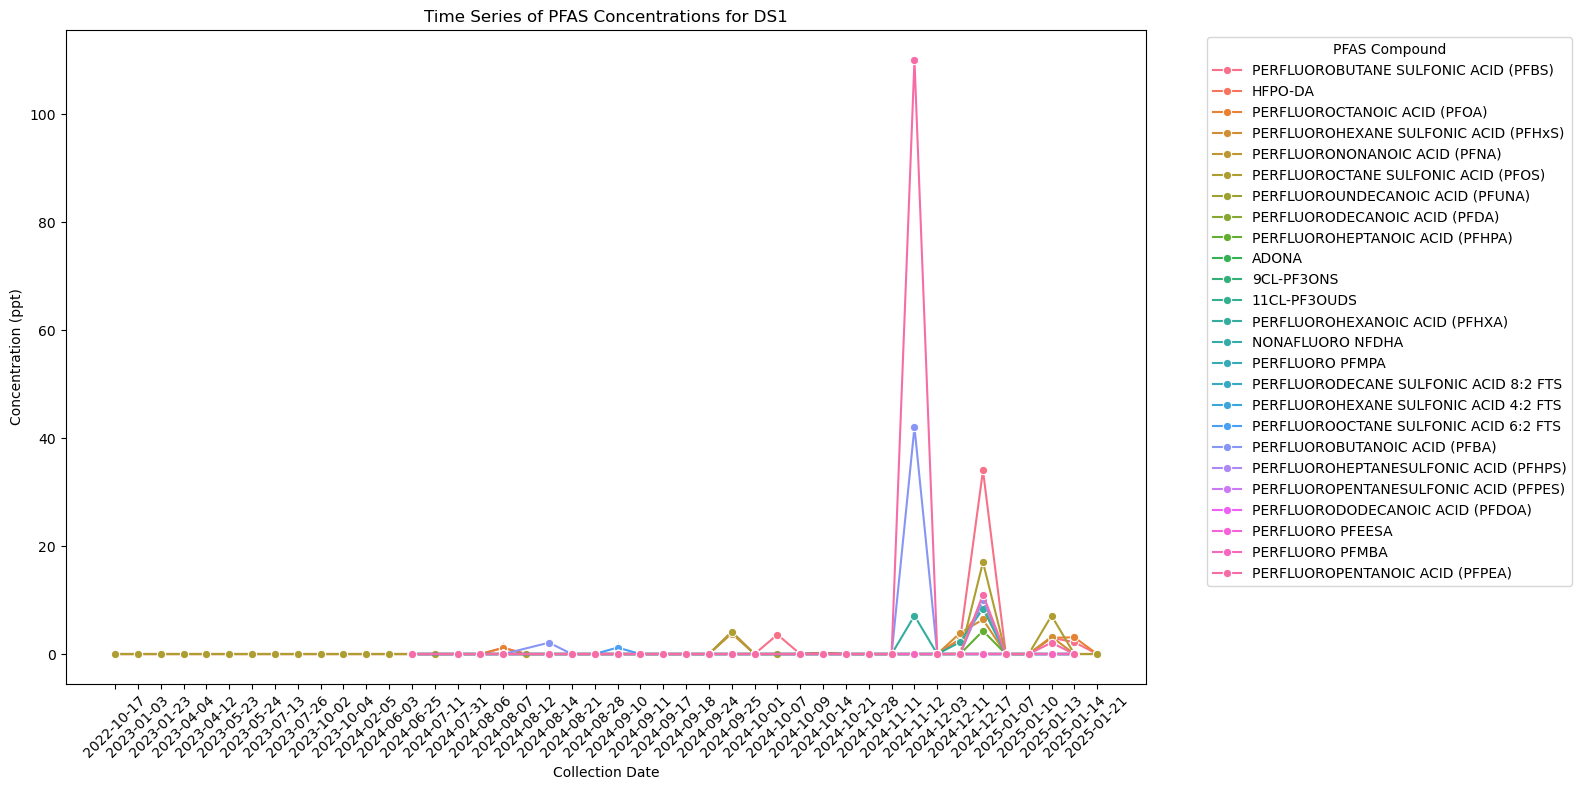

In [82]:
# Convert 'Collection Date' to datetime (for consistency)
filtered_cowater1['Collection Date'] = pd.to_datetime(filtered_cowater1['Collection Date'])

# Sort by date in ascending order
filtered_cowater1 = filtered_cowater1.sort_values(by='Collection Date')

# Convert back to string to preserve discrete ordering
filtered_cowater1['Collection Date'] = filtered_cowater1['Collection Date'].dt.strftime('%Y-%m-%d')

plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered_cowater1, x='Collection Date', y='Measure', hue='Analyte Name', marker='o')

plt.xlabel('Collection Date')
plt.ylabel('Concentration (ppt)')
plt.title('Time Series of PFAS Concentrations for DS1')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

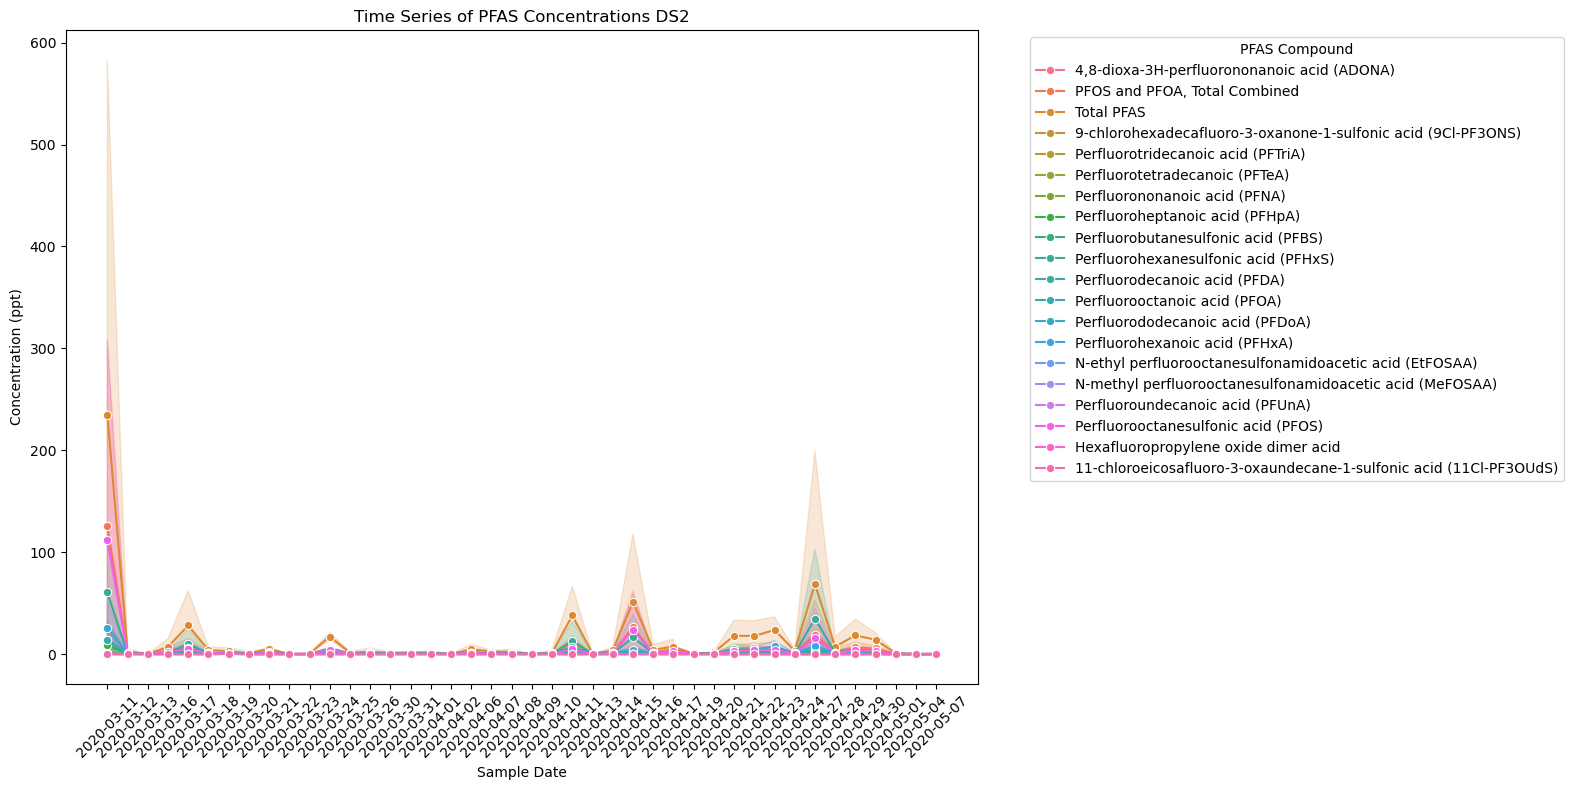

In [83]:
# Convert 'Collection Date' to datetime (for consistency)
cowater2_updated['SAMPLE_DATE'] = pd.to_datetime(cowater2_updated['SAMPLE_DATE'])

# Sort by date in ascending order
cowater2_updated = cowater2_updated.sort_values(by='SAMPLE_DATE')

# Convert back to string to preserve discrete ordering
cowater2_updated['SAMPLE_DATE'] = cowater2_updated['SAMPLE_DATE'].dt.strftime('%Y-%m-%d')

plt.figure(figsize=(16, 8))
sns.lineplot(data=cowater2_updated, x='SAMPLE_DATE', y='RESULT_NUMERIC', hue='CHEMICAL_NAME', marker='o')

plt.xlabel('Sample Date')
plt.ylabel('Concentration (ppt)')
plt.title('Time Series of PFAS Concentrations DS2')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

> **Note:** The time series plots provide insights into the trends of PFAS concentration over various sampling periods. It's important to note that PFAS sampling began in Colorado in 2020, and consistent sampling data is not readily available from the Colorado Department of Public Health and Environment (CDPH&E).

#### 6. PFAS Distribution by County

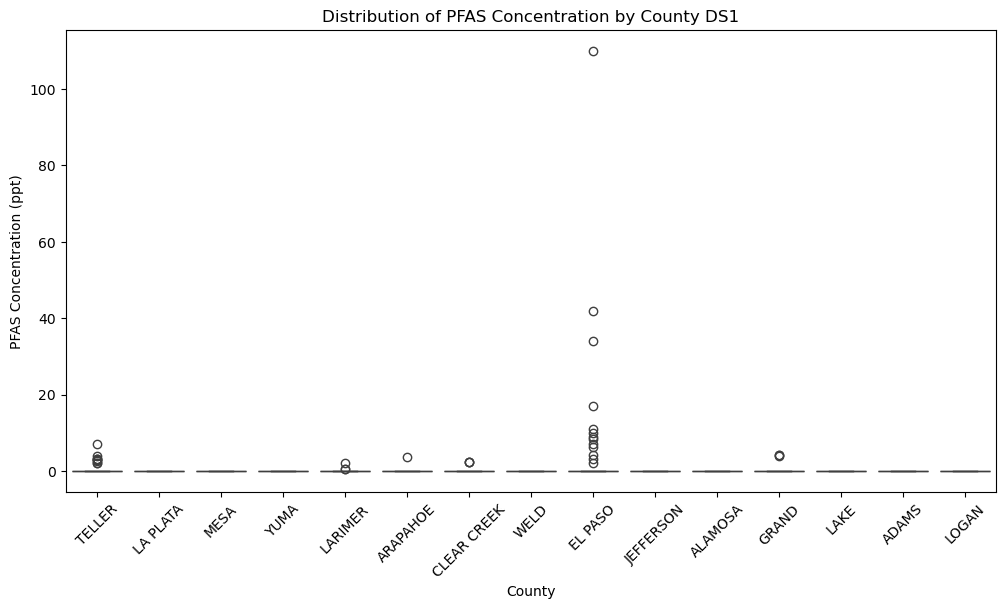

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_cowater1, x='County', y='Measure')
plt.xticks(rotation=45)
plt.xlabel("County")
plt.ylabel("PFAS Concentration (ppt)")
plt.title("Distribution of PFAS Concentration by County DS1")
plt.show()

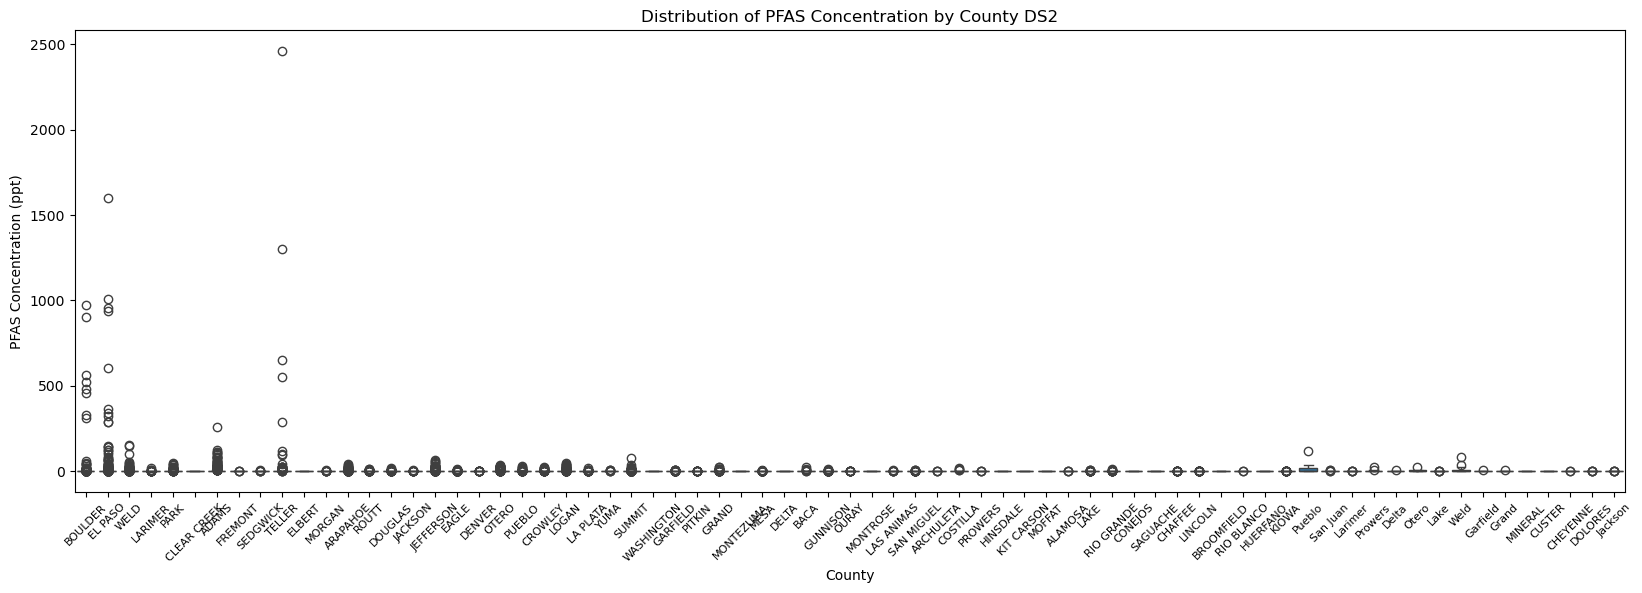

In [87]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=cowater2_updated, x='County', y='RESULT_NUMERIC')

plt.xticks(rotation=45, fontsize=8)  # Reduce font size for better fit

plt.xlabel("County")
plt.ylabel("PFAS Concentration (ppt)")
plt.title("Distribution of PFAS Concentration by County DS2")
plt.show()

> **Note:** The distribution of PFAS concentrations across counties indicates that El Paso and Teller counties have recorded the highest PFAS levels.

#### 7. Seasonal Trends in PFAS Measurements

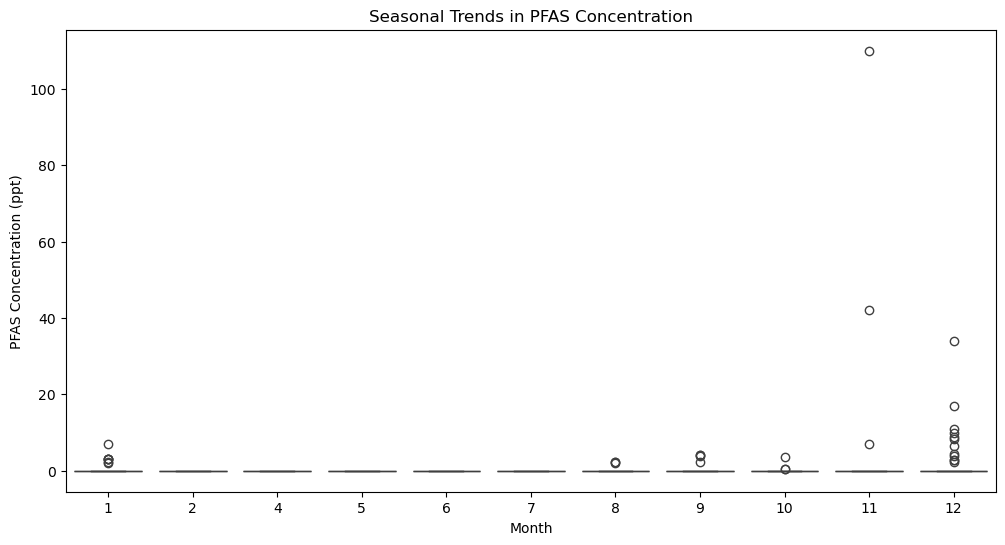

In [90]:
# Create a temporary DataFrame for plotting
temp_df = filtered_cowater1.copy()
temp_df['Month'] = pd.to_datetime(temp_df['Collection Date']).dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=temp_df, x='Month', y='Measure')

plt.xlabel("Month")
plt.ylabel("PFAS Concentration (ppt)")
plt.title("Seasonal Trends in PFAS Concentration")

plt.show()

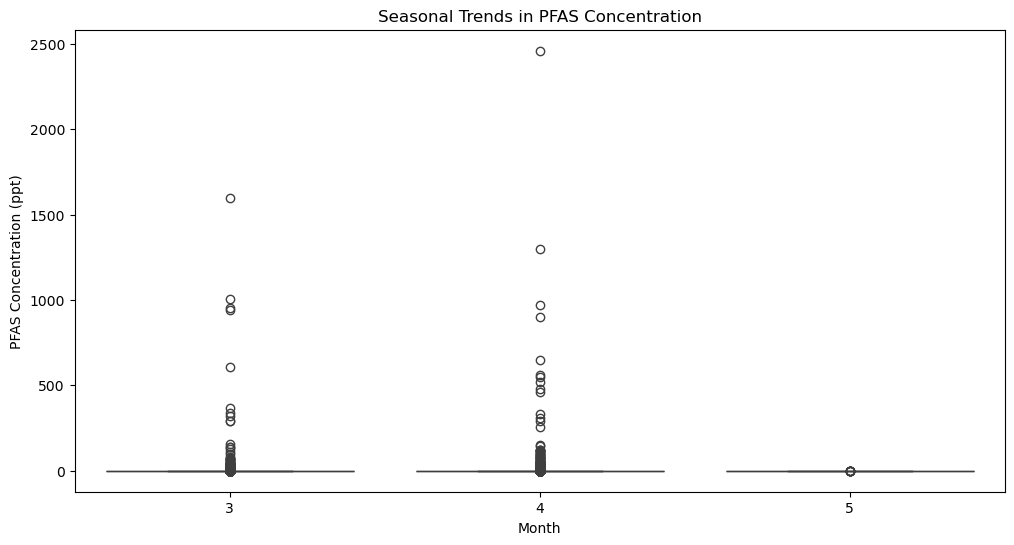

In [91]:
# Create a temporary DataFrame for plotting
temp_df = cowater2_updated.copy()
temp_df['Month'] = pd.to_datetime(temp_df['SAMPLE_DATE']).dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=temp_df, x='Month', y='RESULT_NUMERIC')

plt.xlabel("Month")
plt.ylabel("PFAS Concentration (ppt)")
plt.title("Seasonal Trends in PFAS Concentration")

plt.show()

> **Note:** Gaining insights into the seasonal influence on PFAS measurements is challenging due to the limited number of sampling dates available for analysis. Most sampling was conducted in large batches, which does not provide sufficient data to assess seasonal variations effectively.

#### Merging PFAS datasets

Having completed the exploratory data analysis (EDA) on the individual PFAS datasets, we will now merge them to explore further insights from the consolidated dataset.

In [94]:
filtered_cowater1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 932 to 54
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PWS ID               933 non-null    object 
 1   PWS Name             933 non-null    object 
 2   PWS Status           933 non-null    object 
 3   PWS Type             933 non-null    object 
 4   PWS Source Type      683 non-null    object 
 5   Population           933 non-null    int64  
 6   County               933 non-null    object 
 7   Facility Name        933 non-null    object 
 8   Facility ID          933 non-null    object 
 9   Facility Type        933 non-null    object 
 10  Sample Point ID      933 non-null    object 
 11  Sample Point Type    933 non-null    object 
 12  labName              933 non-null    object 
 13  Lab Sample ID        933 non-null    object 
 14  Analyte Name         933 non-null    object 
 15  Sample Type          933 non-null    object 

In [95]:
cowater2_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16180 entries, 2277 to 13939
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOC_NAME                    16180 non-null  object 
 1   LOC_DESC                    16180 non-null  object 
 2   SYS_SAMPLE_CODE             16180 non-null  object 
 3   SYS_LOC_CODE                16180 non-null  object 
 4   SAMPLE_DATE                 16180 non-null  object 
 5   MATRIX_CODE                 16180 non-null  object 
 6   FIELD_SDG                   16180 non-null  object 
 7   LAB_SDG                     14562 non-null  object 
 8   CAS_RN                      16180 non-null  object 
 9   CHEMICAL_NAME               16180 non-null  object 
 10  DETECT_FLAG                 16180 non-null  object 
 11  REPORT_RESULT_TEXT          16180 non-null  object 
 12  RESULT_NUMERIC              16180 non-null  float64
 13  REPORT_RESULT_LIMIT         14562

In [96]:
# Standardizing column names in filtered_cowater1
filtered_cowater1 = filtered_cowater1.rename(columns={
    "PWS ID": "loc_name",
    "PWS Name": "loc_desc",
    "Analyte Name": "chemical_name",
    "Measure": "result_numeric",
    "Collection Date": "sample_date",
    "Unit Of Measure": "ppt_unit",
    "Detection Limit": "method_detection_limit",
    "PWS Source Type": "loc_purpose",
    "Sample Point Type": "loc_type",
    "Zipcode": "zipcode",
    "City": "city",
    "County": "county"
})

# Convert all column names in cowater2_updated to lowercase
cowater2_updated.columns = cowater2_updated.columns.str.lower()

# Ensure remark_1 exists in filtered_cowater1 and fill missing values with NaN
filtered_cowater1["remark_1"] = pd.NA  # Assign missing column

# Convert Zipcode to string for consistency
filtered_cowater1["zipcode"] = filtered_cowater1["zipcode"].astype(str)
cowater2_updated["zipcode"] = cowater2_updated["zipcode"].astype(str)

# Convert all column names in filtered_cowater1 to lowercase (safeguard)
filtered_cowater1.columns = filtered_cowater1.columns.str.lower()

# Select relevant columns for merging
common_columns = [
    "loc_name", "loc_desc", "chemical_name", "result_numeric", "sample_date",
    "ppt_unit", "zipcode", "city", "county", "method_detection_limit",
    "loc_purpose", "loc_type", "remark_1"
]

filtered_cowater1_selected = filtered_cowater1[common_columns]
cowater2_updated_selected = cowater2_updated[common_columns]

# Append the datasets
merged_pfas = pd.concat([filtered_cowater1_selected, cowater2_updated_selected], ignore_index=True)

# Convert all column names to lowercase in final dataset (as a safeguard)
merged_pfas.columns = merged_pfas.columns.str.lower()

# Display dataset summary
print(merged_pfas.info())

# Save to CSV for further analysis
merged_pfas.to_csv("merged_pfcs_pfas.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17113 entries, 0 to 17112
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loc_name                17113 non-null  object 
 1   loc_desc                17113 non-null  object 
 2   chemical_name           17113 non-null  object 
 3   result_numeric          17113 non-null  float64
 4   sample_date             17113 non-null  object 
 5   ppt_unit                17113 non-null  object 
 6   zipcode                 17113 non-null  object 
 7   city                    17113 non-null  object 
 8   county                  17113 non-null  object 
 9   method_detection_limit  15495 non-null  float64
 10  loc_purpose             16863 non-null  object 
 11  loc_type                17113 non-null  object 
 12  remark_1                16180 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.7+ MB
None


In [97]:
# Convert 'Collection Date' to datetime (for consistency)
merged_pfas['sample_date'] = pd.to_datetime(merged_pfas['sample_date'])

#### Calculate a Total PFAS Concentration per Location and Sample Date

Numerous analytes are tested at each site, and it's possible to aggregate the PFAS analytes into a single Total PFAS measurement. However, the dataset I'm working with includes entries labeled "Total PFAS" and "Combined PFAS," which I'll need to exclude to accurately calculate the Total PFAS measurement.

In [99]:
# Filter out rows where chemical_name is 'Total PFAS' or 'PFOS and PFOA, Total Combined'
filtered_data_tot = merged_pfas[~merged_pfas['chemical_name'].isin(['Total PFAS', 'PFOS and PFOA, Total Combined'])]

# Group by 'loc_name' and 'sample_date', then sum the 'result_numeric' values
total_pfas = filtered_data_tot.groupby(['loc_name', 'sample_date']).agg(total_pfas=('result_numeric', 'sum')).reset_index()

# Display the resulting DataFrame
print(total_pfas.head())

  loc_name sample_date  total_pfas
0    11915  2020-04-13        0.41
1    11930  2020-04-27     2460.57
2    12312  2020-04-17        0.00
3    12570  2020-04-19        0.23
4     1357  2020-04-15        1.45


In [100]:
total_pfas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   loc_name     520 non-null    object        
 1   sample_date  520 non-null    datetime64[ns]
 2   total_pfas   520 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.3+ KB


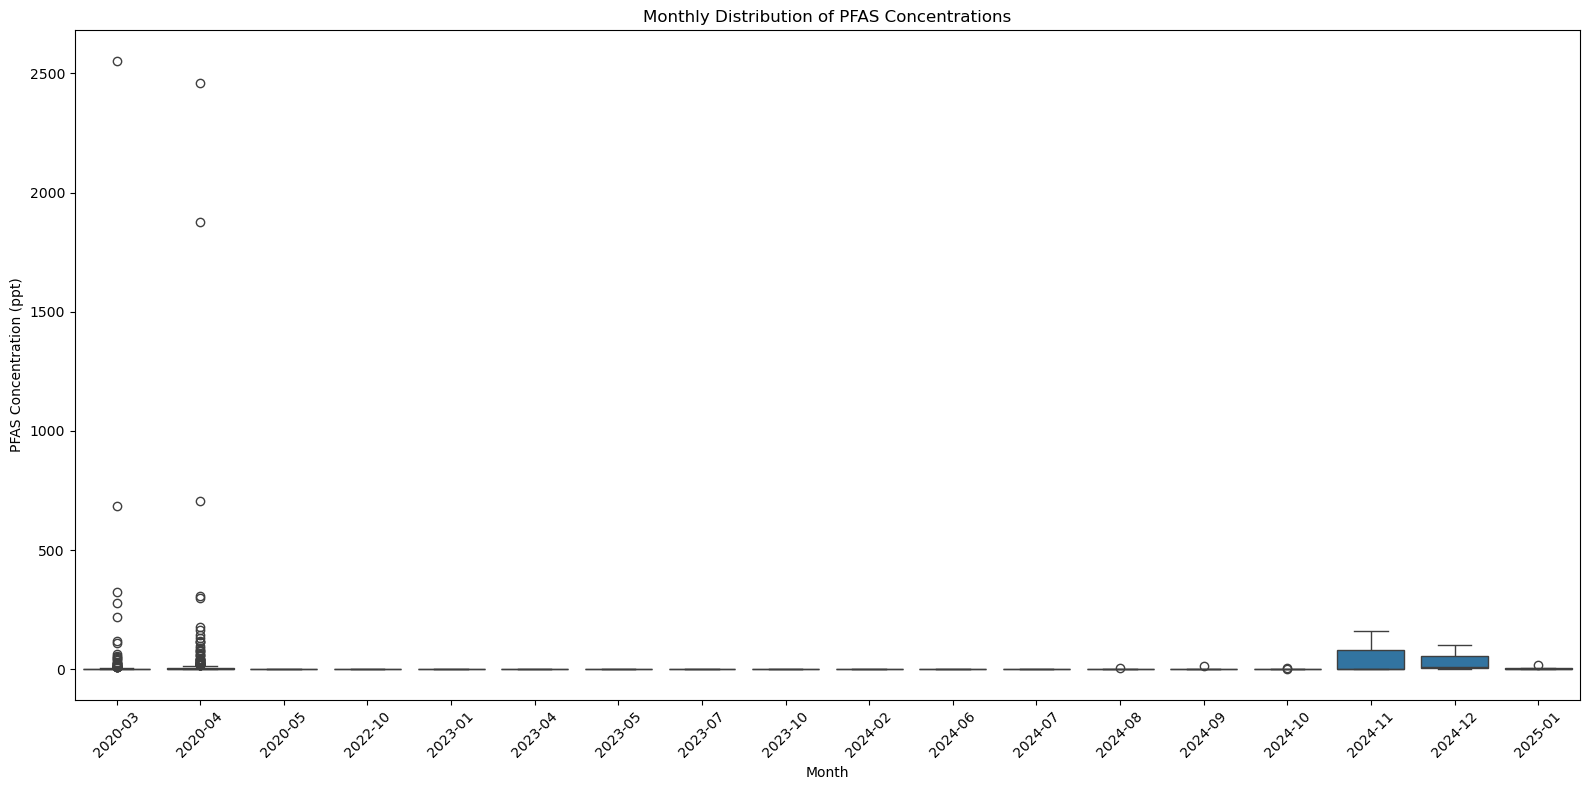

In [101]:
# Extract year and month for grouping in the box plot
total_pfas['Year'] = total_pfas['sample_date'].dt.year
total_pfas['Month'] = total_pfas['sample_date'].dt.strftime('%Y-%m')  # Year-Month format

# Sort the data by 'Month' to ensure the plots are in chronological order
total_pfas = total_pfas.sort_values(by='Month')

plt.figure(figsize=(16, 8))
sns.boxplot(data=total_pfas, x='Month', y='total_pfas')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('Month')
plt.ylabel('PFAS Concentration (ppt)')
plt.title('Monthly Distribution of PFAS Concentrations')
plt.tight_layout()
plt.show()

> **Note:** The box plot of the combined PFAS data reveals that the majority of our samples and non-detect values originate from 2020. This indicates that our dataset is heavily concentrated on 2020 samples, providing limited insights into more recent samples and lacking data for 2022 and 2023.

#### Correlations Between Location Purpose and PFAS Concentration

We will now investigate how the purpose of various locations correlates with PFAS concentration levels:

- **PWS**: Public Water System
- **FS**: Fire Station
- **GW**: Ground Water
- **SW**: Surface Water
- **GU**: Groundwater under the influence of surface water

In [104]:
# Find unique location purposes
merged_pfas.loc_purpose.unique()

array(['GW', 'SW', 'GU', nan, 'PWS', 'FS'], dtype=object)

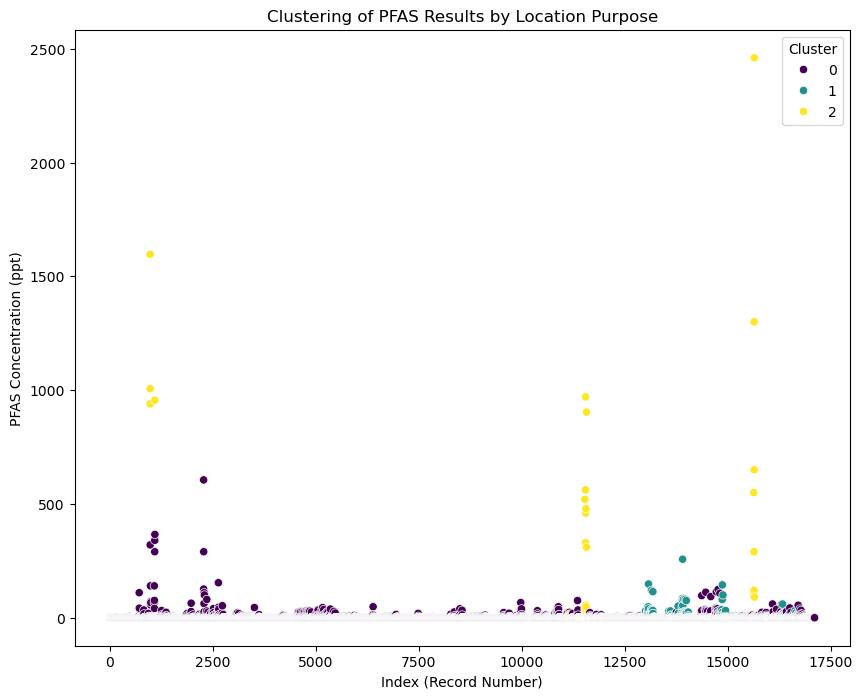

In [105]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# One-hot encode 'loc_purpose'
# This creates a new column for each unique value in 'loc_purpose'
merged_pfas_encoded = pd.get_dummies(merged_pfas, columns=['loc_purpose'])

# Select relevant columns for clustering
# This includes 'result_numeric' and all new columns created from 'loc_purpose'
feature_columns = ['result_numeric'] + [col for col in merged_pfas_encoded.columns if 'loc_purpose_' in col]
cluster_data = merged_pfas_encoded[feature_columns].dropna()

# Scale the data to standardize it for KMeans clustering
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(cluster_scaled)

# Add the cluster assignments back to the original DataFrame
merged_pfas_encoded['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
# Using scatter plot to visualize 'result_numeric' against the DataFrame index
sns.scatterplot(x=merged_pfas_encoded.index, y='result_numeric', hue='Cluster', data=merged_pfas_encoded, palette='viridis', legend='full')
plt.title('Clustering of PFAS Results by Location Purpose')
plt.xlabel('Index (Record Number)')
plt.ylabel('PFAS Concentration (ppt)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

> **Note:** This chart illustrates the clustering of PFAS concentration results by location purpose, revealing significant differences in contamination levels across various locations. The data highlights specific areas with unusually high PFAS levels that may require focused attention.

In [107]:
# Assuming merged_pfas is your DataFrame and it contains the PFAS concentration as 'result_numeric'
grouped_purpose = merged_pfas.groupby('loc_purpose')['result_numeric'].agg(['mean', 'median', 'max', 'count']).sort_values(by='max', ascending=False)

print(grouped_purpose)

                  mean  median      max  count
loc_purpose                                   
FS           20.884240     0.0  2460.57    500
PWS           1.234510     0.0  1596.90  14260
SW            2.343050     0.0   257.20   1610
GW            0.465072     0.0   110.00    418
GU            0.032000     0.0     2.40     75


> **Note:** Fire stations have significantly higher PFAS concentrations, likely stemming from the use of PFAS-containing firefighting foams during training exercises that contaminate the water supply. Public water systems also have very high measure concentrations but overal mean is less than surface water testing.

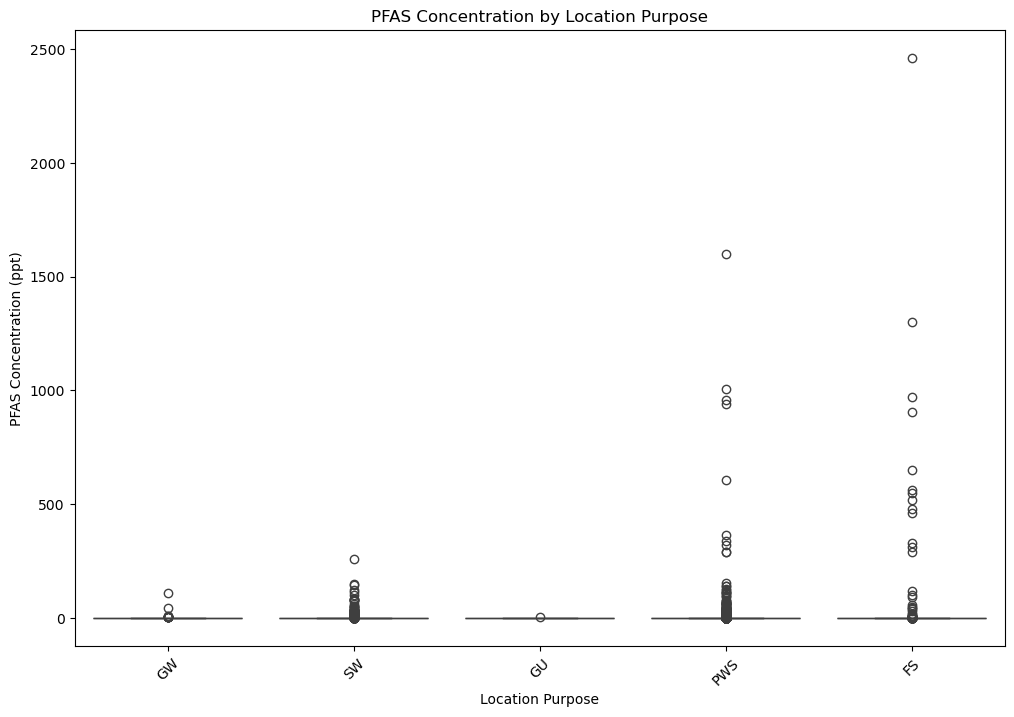

In [109]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loc_purpose', y='result_numeric', data=merged_pfas)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('PFAS Concentration by Location Purpose')
plt.xlabel('Location Purpose')
plt.ylabel('PFAS Concentration (ppt)')
plt.show()

#### ANOVA Test for PFAS Concentrations Acorss Different Locations Purposes

In [111]:
from scipy.stats import kruskal

# Kruskal-Wallis Test - Non-parametric method for testing whether samples originate from the same distribution
# First, ensure you have data grouped by 'loc_purpose'
sample_groups = [group['result_numeric'].values for name, group in merged_pfas.groupby('loc_purpose')]

# Apply the Kruskal-Wallis Test
stat, p_value = kruskal(*sample_groups)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject H0: There is a significant difference between groups.')
else:
    print('Accept H0: No significant difference between groups.')

Statistics=370.904, p=0.000
Reject H0: There is a significant difference between groups.


In [112]:
# Sort the DataFrame by 'Measure' in descending order and take the top N entries
top_measures = merged_pfas.sort_values(by='result_numeric', ascending=False).head(50)  # Change the number as needed

# Display the top measures along with associated data
top_measures

loc_name                              loc_desc  \
15648               11930    Four Mile Fire Protection District   
974             CO0121775                          SECURITY WSD   
15644               11930    Four Mile Fire Protection District   
975             CO0121775                          SECURITY WSD   
11550                1381    Sugarloaf Fire Protection District   
1088            CO0121775                          SECURITY WSD   
977             CO0121775                          SECURITY WSD   
11572                1381    Sugarloaf Fire Protection District   
15645               11930    Four Mile Fire Protection District   
2274            CO0121800                   STRATMOOR HILLS WSD   
11549                1381    Sugarloaf Fire Protection District   
15635               11930    Four Mile Fire Protection District   
11534                1381    Sugarloaf Fire Protection District   
11561                1381    Sugarloaf Fire Protection District   
11554                1381    Sugarloaf Fire Protection District   
1090            CO0121775                          SECURITY WSD   
1087            CO0121775                          SECURITY WSD   
11551                1381    Sugarloaf Fire Protection District   
976             CO0121775                          SECURITY WSD   
11571                1381    Sugarloaf Fire Protection District   
15639               11930    Four Mile Fire Protection District   
1086            CO0121775                          SECURITY WSD   
2276            CO0121800                   STRATMOOR HILLS WSD   
13908          SAND CREEK                      SAND CR. @ MOUTH   
2633            CO0162486                      LOCHBUIE TOWN OF   
13079      FOUNTAIN CREEK  FOUNTAIN CK. IN FOUNTAIN @ HWY 85-87   
14873            COSPCP12           CACHE LA POUDRE R @ GREELEY   
981             CO0121775                          SECURITY WSD   
1076            CO0121775                          SECURITY WSD   
2275            CO0121800                   STRATMOOR HILLS WSD   
14770           CO0101025                      BRIGHTON CITY OF   
13150      FOUNTAIN CREEK   FOUNTAIN CK. @ PINON RD. ABV. PINON   
15643               11930    Four Mile Fire Protection District   
13185           COARFO02b      FOUNTAIN CK. @ 4TH STREET BRIDGE   
14725           CO0101025                      BRIGHTON CITY OF   
14469           CO0101025                      BRIGHTON CITY OF   
709             CO0121750                          SECURITY MHP   
2287            CO0121800                   STRATMOOR HILLS WSD   
14813           CO0101025                      BRIGHTON CITY OF   
14888            COSPCP12           CACHE LA POUDRE R @ GREELEY   
15633               11930    Four Mile Fire Protection District   
2292            CO0121800                   STRATMOOR HILLS WSD   
14371           CO0101025                      BRIGHTON CITY OF   
14592           CO0101025                      BRIGHTON CITY OF   
15651               11930    Four Mile Fire Protection District   
13900          SAND CREEK                      SAND CR. @ MOUTH   
13933  SOUTH PLATTE RIVER           S PLATTE R. ABV CLEAR CREEK   
13971  SOUTH PLATTE RIVER  SOUTH PLATTE RIVER BELOW CLEAR CREEK   
2352            CO0121800                   STRATMOOR HILLS WSD   
14869           COSPMS01b            SOUTH PLATTE R NEAR KERSEY   

                              chemical_name  result_numeric sample_date  \
15648                            Total PFAS         2460.57  2020-04-27   
974                              Total PFAS         1596.90  2020-03-11   
15644  Perfluorohexanesulfonic acid (PFHxS)         1300.00  2020-04-27   
975           PFOS and PFOA, Total Combined         1006.00  2020-03-11   
11550                            Total PFAS          970.40  2020-04-15   
1088                             Total PFAS          955.90  2020-03-11   
977     Perfluorooctanesulfonic acid (PFOS)          940.00  2020-03-11   

> **Note:** The highest PFAS measurements are primarily associated with Fire Protection Districts or areas near military bases, such as Security WSD.

####  Geographic Distribution of PFAS Levels in Colorado

Next, we will plot PFAS concentrations by county to identify areas with the highest contamination levels across Colorado.

In [115]:
# Convert county names to uppercase directly in merged_pfas
merged_pfas['county'] = merged_pfas['county'].astype(str).str.upper().str.strip()

# Extract unique county names after ensuring they are uppercase
colorado_counties = merged_pfas['county'].unique()

print(colorado_counties)  # Verify that all counties are in uppercase

['TELLER' 'LA PLATA' 'MESA' 'YUMA' 'LARIMER' 'ARAPAHOE' 'CLEAR CREEK'
 'WELD' 'EL PASO' 'JEFFERSON' 'ALAMOSA' 'GRAND' 'LAKE' 'ADAMS' 'LOGAN'
 'BOULDER' 'PARK' 'FREMONT' 'SEDGWICK' 'ELBERT' 'MORGAN' 'ROUTT' 'DOUGLAS'
 'JACKSON' 'EAGLE' 'DENVER' 'OTERO' 'PUEBLO' 'CROWLEY' 'SUMMIT'
 'WASHINGTON' 'GARFIELD' 'PITKIN' 'MONTEZUMA' 'DELTA' 'BACA' 'GUNNISON'
 'OURAY' 'MONTROSE' 'LAS ANIMAS' 'SAN MIGUEL' 'ARCHULETA' 'COSTILLA'
 'PROWERS' 'HINSDALE' 'KIT CARSON' 'MOFFAT' 'RIO GRANDE' 'CONEJOS'
 'SAGUACHE' 'CHAFFEE' 'LINCOLN' 'BROOMFIELD' 'RIO BLANCO' 'HUERFANO'
 'KIOWA' 'SAN JUAN' 'MINERAL' 'CUSTER' 'CHEYENNE' 'DOLORES']


In [116]:
import geopandas as gpd

# Load counties shapefile
counties = gpd.read_file('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/tl_2024_us_county/tl_2024_us_county.shp')

# Ensure all county names are in uppercase to match your PFAS data
counties['NAME'] = counties['NAME'].str.upper()

# Dissolve all geometries by county name to ensure each county is represented once
county_dissolved = counties.dissolve(by='NAME')

In [117]:
# Filter the dissolved counties
county_dissolved = county_dissolved[county_dissolved.index.isin(colorado_counties)]

In [118]:
# Aggregate PFAS data by county
county_data = merged_pfas.groupby('county')['result_numeric'].mean()

In [119]:
# Merge the geographic data with PFAS data
county_geo = county_dissolved.merge(county_data, left_index=True, right_on='county', how='left')

In [120]:
county_geo.tail()

geometry STATEFP  \
county                                                                  
SUMMIT      MULTIPOLYGON (((-106.43984 39.91914, -106.4392...      08   
TELLER      POLYGON ((-105.33038 39.12947, -105.32944 39.1...      08   
WASHINGTON  MULTIPOLYGON (((-96.44834 30.07486, -96.44836 ...      28   
WELD        MULTIPOLYGON (((-104.97991 40.03305, -104.9798...      08   
YUMA        MULTIPOLYGON (((-114.81405 32.56396, -114.8140...      04   

           COUNTYFP  COUNTYNS  GEOID         GEOIDFQ           NAMELSAD LSAD  \
county                                                                         
SUMMIT          117  00198174  08117  0500000US08117      Summit County   06   
TELLER          119  00198175  08119  0500000US08119      Teller County   06   
WASHINGTON      151  00695796  28151  0500000US28151  Washington County   06   
WELD            123  00198177  08123  0500000US08123        Weld County   06   
YUMA            027  00023901  04027  0500000US04027        Yuma County   06   

           CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT        ALAND  \
county                                                                  
SUMMIT          H1  G4020   482  14720     None        A   1575563219   
TELLER          H1  G4020  None  17820     None        A   1442988174   
WASHINGTON      H1  G4020   288  24740     None        A   1875530531   
WELD            H1  G4020   216  24540     None        A  10320992775   
YUMA            H1  G4020  None  49740     None        A  14280726745   

              AWATER     INTPTLAT      INTPTLON  result_numeric  
county                                                           
SUMMIT      28310936  +39.6210227  -106.1375545        0.820179  
TELLER       4960197  +38.8699759  -105.1873651       17.997500  
WASHINGTON  93804060  +33.2731740  -090.9444459        0.000000  
WELD        82329831  +40.5559610  -104.3836660        2.703567  
YUMA        13242852  +32.7739424  -113.9109050        0.074688

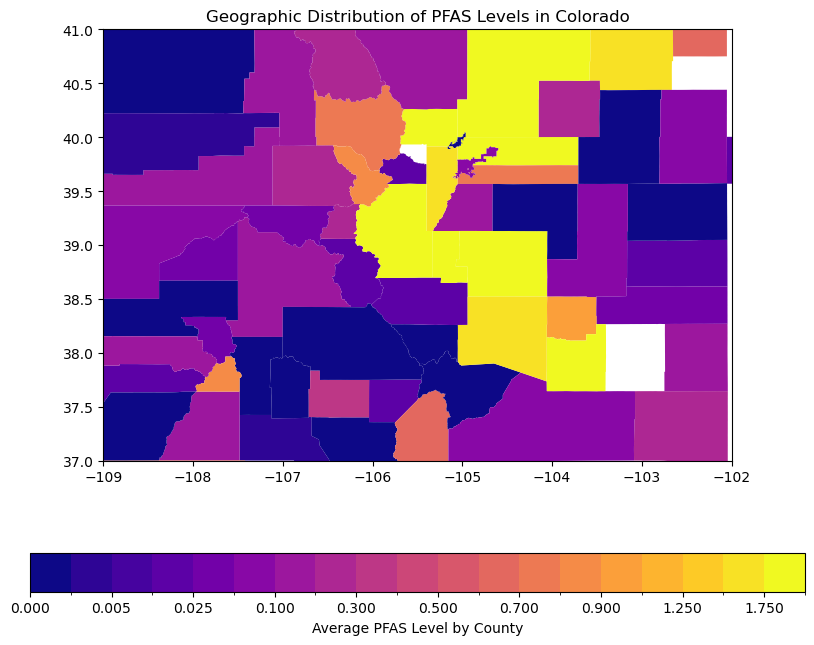

In [121]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Example of normalizing the color scale
norm = colors.Normalize(vmin=county_geo['result_numeric'].min(), vmax=county_geo['result_numeric'].max())

# Define bins for PFAS levels
bins = [0, .0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0]

# Create a colormap with a number of colors equal to the number of bins
cmap = plt.get_cmap('plasma', len(bins) - 1)  # 'plasma' provides good color differentiation

# Normalize the color scale to the bins for clear categorization
norm = colors.BoundaryNorm(boundaries=bins, ncolors=len(bins) - 1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
county_geo.plot(column='result_numeric', ax=ax, legend=True, cmap=cmap, norm=norm,
                legend_kwds={'label': "Average PFAS Level by County", 'orientation': "horizontal"},
                missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "Missing values"})
ax.set_xlim(-109, -102)  # Adjust longitude limits for Colorado
ax.set_ylim(37, 41)  # Adjust latitude limits for Colorado
plt.title('Geographic Distribution of PFAS Levels in Colorado')
plt.show()

> **Note:** The highest PFAS levels can be found in Front range counties extedning into the plains, with the exepction San Juan County

## Part 2 - Health Data

### Colorado Mortality Data (1980 - 2023)

In this section, we analyze health-related data to investigate potential links between PFAS exposure and public health outcomes. 

We begin by loading the **Colorado Mortality Data (1980-2023)**, which was sourced from the **Colorado Center for Health & Environmental Data**. This dataset includes mortality rates across various causes of death, categorized by county, year, and demographic factors. By integrating this health data with PFAS contamination levels, we aim to explore potential correlations between environmental exposure and health impacts in affected communities.

Key objectives for this section:
- Assess regional mortality trends in Colorado from 1980 to 2023.
- Identify counties with elevated mortality rates and compare them with PFAS-impacted regions.
- Investigate potential health outcomes associated with long-term PFAS exposure.

This analysis will help determine if further epidemiological studies are warranted to assess the broader health implications of PFAS contamination.

In [125]:
# Load Colorado Mortality Data from 1980 to 2023.  This data was obtained from the Colorado Center for Health & Environmental data
health1 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/co_deaths_cause_county_80_23.csv')

In [126]:
health1.shape

(17424, 8)

In [127]:
health1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17424 entries, 0 to 17423
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cause_of_death       17424 non-null  object 
 1   year_of_death        17424 non-null  int64  
 2   county_of_residence  17424 non-null  object 
 3   deaths               9957 non-null   float64
 4   population           17100 non-null  float64
 5   crude_rate           9942 non-null   float64
 6   age_adjusted_rate    9942 non-null   float64
 7   variance             9942 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ MB


In [128]:
health1.head()

cause_of_death  year_of_death county_of_residence   deaths  population  \
0     All Causes           1980            Colorado  18927.0  2907630.05   
1     All Causes           1980               Adams   1272.0   247406.80   
2     All Causes           1980             Alamosa     71.0    11921.46   
3     All Causes           1980            Arapahoe   1333.0   297787.52   
4     All Causes           1980           Archuleta     20.0     3779.08   

   crude_rate  age_adjusted_rate      variance  
0  650.942509         939.101333     45.723678  
1  514.132999        1027.492898    935.972844  
2  595.564637         899.769148  10753.098520  
3  447.634609         929.665603    735.024765  
4  529.229336         789.110379  32570.168210

In [129]:
health1['cause_of_death'].unique()

array(['All Causes', 'All-site Cancer', 'Heart Disease', 'Stroke',
       'Diabetes', 'Kidney Disease'], dtype=object)

#### EDA of Mortality Data

The `health1` dataset contains mortality-related data, including causes of death, population statistics, and mortality rates. Before proceeding with any analysis, we perform EDA to understand the structure, detect missing values, and identify trends.

This EDA will provide insights into the dataset’s completeness and reliability before further analysis.

#### 1. Data Overview
- Check the structure and summary statistics.
- Identify missing values and their percentage.

In [132]:
print(health1.info())
print(health1.describe())
print(health1.nunique())  # Count of unique values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17424 entries, 0 to 17423
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cause_of_death       17424 non-null  object 
 1   year_of_death        17424 non-null  int64  
 2   county_of_residence  17424 non-null  object 
 3   deaths               9957 non-null   float64
 4   population           17100 non-null  float64
 5   crude_rate           9942 non-null   float64
 6   age_adjusted_rate    9942 non-null   float64
 7   variance             9942 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ MB
None
       year_of_death        deaths    population   crude_rate  \
count    17424.00000   9957.000000  1.710000e+04  9942.000000   
mean      2001.50000    355.821633  1.354512e+05   298.839334   
std         12.69879   2125.478522  5.638127e+05   369.259074   
min       1980.00000      3.000000  0.000000e+00     0.075076   


In [133]:
print(health1.isnull().sum())

cause_of_death            0
year_of_death             0
county_of_residence       0
deaths                 7467
population              324
crude_rate             7482
age_adjusted_rate      7482
variance               7482
dtype: int64


#### 2. Missing Data Analysis
- Visualize missing values with a heatmap.
- Determine whether missing values require imputation or removal.

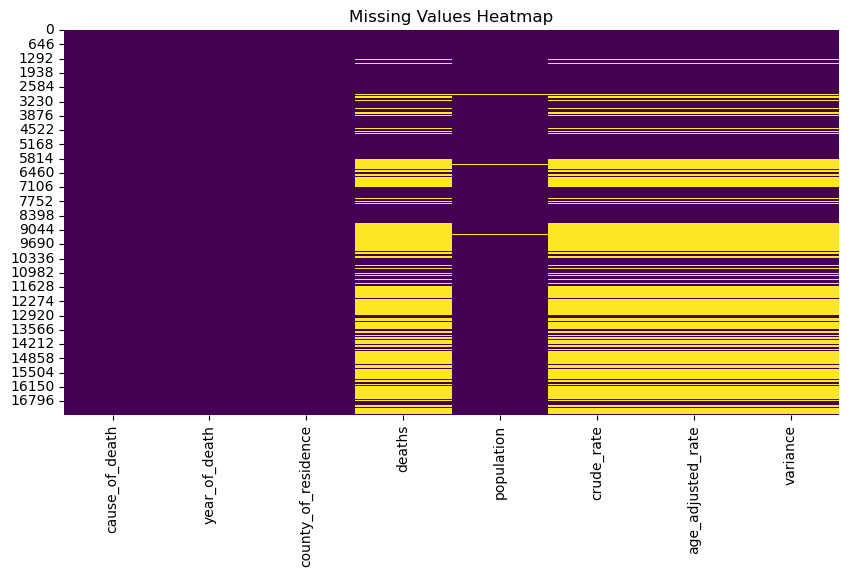

In [135]:
# Heat map of missing values
plt.figure(figsize=(10, 5))
sns.heatmap(health1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [136]:
missing_percent = (health1.isnull().sum() / len(health1)) * 100
print(missing_percent)

cause_of_death          0.000000
year_of_death           0.000000
county_of_residence     0.000000
deaths                 42.854683
population              1.859504
crude_rate             42.940771
age_adjusted_rate      42.940771
variance               42.940771
dtype: float64


> **Note:** A significant portion of death data is missing, which also impacts related fields. Since the reason for these missing values is unclear and may be due to data unavailability, filling them could introduce bias. Forward or backward filling across years may add uncertainty, so these values will remain unfilled.

#### 3. Distribution Analysis
- Identify the most common causes of death.
- Analyze trends in deaths per year and per county.
- Compare distributions of `crude_rate` and `age_adjusted_rate`.

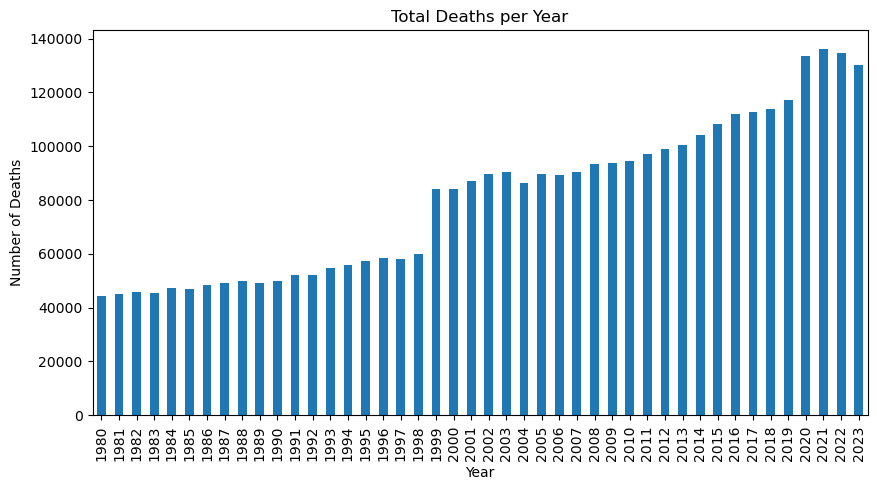

In [139]:
health1.groupby("year_of_death")["deaths"].sum().plot(kind="bar", figsize=(10,5), title="Total Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()

> **Note:** Total deaths per year in Colorado show a consistent upward trend, with notable spikes in 1999 and 2020. The cause of the 1999 spike is unclear, while the 2020 increase is likely due to COVID-related illnesses. The overall rise in deaths aligns with Colorado's year-over-year population growth.

In [141]:
health1.groupby("county_of_residence")["deaths"].sum().sort_values(ascending=False).head(10)

county_of_residence
Colorado     1773075.0
Denver        267506.0
Jefferson     203403.0
El Paso       198469.0
Arapahoe      173018.0
Adams         136506.0
Larimer        98684.0
Pueblo         88955.0
Boulder        87024.0
Weld           79117.0
Name: deaths, dtype: float64

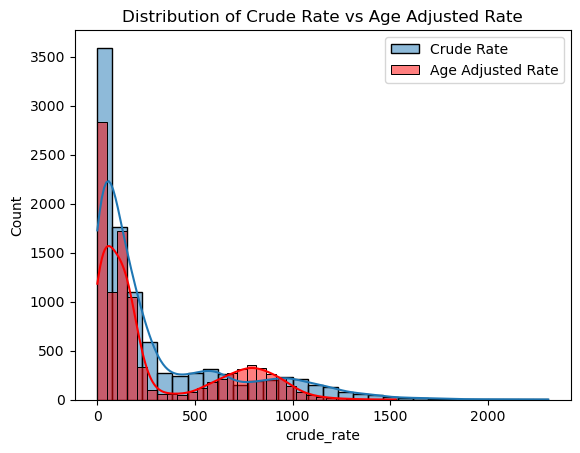

In [142]:
sns.histplot(health1["crude_rate"], kde=True, bins=30, label="Crude Rate")
sns.histplot(health1["age_adjusted_rate"], kde=True, bins=30, label="Age Adjusted Rate", color="red")
plt.legend()
plt.title("Distribution of Crude Rate vs Age Adjusted Rate")
plt.show()

> **Note:** The distribution of crude and age-adjusted mortality rates is right-skewed, with most values concentrated at lower rates. The crude rate (blue) has a broader spread, while the age-adjusted rate (red) appears more concentrated, indicating that adjusting for age reduces variability in mortality rates.

#### 5. Trends Over Time
- Analyze how the top 5 causes of death have changed over the years.
- Identify patterns in mortality rates.

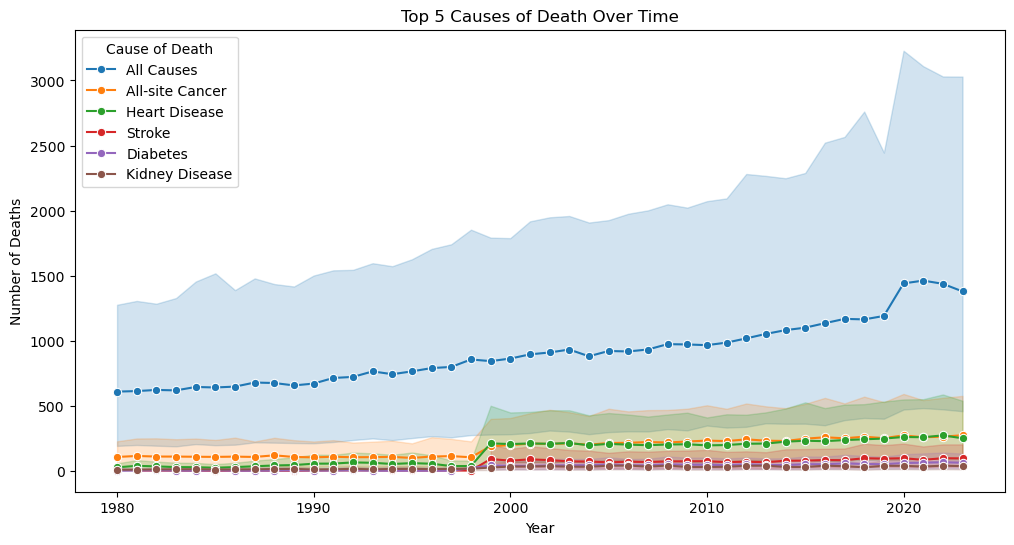

In [145]:
top_causes = health1["cause_of_death"].value_counts().head(6).index
subset = health1[health1["cause_of_death"].isin(top_causes)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x="year_of_death", y="deaths", hue="cause_of_death", marker="o")
plt.title("Top 5 Causes of Death Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title="Cause of Death")
plt.show()

> **Note:** The chart shows the trend of the top five causes of death over time, highlighting a general increase in mortality rates. The "All Causes" category has seen a significant rise, particularly after 2020, likely influenced by the COVID-19 pandemic. Other causes, such as heart disease and cancer, have remained relatively stable but show a gradual upward trend, possibly due to population growth and aging demographics.

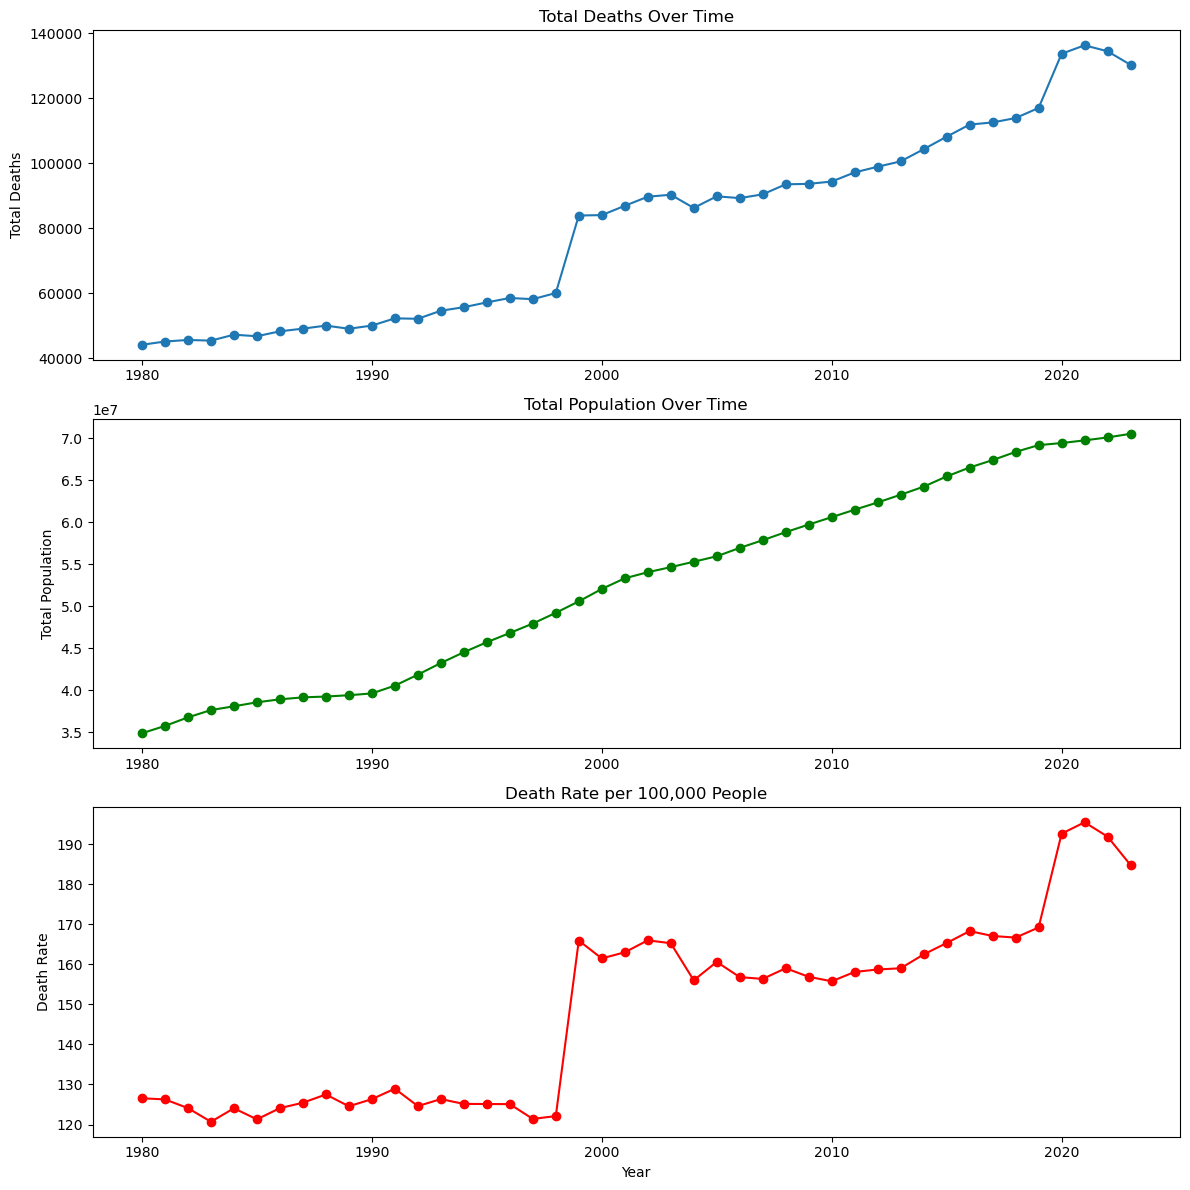

In [147]:
# Group data by year and sum deaths & population
yearly_data = health1.groupby("year_of_death")[["deaths", "population"]].sum()

# Calculate death rate per 100,000 people
yearly_data["death_rate"] = (yearly_data["deaths"] / yearly_data["population"]) * 100000

# Create subplots to compare trends
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot total deaths over time
ax[0].plot(yearly_data.index, yearly_data["deaths"], marker="o", linestyle="-")
ax[0].set_title("Total Deaths Over Time")
ax[0].set_ylabel("Total Deaths")

# Plot population over time
ax[1].plot(yearly_data.index, yearly_data["population"], marker="o", linestyle="-", color="g")
ax[1].set_title("Total Population Over Time")
ax[1].set_ylabel("Total Population")

# Plot death rate over time
ax[2].plot(yearly_data.index, yearly_data["death_rate"], marker="o", linestyle="-", color="r")
ax[2].set_title("Death Rate per 100,000 People")
ax[2].set_ylabel("Death Rate")

# Improve layout
plt.xlabel("Year")
plt.tight_layout()
plt.show()

> **Note:** The plots show a steady increase in total deaths over time, with sharp spikes around 1999 and 2020. Population growth has been consistent, contributing to the rising death count. The death rate per 100,000 remained stable for most years but saw noticeable jumps in 1999 and 2020.

#### 6. Outliers Detection
- Use boxplots to detect extreme values in mortality rates.

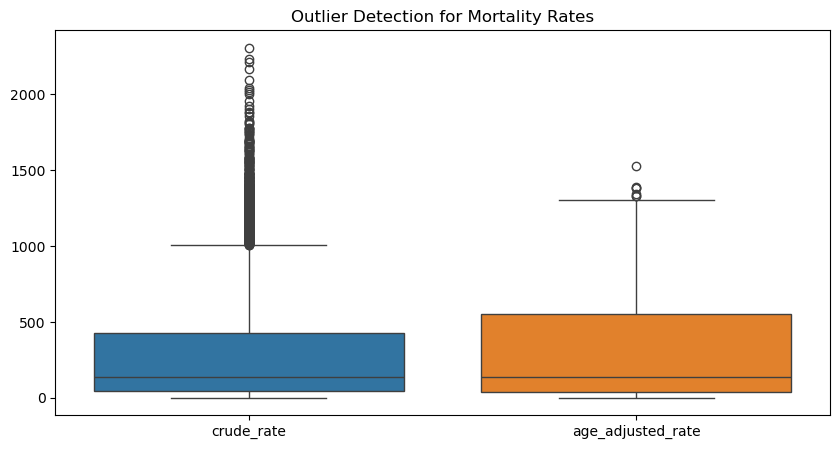

In [150]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=health1[["crude_rate", "age_adjusted_rate"]])
plt.title("Outlier Detection for Mortality Rates")
plt.show()

> **Note:** The box plot reveals a significantly higher number of outliers in crude rate compared to age-adjusted rate, suggesting greater variability in raw mortality data. This indicates that crude rates fluctuate more across different locations or populations, while age adjustment helps normalize the data, reducing extreme values.

### Colorado Health Incident Data

This section analyzes health incident data from the **CDC PLACES** project, compiled from five different datasets merged into a single source. The data provides crude health measures for various chronic diseases across Colorado.

By integrating this health data with PFAS contamination levels, we aim to explore potential correlations between environmental exposure and health outcomes in affected communities.

**Key Objectives:**
- Examine chronic health incidences across Colorado counties and cities from **2018 to 2021**.
- Identify counties with elevated incident rates and compare them with **PFAS-impacted regions**.

**Data Source:** [CDC PLACES - 500 Cities & Places](https://data.cdc.gov/browse?category=500+Cities+%26+Places&q=places&sortBy=relevance&tags=places&pageSize=20)


In [153]:
# Load CDC places health data from 2018-2022
places_2018 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2018.csv', low_memory=False)
places_2019 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2019.csv', low_memory=False)
places_2020 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2020.csv', low_memory=False)
places_2021 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2021.csv', low_memory=False)
places_2022 = pd.read_csv('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2022.csv', low_memory=False)
print("**2018", places_2018.columns.tolist())  # Get all column names as a list
print("**2019", places_2019.columns.tolist())
print("**2020", places_2019.columns.tolist())
print("**2021", places_2019.columns.tolist())
print("**2022", places_2019.columns.tolist())

**2018 ['StateAbbr', 'StateDesc', 'PlaceName', 'PlaceFIPS', 'TotalPopulation', 'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev', 'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI', 'ARTHRITIS_AdjPrev', 'ARTHRITIS_Adj95CI', 'BINGE_CrudePrev', 'BINGE_Crude95CI', 'BINGE_AdjPrev', 'BINGE_Adj95CI', 'BPHIGH_CrudePrev', 'BPHIGH_Crude95CI', 'BPHIGH_AdjPrev', 'BPHIGH_Adj95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI', 'BPMED_AdjPrev', 'BPMED_Adj95CI', 'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CANCER_AdjPrev', 'CANCER_Adj95CI', 'CASTHMA_CrudePrev', 'CASTHMA_Crude95CI', 'CASTHMA_AdjPrev', 'CASTHMA_Adj95CI', 'CERVICAL_CrudePrev', 'CERVICAL_Crude95CI', 'CERVICAL_AdjPrev', 'CERVICAL_Adj95CI', 'CHD_CrudePrev', 'CHD_Crude95CI', 'CHD_AdjPrev', 'CHD_Adj95CI', 'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'CHECKUP_AdjPrev', 'CHECKUP_Adj95CI', 'CHOLSCREEN_CrudePrev', 'CHOLSCREEN_Crude95CI', 'CHOLSCREEN_AdjPrev', 'CHOLSCREEN_Adj95CI', 'COLON_SCREEN_CrudePrev', 'COLON_SCREEN_Crude95CI', 'COLO

In [154]:
# Check memory usage

import psutil
print(f"Memory Usage: {psutil.virtual_memory().percent}%")

Memory Usage: 76.3%


#### Merging PFAS-Related Health Data from CDC PLACES

This function loads, filters, and merges health data from the CDC PLACES dataset for the years 2018-2022, focusing on health conditions potentially linked to PFAS exposure. The final dataset consolidates key chronic disease prevalence metrics for Colorado counties and cities.

**Methodology**
1. **Load Data**: Reads CSV files containing health data for each year.
2. **Filter for Colorado**: Retains only Colorado-specific records using the `"StateAbbr"` column.
3. **Standardize Column Names**: Maps dataset-specific column names to a consistent format.
4. **Ensure Consistency Across Years**: Handles discrepancies in column names between the 2018 dataset and later years.
5. **Merge All Years**: Combines data from 2018-2022 into a single dataset for analysis.

**Health Conditions Analyzed**
The dataset includes crude prevalence rates for chronic conditions linked to PFAS exposure, such as:
- **Cancer**
- **Asthma**
- **Heart Disease**
- **COPD**
- **Diabetes**
- **High Cholesterol**
- **Kidney Disease**
- **High Blood Pressure**
- **Stroke**
- **Depression**
- **Obesity**
- **Mental and Physical Health Conditions**

**Relevance to PFAS Exposure**
These conditions have been identified in prior research as potential health risks associated with PFAS contamination. For reference, see the following study on PFAS-related health impacts:  
[**Health Effects of PFAS Exposure**](https://pmc.ncbi.nlm.nih.gov/articles/PMC8298860/)

This merged dataset will be used to analyze potential correlations between PFAS contamination levels and chronic health outcomes in Colorado communities.


In [156]:
# Define relevant columns for PFAS-related health risks
pfas_health_columns = {
    "StateAbbr": "state_abbr",
    "StateDesc": "state_desc",
    "CountyName": "county_name",  # For 2019-2022, using CountyName for county names
    "CountyFIPS": "county_fips",
    "TractFIPS": "tract_fips",
    "TotalPopulation": "total_population",
    
    "CANCER_CrudePrev": "cancer_prevalence_crude",
    "CASTHMA_CrudePrev": "asthma_prevalence_crude",
    "CHD_CrudePrev": "coronary_heart_disease_crude",
    "COPD_CrudePrev": "copd_prevalence_crude",
    "DIABETES_CrudePrev": "diabetes_prevalence_crude",
    "HIGHCHOL_CrudePrev": "high_cholesterol_prevalence_crude",
    "KIDNEY_CrudePrev": "kidney_disease_prevalence_crude",
    "BPHIGH_CrudePrev": "high_blood_pressure_prevalence_crude",
    "STROKE_CrudePrev": "stroke_prevalence_crude",
    "DEPRESSION_CrudePrev": "depression_prevalence_crude",
    "OBESITY_CrudePrev": "obesity_prevalence_crude",
    "MHLTH_CrudePrev": "mental_health_prevalence_crude",
    "PHLTH_CrudePrev": "physical_health_prevalence_crude",
    "TEETHLOST_CrudePrev": "tooth_loss_prevalence_crude",
    "MAMMOUSE_CrudePrev": "mammogram_usage_crude",
    
    "Geolocation": "geolocation"
}

# Handle 2018 dataset (which has different column names for city names)
pfas_health_columns_2018 = pfas_health_columns.copy()
pfas_health_columns_2018.update({
    "PlaceName": "city_name",  # 2018 uses PlaceName for city names
    "PlaceFIPS": "county_fips"   # PlaceFIPS is analogous to CountyFIPS
})

def load_and_filter_pfas_data(file_path, year):
    """
    Loads a dataset, filters for Colorado, renames columns, and adds missing columns.
    """
    # Load dataset
    df = pd.read_csv(file_path, low_memory=False)

    # Filter to only Colorado data
    df = df[df["StateAbbr"] == "CO"].copy()

    # Select correct column mapping based on the year
    column_mapping = pfas_health_columns_2018 if year == 2018 else pfas_health_columns

    # Keep only the relevant columns that exist in the dataset
    existing_columns = [col for col in column_mapping.keys() if col in df.columns]

    # Subset dataset
    df = df[existing_columns].copy()

    # Rename columns
    df.rename(columns=column_mapping, inplace=True)

    # Fill missing columns with NaN to ensure all datasets have the same structure
    for col in column_mapping.values():
        if col not in df.columns:
            df[col] = np.nan

    # Add the Year column
    df["year"] = year

    return df

# File paths for each year
file_paths = {
    2018: "C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2018.csv",
    2019: "C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2019.csv",
    2020: "C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2020.csv",
    2021: "C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2021.csv",
    2022: "C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/places_2022.csv"
}

# Process all datasets
pfas_health_dfs = [load_and_filter_pfas_data(file_paths[year], year) for year in file_paths]

# Merge all years into a single dataset
merged_pfas_health = pd.concat(pfas_health_dfs, ignore_index=True)

# Save merged dataset to CSV for further analysis
merged_pfas_health.to_csv("merged_pfas_health_data.csv", index=False)

# Display dataset summary
print(merged_pfas_health.info())

# Show first few rows
print(merged_pfas_health.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   state_abbr                            5595 non-null   object 
 1   state_desc                            5595 non-null   object 
 2   total_population                      5595 non-null   int64  
 3   cancer_prevalence_crude               5595 non-null   float64
 4   asthma_prevalence_crude               5595 non-null   float64
 5   coronary_heart_disease_crude          5595 non-null   float64
 6   copd_prevalence_crude                 5595 non-null   float64
 7   diabetes_prevalence_crude             5595 non-null   float64
 8   high_cholesterol_prevalence_crude     5592 non-null   float64
 9   kidney_disease_prevalence_crude       4158 non-null   float64
 10  high_blood_pressure_prevalence_crude  5592 non-null   float64
 11  stroke_prevalence

#### Standardizing Total Population Data  

To ensure consistency, the dataset is updated to retain the maximum reported population for each county per year. This prevents discrepancies from multiple entries and ensures accurate population figures for analysis. The corrected values are then merged back into the dataset, replacing previous inconsistent records.


In [158]:
merged_pfas_health['total_population'].describe()

count      5595.000000
mean       4498.862556
std       11971.393888
min          55.000000
25%        2583.000000
50%        3765.000000
75%        5123.500000
max      601082.000000
Name: total_population, dtype: float64

In [159]:
# Compute the max total_population for each county per year
max_population_per_year = (
    merged_pfas_health.groupby(["county_name", "year"], as_index=False)["total_population"].max()
)

# Replace total_population in the original dataset with the correct values
merged_pfas_health.drop(columns=['total_population'], inplace=True)  # Drop old column
merged_pfas_health = merged_pfas_health.merge(max_population_per_year, on=["county_name", "year"], how="left")

# Verify the corrected total population values
print(merged_pfas_health.groupby("year")["total_population"].max())  # Check max per year
print(merged_pfas_health[['county_name', 'year', 'total_population']].drop_duplicates().sort_values(by=['county_name', 'year']).head(20))

year
2018        NaN
2019    12810.0
2020    12810.0
2021    12810.0
2022    14773.0
Name: total_population, dtype: float64
     county_name  year  total_population
433        Adams  2019            9203.0
1674       Adams  2020            9203.0
2916       Adams  2021            9203.0
4158       Adams  2022           11712.0
657      Alamosa  2019            6342.0
1813     Alamosa  2020            6342.0
3026     Alamosa  2021            6342.0
4264     Alamosa  2022            5177.0
439     Arapahoe  2019            8692.0
1684    Arapahoe  2020            8692.0
2918    Arapahoe  2021            8692.0
4269    Arapahoe  2022            9218.0
710    Archuleta  2019            5349.0
1714   Archuleta  2020            5349.0
3175   Archuleta  2021            5349.0
4430   Archuleta  2022            4308.0
734         Baca  2019            2050.0
1953        Baca  2020            2050.0
3179        Baca  2021            2050.0
4435        Baca  2022            1918.0


#### Top 15 Counties by Total Population

This bar chart displays the 15 most populous counties in Colorado, based on the highest recorded population values in the dataset. Denver leads with the largest population, followed by Mesa, Douglas, and Weld counties. The varying shades of blue represent different counties, emphasizing the differences in total population.


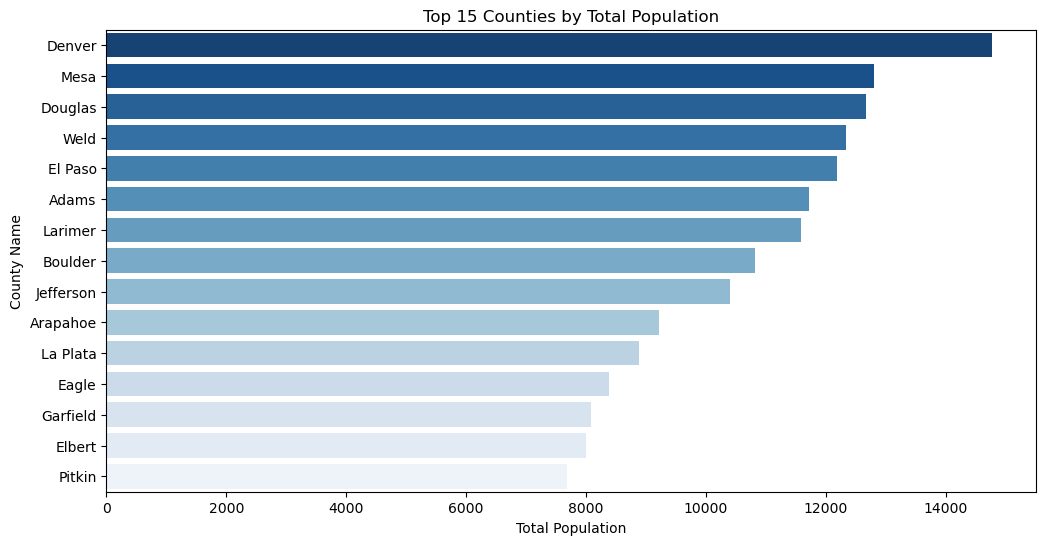

In [161]:
# Get top 15 counties with the highest total population
top_population_counties = merged_pfas_health.groupby("county_name", as_index=False)["total_population"].max().sort_values(by="total_population", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_population_counties, 
    x="total_population", 
    y="county_name", 
    hue="county_name",  # Assign hue to the y-variable
    palette="Blues_r", 
    legend=False  # Hide legend to avoid clutter
)

plt.xlabel("Total Population")
plt.ylabel("County Name")
plt.title("Top 15 Counties by Total Population")
plt.show()

#### Trends in Chronic Disease Prevalence (2018-2022)

This chart tracks the mean prevalence of key chronic diseases over time, focusing on conditions potentially linked to PFAS exposure. Obesity and high cholesterol have consistently high prevalence rates, while other conditions remain relatively stable. Some conditions, such as asthma, and cancer show minor increases from 2021-2022.


<Figure size 1200x600 with 0 Axes>

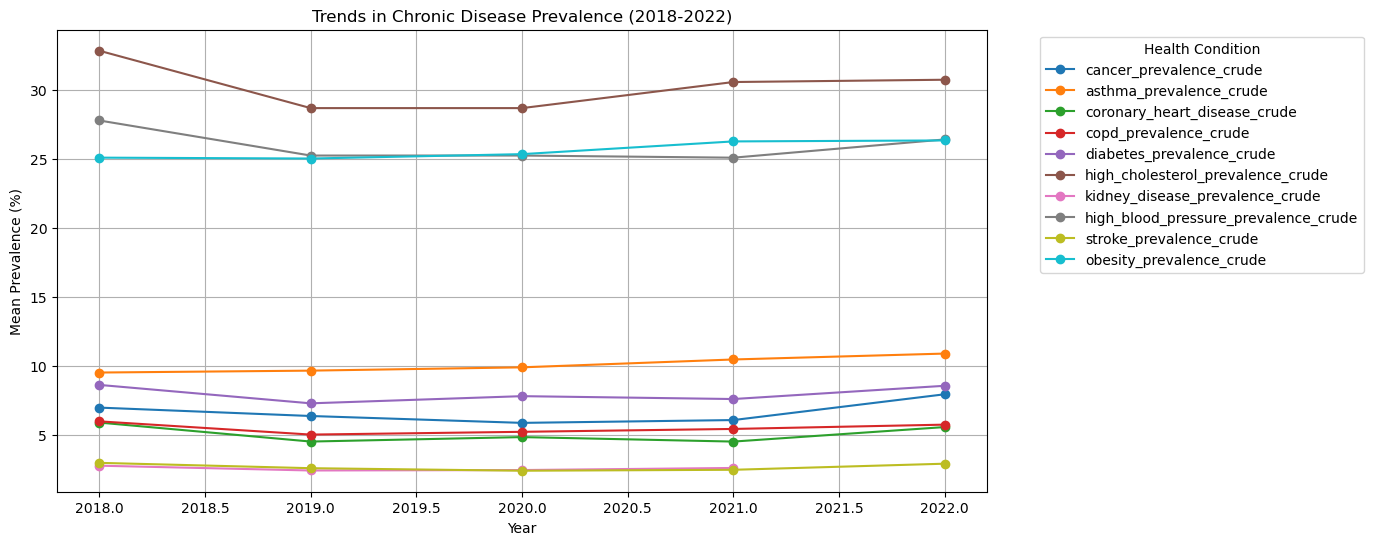

In [163]:
plt.figure(figsize=(12, 6))

# Select key chronic diseases for trend analysis
disease_columns = [
    "cancer_prevalence_crude", "asthma_prevalence_crude",
    "coronary_heart_disease_crude", "copd_prevalence_crude",
    "diabetes_prevalence_crude", "high_cholesterol_prevalence_crude",
    "kidney_disease_prevalence_crude", "high_blood_pressure_prevalence_crude",
    "stroke_prevalence_crude", "obesity_prevalence_crude"
]

# Plot the mean prevalence of each disease over time
merged_pfas_health.groupby("year")[disease_columns].mean().plot(marker="o", figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Mean Prevalence (%)")
plt.title("Trends in Chronic Disease Prevalence (2018-2022)")
plt.legend(title="Health Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.show()

#### Cancer Prevalence vs. Population Size

This scatter plot explores the relationship between total population size and cancer prevalence across different years. By analyzing this, we aim to determine if larger populations exhibit higher cancer prevalence rates.

The majority of data points are clustered around smaller population sizes, with no clear pattern suggesting that larger populations have significantly higher cancer prevalence rates. Some outliers exist in higher population areas, but additional analysis is needed to determine if this is meaningful or due to data variability.

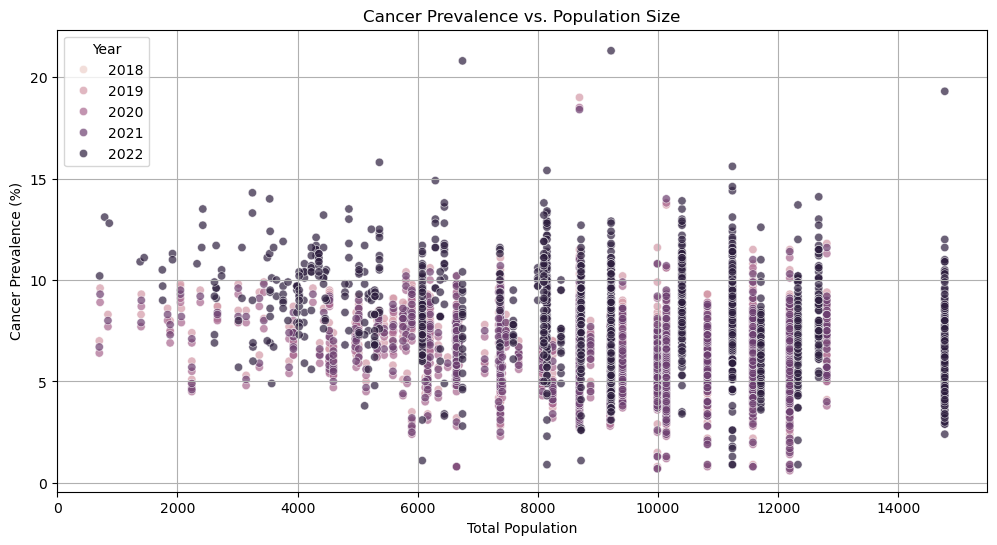

In [165]:
plt.figure(figsize=(12, 6))

# Scatterplot to see if larger populations have higher disease rates
sns.scatterplot(
    data=merged_pfas_health,
    x="total_population",
    y="cancer_prevalence_crude",
    hue="year",
    alpha=0.7
)
plt.xlabel("Total Population")
plt.ylabel("Cancer Prevalence (%)")
plt.title("Cancer Prevalence vs. Population Size")
plt.legend(title="Year")
plt.grid()
plt.show()

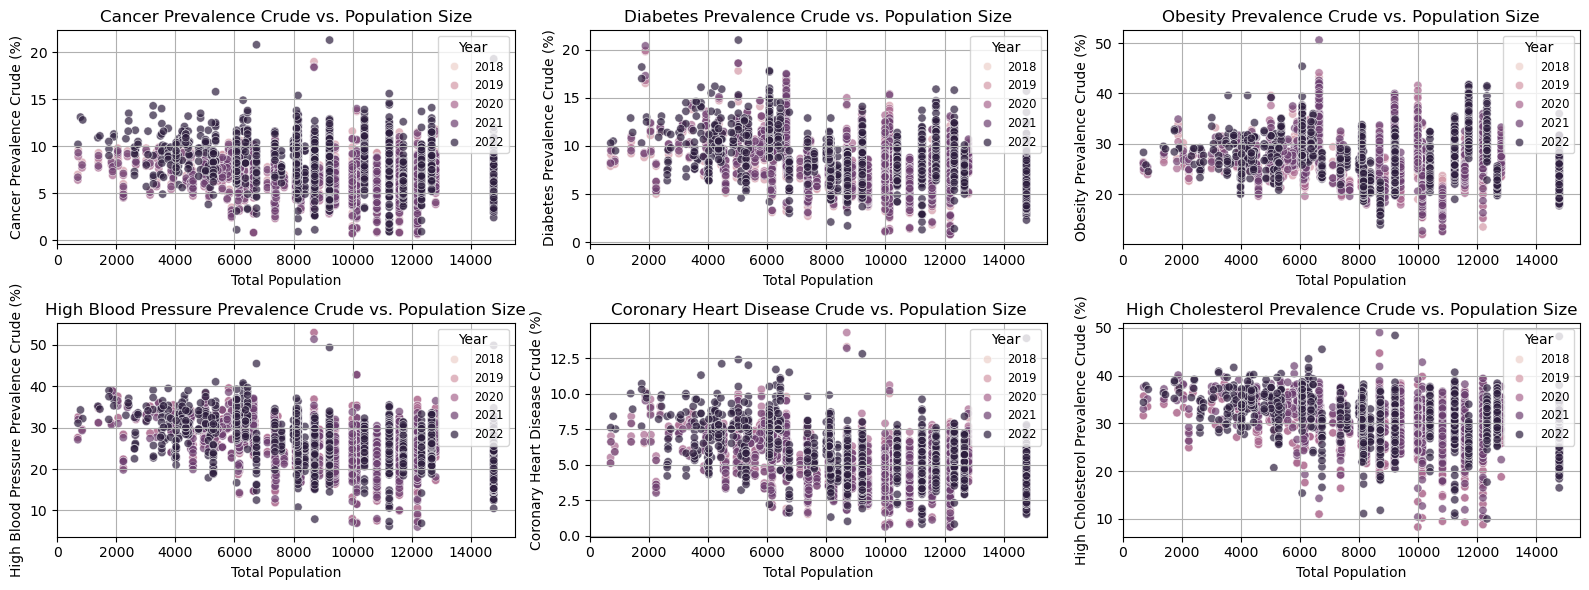

In [166]:
plt.figure(figsize=(16, 6))

# Create a list of conditions to plot
conditions = [
    'cancer_prevalence_crude', 
    'diabetes_prevalence_crude', 
    'obesity_prevalence_crude', 
    'high_blood_pressure_prevalence_crude', 
    'coronary_heart_disease_crude', 
    'high_cholesterol_prevalence_crude'
]

# Create a subplot for each condition
for i, condition in enumerate(conditions, 1):
    plt.subplot(2, 3, i)  # Adjust grid definition depending on number of conditions
    sns.scatterplot(
        data=merged_pfas_health,
        x="total_population",
        y=condition,
        hue="year",
        alpha=0.7
    )
    plt.xlabel("Total Population")
    plt.ylabel(f"{condition.replace('_', ' ').title()} (%)")
    plt.title(f"{condition.replace('_', ' ').title()} vs. Population Size")
    plt.legend(title="Year", loc='upper right', fontsize='small')
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Health Prevalence in Colorado Counties

Visualizing Counties with Higher Than Average Health Disease Prevalence

This visualization highlights Colorado counties where the prevalence of major health conditions exceeds the state average. Each bar represents the top counties with the highest crude prevalence for cancer, diabetes, obesity, high blood pressure, coronary heart disease, and high cholesterol.

**Key Insights:**
- Arapahoe, Denver, and Broomfield counties consistently appear across multiple conditions, suggesting they may face higher overall health risks.
- Pueblo and Adams counties have the highest obesity and diabetes prevalence, highlighting potential metabolic health challenges.
- Montrose and Delta counties show elevated rates for cancer, coronary heart disease, and high blood pressure, indicating a need for cardiovascular and cancer-related health interventions.
- Otero County has one of the highest diabetes and coronary heart disease prevalence rates, pointing to a high burden of chronic conditions.

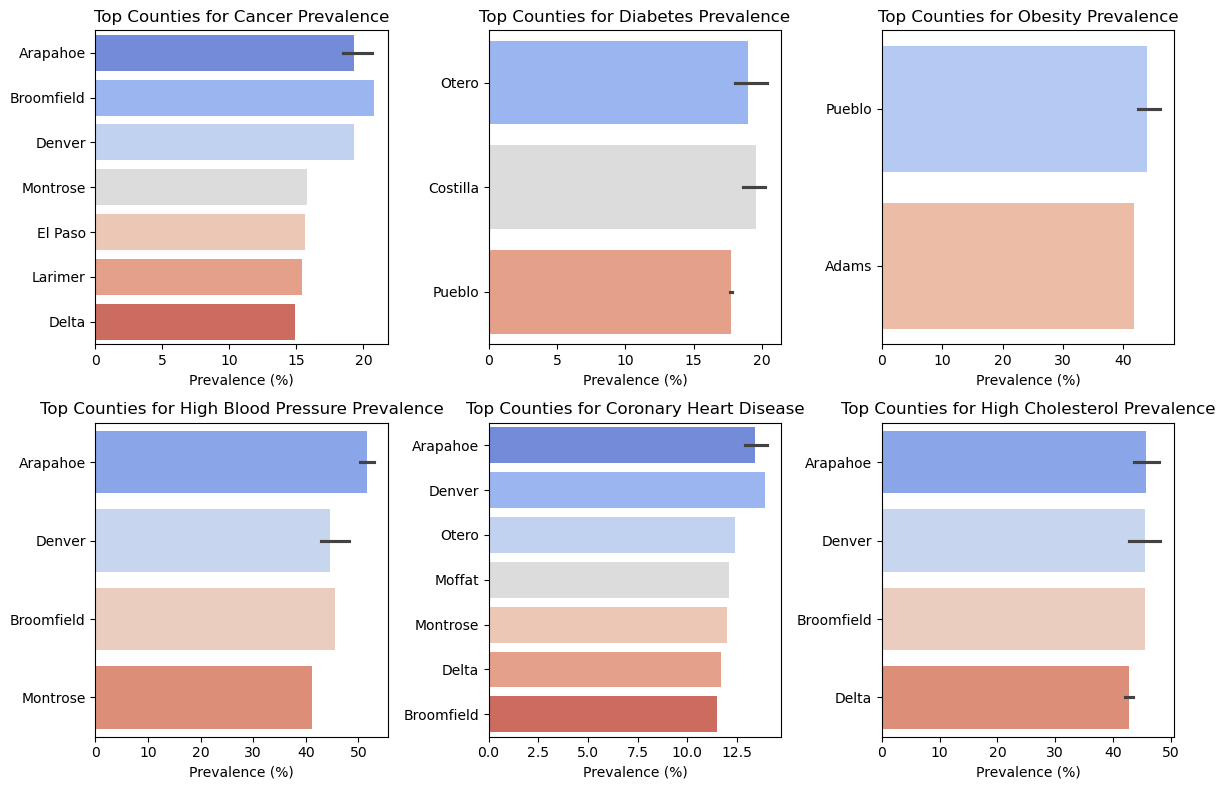

In [168]:
# Calculate average prevalence rates for each condition
average_prevalences = {
    'cancer_prevalence_crude': merged_pfas_health['cancer_prevalence_crude'].mean(),
    'diabetes_prevalence_crude': merged_pfas_health['diabetes_prevalence_crude'].mean(),
    'obesity_prevalence_crude': merged_pfas_health['obesity_prevalence_crude'].mean(),
    'high_blood_pressure_prevalence_crude': merged_pfas_health['high_blood_pressure_prevalence_crude'].mean(),
    'coronary_heart_disease_crude': merged_pfas_health['coronary_heart_disease_crude'].mean(),
    'high_cholesterol_prevalence_crude': merged_pfas_health['high_cholesterol_prevalence_crude'].mean()
}

# Filter data for counties with higher than average prevalence rates
high_prevalence_counties = merged_pfas_health[
    (merged_pfas_health['cancer_prevalence_crude'] > average_prevalences['cancer_prevalence_crude']) |
    (merged_pfas_health['diabetes_prevalence_crude'] > average_prevalences['diabetes_prevalence_crude']) |
    (merged_pfas_health['obesity_prevalence_crude'] > average_prevalences['obesity_prevalence_crude']) |
    (merged_pfas_health['high_blood_pressure_prevalence_crude'] > average_prevalences['high_blood_pressure_prevalence_crude']) |
    (merged_pfas_health['coronary_heart_disease_crude'] > average_prevalences['coronary_heart_disease_crude']) |
    (merged_pfas_health['high_cholesterol_prevalence_crude'] > average_prevalences['high_cholesterol_prevalence_crude'])
]

# Creating a visual plot
plt.figure(figsize=(12, 8))
for i, (condition, avg) in enumerate(average_prevalences.items(), 1):
    plt.subplot(2, 3, i)
    subset = high_prevalence_counties[[condition, 'county_name']].dropna()
    subset = subset.sort_values(by=condition, ascending=False).head(10)  # Top 10 counties for clarity
    
    sns.barplot(x=condition, y='county_name', data=subset, hue='county_name', dodge=False, legend=False, palette='coolwarm')
    
    plt.title(f'Top Counties for {condition.replace("_crude", "").replace("_", " ").title()}')
    plt.xlabel('Prevalence (%)')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### Chronic Disease Prevalence vs. Population  

This set of scatter plots visualizes the relationship between total population and prevalence rates for key chronic conditions across Colorado counties. Each bubble represents a county, with size indicating population and color reflecting prevalence rates.

**Key Insights:**
- Arapahoe, Denver, and Broomfield counties consistently show higher prevalence rates across multiple conditions, suggesting widespread chronic health concerns.
- Pueblo County has the highest obesity prevalence, while Otero and Costilla counties exhibit the highest diabetes rates, indicating significant metabolic health risks.
- Montrose and Delta counties rank high for cancer and heart disease prevalence, highlighting potential cardiovascular and cancer-related concerns.
- Higher population counties tend to have moderate prevalence rates, whereas smaller counties show more extreme variations, possibly due to sample size effects.

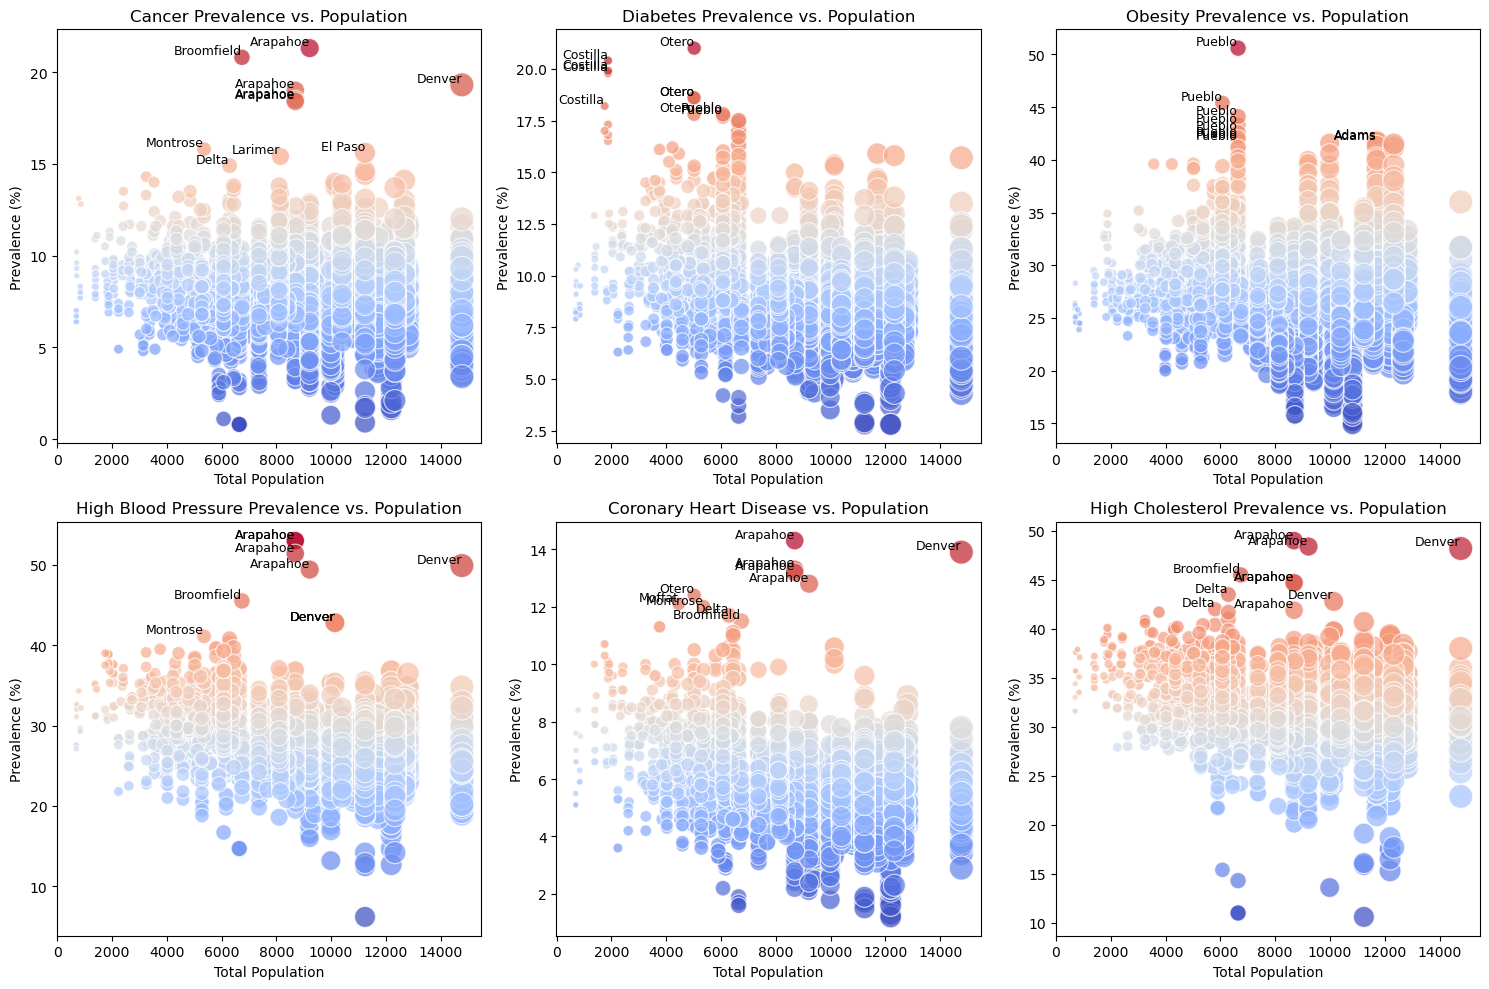

In [170]:
# Create a figure for multiple subplots
plt.figure(figsize=(15, 10))

for i, condition in enumerate(average_prevalences.keys(), 1):
    plt.subplot(2, 3, i)
    
    subset = high_prevalence_counties[['county_name', 'total_population', condition]].dropna()
    
    # Sort and keep only the top 10 counties for legend clarity
    top_counties = subset.sort_values(by=condition, ascending=False).head(10)
    
    # Scatter plot where bubble size is proportional to population
    scatter = sns.scatterplot(
        data=subset,
        x='total_population',
        y=condition,
        size='total_population',  # Bubble size reflects population
        sizes=(20, 300),  # Adjust min/max bubble size
        hue=condition,  # Use prevalence rate as color gradient
        palette='coolwarm',
        legend=False,  # Disable full legend
        alpha=0.7  # Transparency to avoid overlap
    )

    # Label only the top 10 counties to reduce clutter
    for _, row in top_counties.iterrows():
        plt.text(row['total_population'], row[condition], row['county_name'],
                 fontsize=9, ha='right', va='bottom', color='black')

    plt.title(f'{condition.replace("_crude", "").replace("_", " ").title()} vs. Population')
    plt.xlabel('Total Population')
    plt.ylabel('Prevalence (%)')

plt.tight_layout()
plt.show()

#### Health Risk Score Calculation per County  

The Health Risk Score quantifies the overall prevalence of chronic diseases for each county in Colorado. It is calculated by normalizing key health conditions (e.g., cancer, diabetes, obesity, heart disease) using Min-Max Scaling and then averaging the standardized values to create a single, comparable metric.  

**Interpreting the Score:**  
- A higher score indicates a greater burden of chronic disease in a county.  
- A lower score suggests better overall health outcomes.  

In [172]:
# Aggregate total population & prevalence data by county
county_health_data = merged_pfas_health.groupby('county_name').agg({
    'total_population': 'max',  # Use the max per county per year
    'cancer_prevalence_crude': 'mean',
    'diabetes_prevalence_crude': 'mean',
    'obesity_prevalence_crude': 'mean',
    'high_blood_pressure_prevalence_crude': 'mean',
    'coronary_heart_disease_crude': 'mean',
    'high_cholesterol_prevalence_crude': 'mean'
}).reset_index()

# Verify data
print(county_health_data.head())

  county_name  total_population  cancer_prevalence_crude  \
0       Adams           11712.0                 5.367766   
1     Alamosa            6342.0                 6.476471   
2    Arapahoe            9218.0                 6.360631   
3   Archuleta            5349.0                 9.129412   
4        Baca            2050.0                 9.825000   

   diabetes_prevalence_crude  obesity_prevalence_crude  \
0                   8.576142                 31.645431   
1                  10.917647                 29.670588   
2                   7.486877                 25.168272   
3                  10.523529                 25.405882   
4                  12.012500                 28.600000   

   high_blood_pressure_prevalence_crude  coronary_heart_disease_crude  \
0                             23.864213                      4.601015   
1                             29.035294                      6.329412   
2                             26.201329                      4.391362  

In [173]:
from sklearn.preprocessing import MinMaxScaler

# List of health conditions to include in the index
health_conditions = [
    'cancer_prevalence_crude',
    'diabetes_prevalence_crude',
    'obesity_prevalence_crude',
    'high_blood_pressure_prevalence_crude',
    'coronary_heart_disease_crude',
    'high_cholesterol_prevalence_crude'
]

# Normalize health conditions (0 to 1 scaling)
scaler = MinMaxScaler()
county_health_data[health_conditions] = scaler.fit_transform(county_health_data[health_conditions])

# Weight the health risk score by population (higher weight for high-population areas)
county_health_data["health_risk_score"] = (county_health_data[health_conditions].sum(axis=1) * 
                                           (county_health_data["total_population"] / county_health_data["total_population"].max()))

# Verify the new feature
print(county_health_data[['county_name', 'health_risk_score', 'total_population']].head())

  county_name  health_risk_score  total_population
0       Adams           1.054037           11712.0
1     Alamosa           1.105997            6342.0
2    Arapahoe           0.856714            9218.0
3   Archuleta           1.282961            5349.0
4        Baca           0.635463            2050.0


#### Geographic Distribution of Health Risk Scores in Colorado  

Next, we will visualize the **Health Risk Score across Colorado counties** to identify regions with the highest overall disease burden. This analysis will help highlight areas with elevated chronic health risks and assess potential correlations with environmental factors such as PFAS contamination.  

In [175]:
# Load county shapefile
counties = gpd.read_file('C:/Users/macfr/OneDrive/Documents/MSDS/PFAS Project/tl_2024_us_county/tl_2024_us_county.shp')

# Standardize county names to match health data
counties["NAME"] = counties["NAME"].str.upper().str.strip()
county_health_data["county_name"] = county_health_data["county_name"].str.upper().str.strip()

# Extract unique county names from `county_health_data`
colorado_counties = county_health_data["county_name"].unique()
print("Unique Counties in Health Data:", sorted(colorado_counties))

Unique Counties in Health Data: ['ADAMS', 'ALAMOSA', 'ARAPAHOE', 'ARCHULETA', 'BACA', 'BENT', 'BOULDER', 'BROOMFIELD', 'CHAFFEE', 'CHEYENNE', 'CLEAR CREEK', 'CONEJOS', 'COSTILLA', 'CROWLEY', 'CUSTER', 'DELTA', 'DENVER', 'DOLORES', 'DOUGLAS', 'EAGLE', 'EL PASO', 'ELBERT', 'FREMONT', 'GARFIELD', 'GILPIN', 'GRAND', 'GUNNISON', 'HINSDALE', 'HUERFANO', 'JACKSON', 'JEFFERSON', 'KIOWA', 'KIT CARSON', 'LA PLATA', 'LAKE', 'LARIMER', 'LAS ANIMAS', 'LINCOLN', 'LOGAN', 'MESA', 'MINERAL', 'MOFFAT', 'MONTEZUMA', 'MONTROSE', 'MORGAN', 'OTERO', 'OURAY', 'PARK', 'PHILLIPS', 'PITKIN', 'PROWERS', 'PUEBLO', 'RIO BLANCO', 'RIO GRANDE', 'ROUTT', 'SAGUACHE', 'SAN JUAN', 'SAN MIGUEL', 'SEDGWICK', 'SUMMIT', 'TELLER', 'WASHINGTON', 'WELD', 'YUMA']


In [176]:
# Filter counties that exist in health data
county_filtered = counties[counties["NAME"].isin(colorado_counties)].copy()

# Verify filtering worked (sort county names alphabetically)
print("Filtered County Names in Shapefile:", sorted(county_filtered["NAME"].unique()))

Filtered County Names in Shapefile: ['ADAMS', 'ALAMOSA', 'ARAPAHOE', 'ARCHULETA', 'BACA', 'BENT', 'BOULDER', 'BROOMFIELD', 'CHAFFEE', 'CHEYENNE', 'CLEAR CREEK', 'CONEJOS', 'COSTILLA', 'CROWLEY', 'CUSTER', 'DELTA', 'DENVER', 'DOLORES', 'DOUGLAS', 'EAGLE', 'EL PASO', 'ELBERT', 'FREMONT', 'GARFIELD', 'GILPIN', 'GRAND', 'GUNNISON', 'HINSDALE', 'HUERFANO', 'JACKSON', 'JEFFERSON', 'KIOWA', 'KIT CARSON', 'LA PLATA', 'LAKE', 'LARIMER', 'LAS ANIMAS', 'LINCOLN', 'LOGAN', 'MESA', 'MINERAL', 'MOFFAT', 'MONTEZUMA', 'MONTROSE', 'MORGAN', 'OTERO', 'OURAY', 'PARK', 'PHILLIPS', 'PITKIN', 'PROWERS', 'PUEBLO', 'RIO BLANCO', 'RIO GRANDE', 'ROUTT', 'SAGUACHE', 'SAN JUAN', 'SAN MIGUEL', 'SEDGWICK', 'SUMMIT', 'TELLER', 'WASHINGTON', 'WELD', 'YUMA']


In [177]:
# Merge filtered county shapefile with health data
county_geo = county_filtered.merge(county_health_data, left_on="NAME", right_on="county_name", how="left")

# Check for missing data after merge
print("Missing Counties After Merge:", set(colorado_counties) - set(county_geo["NAME"]))

Missing Counties After Merge: set()


In [178]:
county_geo.head()

STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0      08      109  00198170  08109  0500000US08109   SAGUACHE   
1      39      085  01074055  39085  0500000US39085       LAKE   
2      35      035  00929104  35035  0500000US35035      OTERO   
3      56      023  01605076  56023  0500000US56023    LINCOLN   
4      16      051  00399751  16051  0500000US16051  JEFFERSON   

           NAMELSAD LSAD CLASSFP  MTFCC  ...  \
0   Saguache County   06      H1  G4020  ...   
1       Lake County   06      H1  G4020  ...   
2      Otero County   06      H1  G4020  ...   
3    Lincoln County   06      H1  G4020  ...   
4  Jefferson County   06      H1  G4020  ...   

                                            geometry county_name  \
0  POLYGON ((-107.00189 38.09291, -107.00188 38.0...    SAGUACHE   
1  POLYGON ((-81.10226 41.71431, -81.10225 41.713...        LAKE   
2  POLYGON ((-106.37658 32.95805, -106.37245 32.9...       OTERO   
3  POLYGON ((-111.04723 42.4691, -111.04714 42.47...     LINCOLN   
4  POLYGON ((-111.80455 43.62689, -111.80694 43.6...   JEFFERSON   

  total_population cancer_prevalence_crude  diabetes_prevalence_crude  \
0           3601.0                0.348795                   0.527750   
1           5140.0                0.046842                   0.216736   
2           5023.0                0.509541                   0.599692   
3           3495.0                0.466150                   0.311344   
4          10399.0                0.365700                   0.109336   

   obesity_prevalence_crude high_blood_pressure_prevalence_crude  \
0                  0.720329                             0.619299   
1                  0.592901                             0.205581   
2                  0.852537                             0.748517   
3                  0.671383                             0.572074   
4                  0.390852                             0.204236   

  coronary_heart_disease_crude high_cholesterol_prevalence_crude  \
0                     0.564757                          0.633581   
1                     0.192361                          0.226569   
2                     0.746705                          0.737198   
3                     0.514614                          0.520754   
4                     0.167269                          0.334661   

  health_risk_score  
0          0.832306  
1          0.515284  
2          1.426076  
3          0.723065  
4          1.106599  

[5 rows x 28 columns]

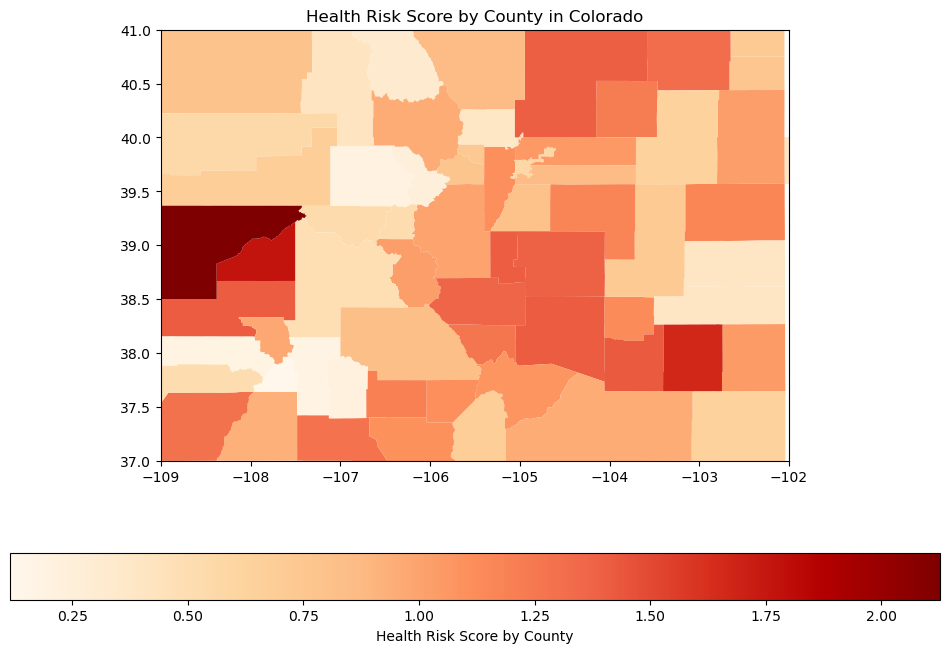

In [179]:
# Define color scale for health risk score
norm = colors.Normalize(vmin=county_geo['health_risk_score'].min(), vmax=county_geo['health_risk_score'].max())

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
county_geo.plot(column='health_risk_score', ax=ax, legend=True, cmap='OrRd', norm=norm,
                legend_kwds={'label': "Health Risk Score by County", 'orientation': "horizontal"},
                missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "Missing values"})

# Set Colorado boundary limits
ax.set_xlim(-109, -102)  # Longitude limits for Colorado
ax.set_ylim(37, 41)  # Latitude limits for Colorado
plt.title('Health Risk Score by County in Colorado')

plt.show()

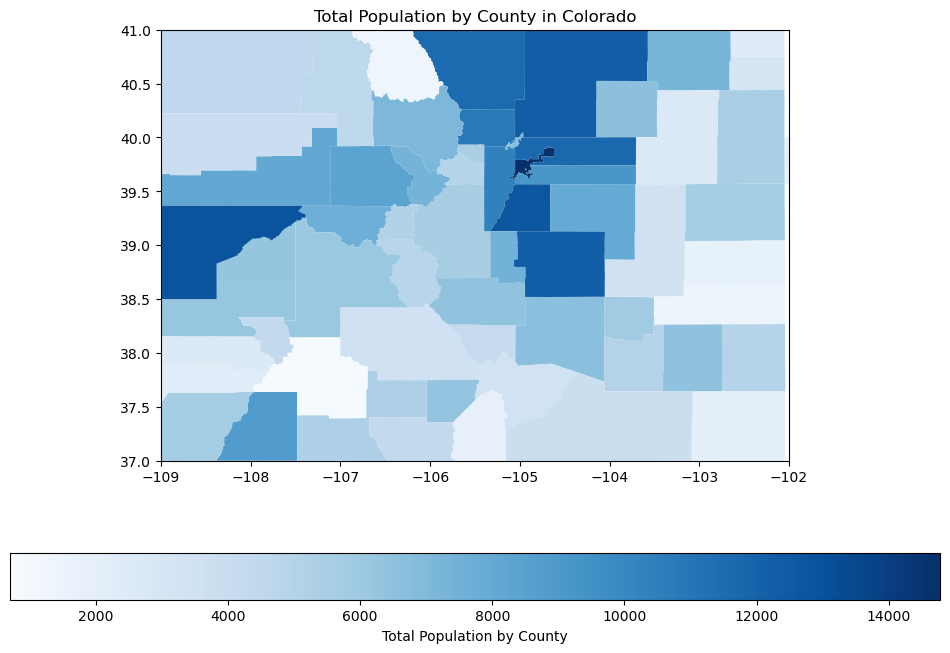

In [180]:
# Define color scale for total population
norm = colors.Normalize(vmin=county_geo['total_population'].min(), vmax=county_geo['total_population'].max())

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
county_geo.plot(column='total_population', ax=ax, legend=True, cmap='Blues', norm=norm,
                legend_kwds={'label': "Total Population by County", 'orientation': "horizontal"},
                missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "Missing values"})

ax.set_xlim(-109, -102)  # Adjust longitude limits for Colorado
ax.set_ylim(37, 41)  # Adjust latitude limits for Colorado
plt.title('Total Population by County in Colorado')
plt.show()

> **Note:** The Health Risk Score Map shows that some lower-population counties have higher health risks, suggesting chronic disease burdens may be more concentrated in rural areas. In contrast, high-population counties like Denver and Arapahoe have moderate risk scores, possibly due to better healthcare access. This suggests that health disparities may be more pronounced in rural areas

## Part 3 - Integrating PFAS and Health Data  

This section examines the relationship between PFAS contamination levels and health risk scores to explore potential correlations between environmental exposure and chronic disease prevalence. By merging these datasets, we aim to identify counties where higher PFAS levels may align with elevated health risks, offering insights into potential public health concerns.  

> **Note:** Mortality data was excluded from this analysis due to its lack of granularity at the county level. A significant portion of the data was mislabeled as "Colorado County," limiting its usefulness for meaningful insights.

In [184]:
# Standardize county names to ensure proper merging
county_health_data["county_name"] = county_health_data["county_name"].str.title().str.strip()
county_data.index = county_data.index.str.title().str.strip()

# Merge PFAS levels with health risk scores
pfas_health_merged = county_health_data[['county_name', 'health_risk_score']].merge(
    county_data.rename("result_numeric"), left_on="county_name", right_index=True, how="inner"
)

# Verify merged dataset
print(pfas_health_merged.head())

  county_name  health_risk_score  result_numeric
0       Adams           1.054037        4.872242
1     Alamosa           1.105997        0.012148
2    Arapahoe           0.856714        0.713256
3   Archuleta           1.282961        0.004800
4        Baca           0.635463        0.231500


#### Correlation Between PFAS Contamination and Health Risk Score  

This scatter plot examines the relationship between average PFAS contamination levels and the Health Risk Score for each county in Colorado. The bubble size represents the total county population, while the color gradient indicates PFAS levels. A dashed trend line shows the overall correlation.

**Key Insights:**
- Teller County stands out with both high PFAS contamination and an elevated health risk score.
- El Paso, Adams, and Mesa counties also show moderate PFAS levels and notable health risks.
- Most counties cluster around lower PFAS levels, with varying health risk scores.
- While the trend line suggests a positive correlation, the wide confidence interval indicates variability, suggesting other factors influence health risks beyond PFAS exposure.

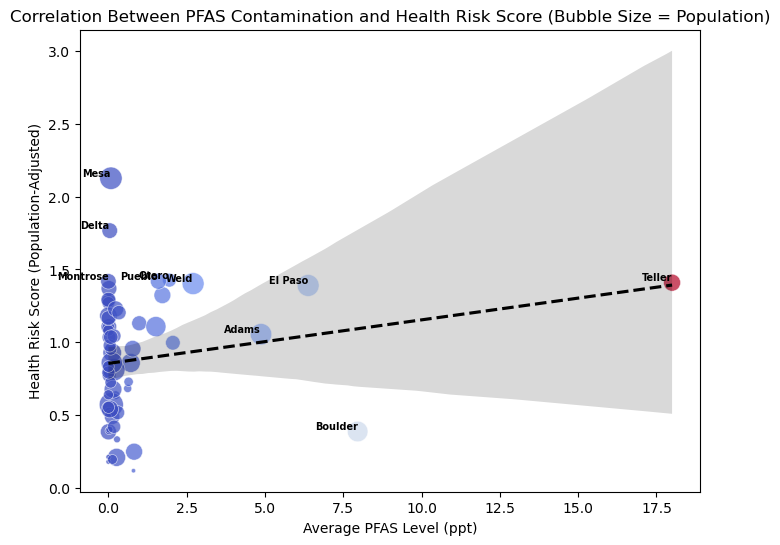

In [186]:
plt.figure(figsize=(8, 6))

# Bubble chart with PFAS levels (color) and population (size)
scatter = sns.scatterplot(
    data=pfas_health_merged, 
    x='result_numeric', 
    y='health_risk_score', 
    size=county_health_data["total_population"],  # Bubble size by population
    sizes=(10, 300), 
    hue='result_numeric',  
    palette='coolwarm', 
    alpha=0.7,
    legend=False
)

# Fit and plot a trend line (linear regression)
sns.regplot(
    data=pfas_health_merged, 
    x='result_numeric', 
    y='health_risk_score', 
    scatter=False, 
    color='black', 
    line_kws={"linestyle": "dashed"}
)

# Select counties with the highest PFAS levels and highest health risks
top_counties = pd.concat([
    pfas_health_merged.nlargest(5, "result_numeric"),
    pfas_health_merged.nlargest(5, "health_risk_score")
]).drop_duplicates()

# Label key counties on the plot
for _, row in top_counties.iterrows():
    plt.text(row["result_numeric"], row["health_risk_score"], row["county_name"], 
             fontsize=7, ha='right', va='bottom', color='black', weight='bold')

# Titles & Labels
plt.xlabel("Average PFAS Level (ppt)")
plt.ylabel("Health Risk Score (Population-Adjusted)")
plt.title("Correlation Between PFAS Contamination and Health Risk Score (Bubble Size = Population)")

plt.show()

#### Distribution of PFAS Levels Across All Locations  

The box plot above illustrates PFAS concentration levels across all sampled locations. A significant number of zero values dominate the dataset, causing the distribution to be heavily skewed. This obscures meaningful insights into areas where PFAS contamination is actually present.  

> **Next Step:** We need to address the prevalence of **zero values** to ensure the analysis focuses on locations with detectable PFAS levels.  


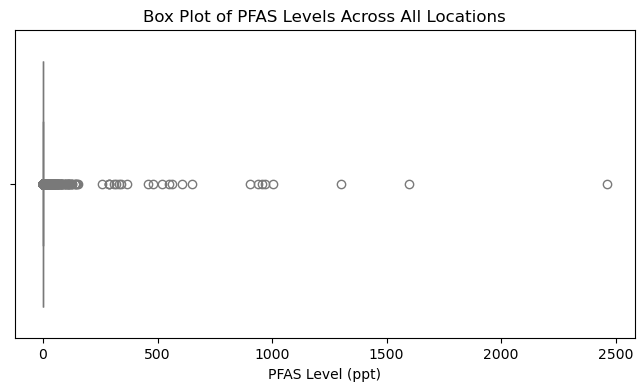

In [188]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=merged_pfas, x='result_numeric', color='lightblue')
plt.xlabel("PFAS Level (ppt)")
plt.title("Box Plot of PFAS Levels Across All Locations")
plt.show()

In [189]:
print(merged_pfas['result_numeric'].describe())

count    17113.000000
mean         1.877756
std         32.779860
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2460.570000
Name: result_numeric, dtype: float64


In [190]:
# Find unique nonzero PFAS levels
unique_pfas_levels = merged_pfas[merged_pfas["result_numeric"] > 0]["result_numeric"].unique()
print("Unique PFAS levels (nonzero):", unique_pfas_levels)

Unique PFAS levels (nonzero): [2.30000e+00 2.10000e+00 2.40000e+00 3.80000e+00 4.10000e+00 3.60000e+00
 4.10000e-01 5.00000e-01 7.10000e+00 1.10000e+02 4.20000e+01 3.90000e+00
 2.80000e+00 2.70000e+00 2.20000e+00 1.10000e+01 1.00000e+01 8.90000e+00
 8.40000e+00 3.40000e+01 4.30000e+00 6.40000e+00 1.70000e+01 3.20000e+00
 3.00000e+00 3.10000e+00 5.20000e+00 1.90000e+01 1.30000e+00 5.60000e+00
 3.70000e+00 2.50000e+00 6.15000e+00 2.00000e+00 9.50000e-01 1.59690e+03
 1.00600e+03 3.20000e+02 9.40000e+02 1.40000e+02 7.10000e+01 5.60000e+01
 6.60000e+01 5.60000e-01 5.90000e-01 1.10000e+00 4.40000e-01 5.10000e-01
 9.90000e-01 6.70000e-01 6.70000e+01 7.60000e+01 4.10000e+01 2.90000e+02
 3.40000e+02 9.55900e+02 1.90000e+00 3.66000e+02 1.20000e+00 3.16100e+01
 1.28000e+01 9.10000e-01 4.70000e+00 5.10000e+00 8.30000e+00 5.40000e+00
 4.50000e+00 4.00000e+00 6.20000e+00 3.50000e+00 5.50000e-01 1.40000e+00
 2.39200e+01 9.70000e+00 7.20000e-01 6.85000e+00 1.80000e+00 9.00000e-01
 5.50000e+00 7.90000e

#### Cleaning PFAS Data: Removing Zeros and Extreme Outliers  

To improve the analysis, we apply two key filtering steps to remove **excess zeros** and **extreme outliers**:  

1. **Threshold Filtering:**  
   - All PFAS concentration values **below 0.001 ppt** are removed.  
   - This ensures we focus on locations with measurable PFAS contamination rather than noise or detection limits.  

2. **Outlier Removal Using Z-Scores:**  
   - We calculate **Z-scores** to measure how far each PFAS value deviates from the mean.  
   - Records with **Z-scores beyond ±3 standard deviations** are removed as extreme outliers.  
   - This prevents a small number of exceptionally high values from skewing the analysis.  

After these steps, we retain **only meaningful PFAS measurements**, improving the accuracy of further correlations and geographic assessments.  

In [192]:
# Keep all values above a small threshold
merged_pfas_cleaned = merged_pfas[merged_pfas["result_numeric"] > 0.001]

# Print summary stats again
print(f"Remaining PFAS records after threshold filtering: {len(merged_pfas_cleaned)}")
print(merged_pfas_cleaned['result_numeric'].describe())

Remaining PFAS records after threshold filtering: 2317
count    2317.000000
mean       13.868813
std        88.163601
min         0.160000
25%         0.790000
50%         2.200000
75%         6.400000
max      2460.570000
Name: result_numeric, dtype: float64


In [193]:
from scipy import stats

# Compute Z-scores for PFAS levels
merged_pfas_cleaned = merged_pfas[merged_pfas["result_numeric"] > 0].copy()  # Keep only nonzero values
merged_pfas_cleaned["z_score"] = stats.zscore(merged_pfas_cleaned["result_numeric"])

# Filter out extreme outliers (e.g., beyond 3 standard deviations)
merged_pfas_cleaned = merged_pfas_cleaned[merged_pfas_cleaned["z_score"].abs() <= 3]

# Drop the Z-score column (no longer needed)
merged_pfas_cleaned = merged_pfas_cleaned.drop(columns=["z_score"])

# Check remaining records
print(f"Remaining PFAS records after Z-score filtering: {len(merged_pfas_cleaned)}")
print(merged_pfas_cleaned["result_numeric"].describe())

Remaining PFAS records after Z-score filtering: 2294
count    2294.000000
mean        6.817105
std        15.504156
min         0.160000
25%         0.790000
50%         2.100000
75%         6.200000
max       257.200000
Name: result_numeric, dtype: float64


In [194]:
merged_pfas_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2294 entries, 189 to 17090
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loc_name                2294 non-null   object        
 1   loc_desc                2294 non-null   object        
 2   chemical_name           2294 non-null   object        
 3   result_numeric          2294 non-null   float64       
 4   sample_date             2294 non-null   datetime64[ns]
 5   ppt_unit                2294 non-null   object        
 6   zipcode                 2294 non-null   object        
 7   city                    2294 non-null   object        
 8   county                  2294 non-null   object        
 9   method_detection_limit  1658 non-null   float64       
 10  loc_purpose             2280 non-null   object        
 11  loc_type                2294 non-null   object        
 12  remark_1                2262 non-null   object    

In [195]:
# Aggregate PFAS data by county (AFTER removing outliers)
county_data_cleaned = merged_pfas_cleaned.groupby('county')['result_numeric'].mean()

# Verify updated county PFAS levels
print(county_data_cleaned.head())

county
ADAMS        16.961776
ALAMOSA       0.546667
ARAPAHOE      5.877500
ARCHULETA     0.320000
BACA          7.937143
Name: result_numeric, dtype: float64


In [196]:
# Standardize county names to ensure proper merging
county_health_data["county_name"] = county_health_data["county_name"].str.title().str.strip()
county_data_cleaned.index = county_data_cleaned.index.str.title().str.strip()

# Merge cleaned PFAS levels with health risk scores
pfas_health_merged_clean = county_health_data[['county_name', 'health_risk_score']].merge(
    county_data_cleaned.rename("cleaned_result_numeric"), left_on="county_name", right_index=True, how="inner"
)

# Sort the dataset by cleaned PFAS levels in ascending order
pfas_health_merged_clean = pfas_health_merged_clean.sort_values(by="cleaned_result_numeric", ascending=False)

# Verify merged dataset
print(pfas_health_merged_clean.head(10))

   county_name  health_risk_score  cleaned_result_numeric
20     El Paso           1.389577               17.740970
0        Adams           1.054037               16.961776
62        Weld           1.402442               11.920273
12    Costilla           0.681172                9.225000
60      Teller           1.408764                9.156207
51      Pueblo           1.418837                8.924200
4         Baca           0.635463                7.937143
47        Park           0.995597                7.262941
38       Logan           1.322696                7.231981
45       Otero           1.426076                6.761198


#### Correlation Between PFAS Contamination and Health Risk Score (After Cleaning)  

This updated scatter plot visualizes the relationship between PFAS contamination levels and health risk scores after removing zero values and extreme outliers. The bubble size represents county population, while the color gradient reflects cleaned PFAS levels.  

**Key Insights:**  
- El Paso, Adams, and Weld counties remain areas of concern with higher PFAS levels and elevated health risks.  
- Mesa and Delta counties show high health risk scores despite lower PFAS levels, suggesting other contributing factors.  
- The trend line still suggests a positive correlation, though variability remains, indicating that while PFAS exposure may contribute to health risks, other environmental or socioeconomic factors play a role.  

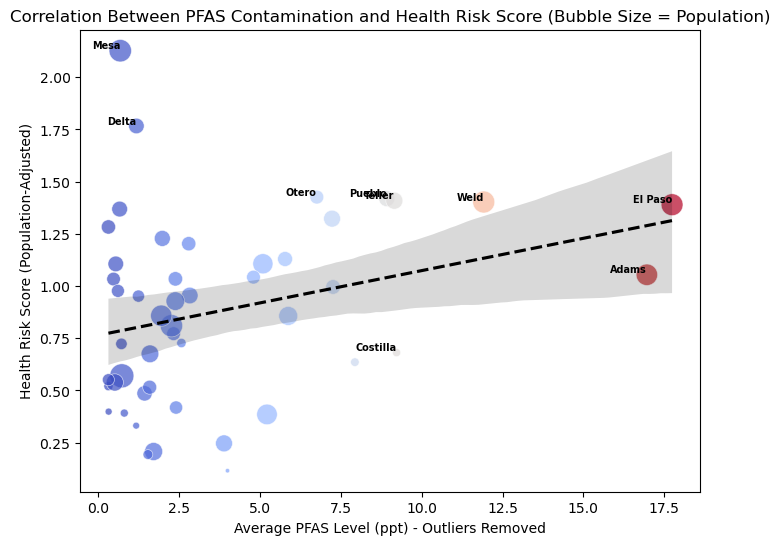

In [198]:
plt.figure(figsize=(8, 6))

# Bubble chart with cleaned PFAS levels (color) and population (size)
scatter = sns.scatterplot(
    data=pfas_health_merged_clean, 
    x='cleaned_result_numeric',  # Use cleaned PFAS levels
    y='health_risk_score', 
    size=county_health_data["total_population"],  # Bubble size by population
    sizes=(10, 300),  
    hue='cleaned_result_numeric',  # Use cleaned PFAS levels for color
    palette='coolwarm',  
    alpha=0.7,
    legend=False
)

# Fit and plot a trend line (linear regression)
sns.regplot(
    data=pfas_health_merged_clean, 
    x='cleaned_result_numeric', 
    y='health_risk_score', 
    scatter=False, 
    color='black', 
    line_kws={"linestyle": "dashed"}
)

# Select counties with the highest PFAS levels and highest health risks
top_counties = pd.concat([
    pfas_health_merged_clean.nlargest(5, "cleaned_result_numeric"),
    pfas_health_merged_clean.nlargest(5, "health_risk_score")
]).drop_duplicates()

# Label key counties on the plot
for _, row in top_counties.iterrows():
    plt.text(row["cleaned_result_numeric"], row["health_risk_score"], row["county_name"], 
             fontsize=7, ha='right', va='bottom', color='black', weight='bold')

# Titles & Labels
plt.xlabel("Average PFAS Level (ppt) - Outliers Removed")
plt.ylabel("Health Risk Score (Population-Adjusted)")
plt.title("Correlation Between PFAS Contamination and Health Risk Score (Bubble Size = Population)")

plt.show()


#### PFAS Level Distribution Before & After Outlier Removal  

This density plot compares PFAS concentration levels before and after removing extreme outliers. The blue distribution represents raw PFAS measurements, while the red distribution shows values after filtering. Removing outliers helps focus on meaningful trends without extreme values skewing the analysis.


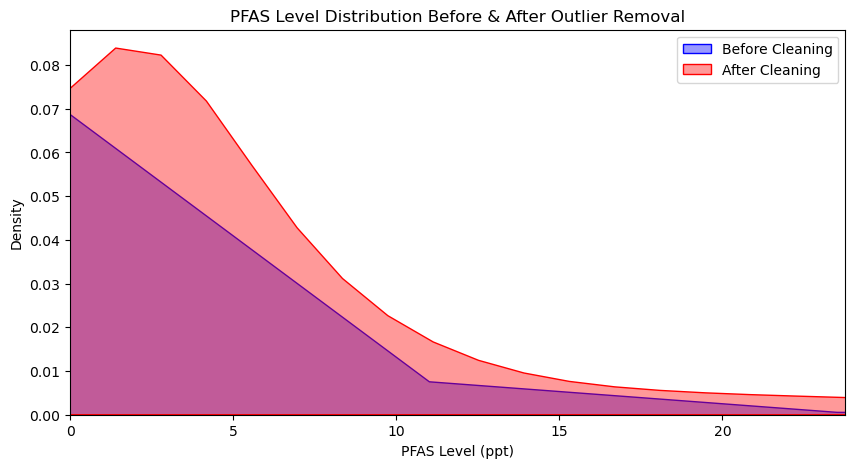

In [200]:
plt.figure(figsize=(10, 5))

# Before Outlier Removal
sns.kdeplot(merged_pfas['result_numeric'], label="Before Cleaning", color="blue", fill=True, alpha=0.4)

# After Outlier Removal
sns.kdeplot(merged_pfas_cleaned['result_numeric'], label="After Cleaning", color="red", fill=True, alpha=0.4)

plt.xlabel("PFAS Level (ppt)")
plt.ylabel("Density")
plt.title("PFAS Level Distribution Before & After Outlier Removal")

# Set x-axis limit to remove extreme outliers (adjust as needed)
plt.xlim(0, merged_pfas['result_numeric'].quantile(0.99))  # Show only up to the 99th percentile

plt.legend()
plt.show()

#### Pearson Correlation Between PFAS Levels & Health Risk Score  

The **Pearson correlation coefficient (0.331)** suggests a weak to moderate positive correlation between PFAS contamination and health risk scores. The **p-value (0.032)** indicates statistical significance at the 5% level, meaning there is evidence of an association, but further analysis is needed to confirm causation.

In [202]:
# Calculate Pearson correlation coefficient
corr, p_value = stats.pearsonr(pfas_health_merged_clean["cleaned_result_numeric"], pfas_health_merged_clean["health_risk_score"])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.290
P-value: 0.046


#### Health Risk Scores in High vs. Low PFAS Counties  

This box plot compares health risk scores between counties with **high** and **low** PFAS contamination levels. The average health risk score is **higher in high-PFAS counties (0.98)** compared to **low-PFAS counties (0.76)**, suggesting a possible association between PFAS exposure and increased health risks. Further analysis is needed to determine causal relationships.

Average Health Risk Score in High-PFAS Counties: 0.9439028135683715
Average Health Risk Score in Low-PFAS Counties: 0.817116825235409


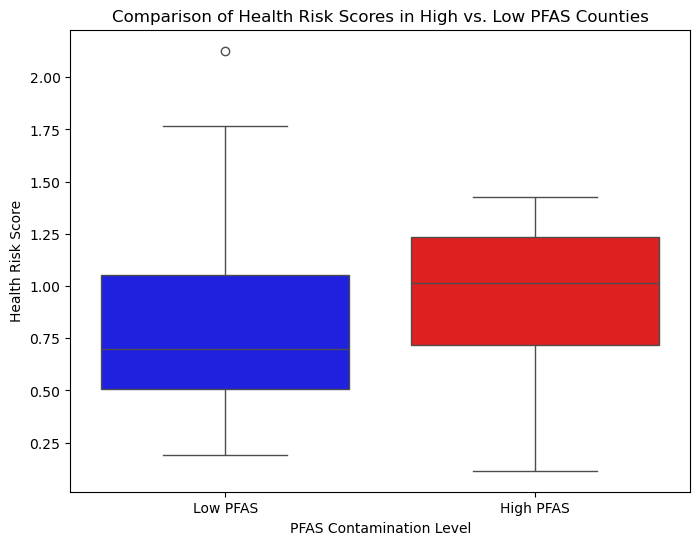

In [204]:
# Define high and low PFAS groups
median_pfas = pfas_health_merged_clean["cleaned_result_numeric"].median()
pfas_health_merged_clean["PFAS Contamination Level"] = pd.qcut(
    pfas_health_merged_clean["cleaned_result_numeric"], q=2, labels=["Low PFAS", "High PFAS"]
)

# Compare means
high_pfas = pfas_health_merged_clean[pfas_health_merged_clean["PFAS Contamination Level"] == "High PFAS"]
low_pfas = pfas_health_merged_clean[pfas_health_merged_clean["PFAS Contamination Level"] == "Low PFAS"]

print("Average Health Risk Score in High-PFAS Counties:", high_pfas["health_risk_score"].mean())
print("Average Health Risk Score in Low-PFAS Counties:", low_pfas["health_risk_score"].mean())

# Boxplot comparison
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=pfas_health_merged_clean, 
    x="PFAS Contamination Level", 
    y="health_risk_score", 
    hue="PFAS Contamination Level", 
    dodge=False, 
    legend=False, 
    palette={"Low PFAS": "blue", "High PFAS": "red"}
)

plt.xlabel("PFAS Contamination Level")
plt.ylabel("Health Risk Score")
plt.title("Comparison of Health Risk Scores in High vs. Low PFAS Counties")
plt.show()


## Part 4 - ML Analysis on PFAS Data   

In this section, we apply machine learning techniques to analyze **PFAS contamination** and uncover hidden patterns in the dataset. By leveraging predictive modeling and feature importance analysis, we aim to identify key factors influencing PFAS levels.  

**Key Objectives:**  
- **Predictive Modeling:** Use regression models to estimate PFAS concentrations based on location characteristics and environmental factors.  
- **Feature Importance:** Determine which factors (e.g., location type, detection limits, sampling methods) are most strongly associated with PFAS levels.  

These machine learning approaches will help improve our understanding of **PFAS distribution**, guiding future monitoring and mitigation efforts.


                        Missing Values  Percentage
method_detection_limit             636   27.724499
remark_1                            32    1.394943
loc_purpose                         14    0.610288
loc_name                             0    0.000000
loc_desc                             0    0.000000
chemical_name                        0    0.000000
result_numeric                       0    0.000000
sample_date                          0    0.000000
ppt_unit                             0    0.000000
zipcode                              0    0.000000
city                                 0    0.000000
county                               0    0.000000
loc_type                             0    0.000000


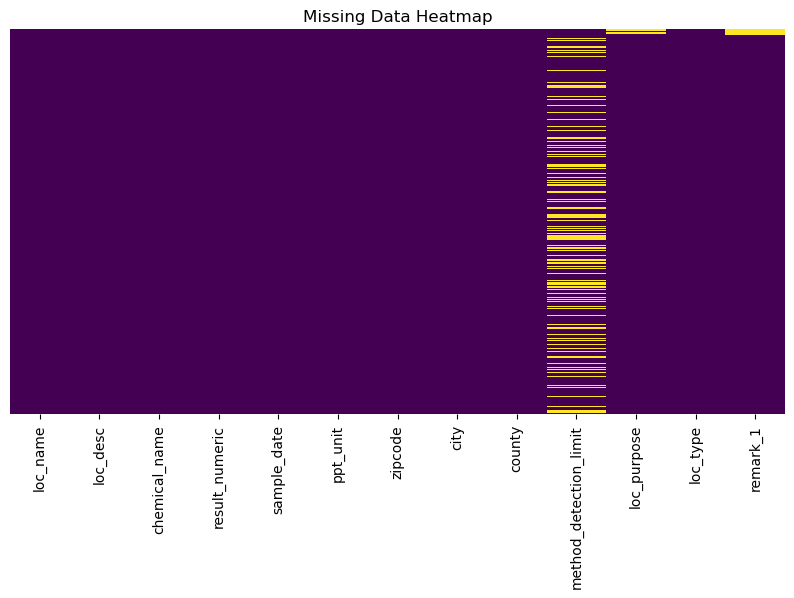

In [206]:
# Count missing values
missing_values = merged_pfas_cleaned.isnull().sum()
missing_percentage = (missing_values / len(merged_pfas_cleaned)) * 100

# Display missing values
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by="Missing Values", ascending=False))

# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(merged_pfas_cleaned.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

### Encoding Categorical Variables  

To prepare the PFAS dataset for machine learning, categorical variables are encoded using Label Encoding. This converts location names, chemical types, and other categorical fields into numerical values for model training.

In [208]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset
encoded_pfas = merged_pfas.copy()

# Encode categorical variables
categorical_cols = ["county", "city", "loc_name", "loc_desc", "chemical_name", "loc_type", "loc_purpose", "remark_1"]
for col in categorical_cols:
    encoded_pfas[col] = LabelEncoder().fit_transform(encoded_pfas[col].astype(str))  # Convert to string first to handle NaNs

### Fill Missing with Median

In [210]:
# Fill missing numerical values with median
encoded_pfas.fillna(encoded_pfas.median(numeric_only=True), inplace=True)

In [211]:
encoded_pfas.head()

loc_name  loc_desc  chemical_name  result_numeric sample_date ppt_unit  \
0       356       123             14             0.0  2022-10-17      ppt   
1       356       123              6             0.0  2022-10-17      ppt   
2       356       123             17             0.0  2022-10-17      ppt   
3       356       123             23             0.0  2022-10-17      ppt   
4       356       123             26             0.0  2022-10-17      ppt   

  zipcode  city  county  method_detection_limit  loc_purpose  loc_type  \
0   80814    80      57                     1.9            2         0   
1   80814    80      57                     1.9            2         0   
2   80814    80      57                     1.9            2         0   
3   80814    80      57                     1.9            2         0   
4   80814    80      57                     1.9            2         0   

   remark_1  
0         5  
1         5  
2         5  
3         5  
4         5

In [212]:
encoded_pfas = encoded_pfas.drop(columns=["sample_date", "ppt_unit"])

### Find Coorelations with PFAS Concentration

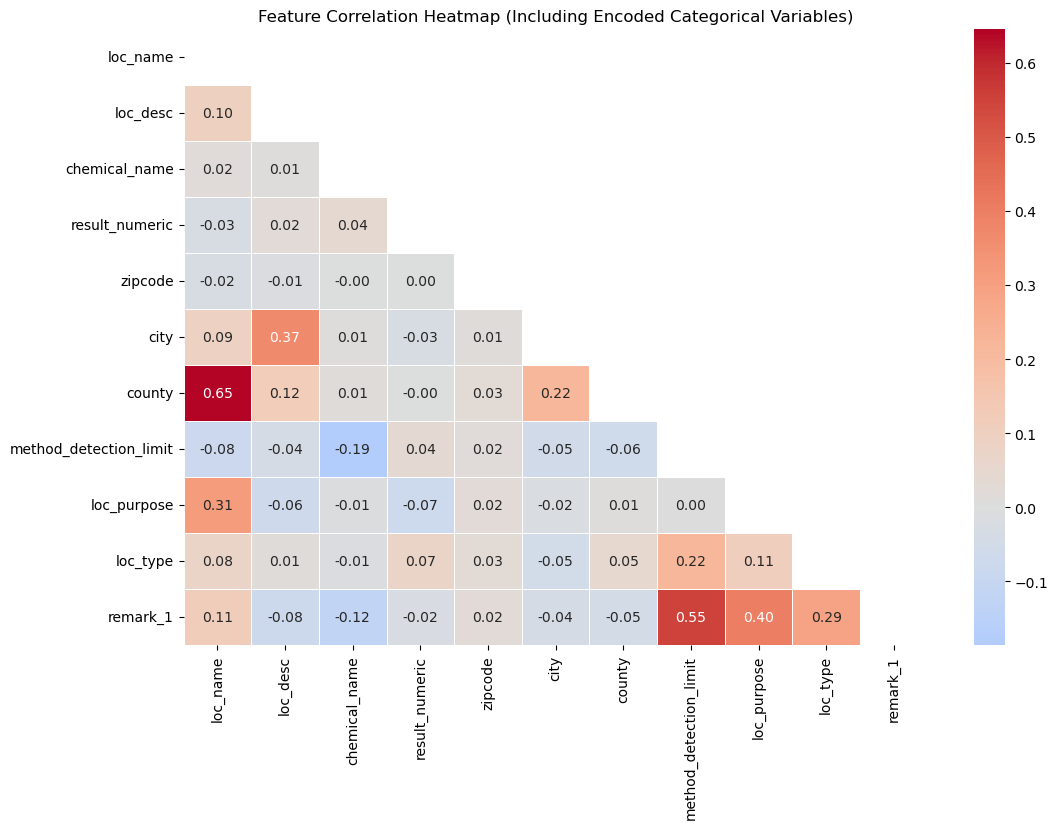

In [214]:
# Compute correlation matrix
corr_matrix = encoded_pfas.corr()

# Set up mask to hide redundant values
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with annotation and sorting
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,  # Show correlation values
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    mask=mask,  # Hide upper triangle for clarity
    center=0  # Center at 0 to distinguish positive/negative correlations
)
plt.title("Feature Correlation Heatmap (Including Encoded Categorical Variables)")
plt.show()

In [215]:
# Sort correlations with PFAS levels (excluding self-correlation of 1.0)
pfas_corr = corr_matrix["result_numeric"].drop("result_numeric").sort_values(ascending=False)

# Display strongest positive & negative correlations
print("Top Positive Correlations with PFAS Levels:\n", pfas_corr.head(5))
print("\n Top Negative Correlations with PFAS Levels:\n", pfas_corr.tail(5))

Top Positive Correlations with PFAS Levels:
 loc_type                  0.070609
chemical_name             0.043387
method_detection_limit    0.036493
loc_desc                  0.023123
zipcode                   0.000107
Name: result_numeric, dtype: float64

 Top Negative Correlations with PFAS Levels:
 county        -0.003244
remark_1      -0.022803
city          -0.029218
loc_name      -0.030278
loc_purpose   -0.072735
Name: result_numeric, dtype: float64


### Split Data for Model

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop irrelevant columns
df_ml = encoded_pfas.drop(columns=["loc_desc"])

# One-Hot Encoding for categorical variables
df_ml = pd.get_dummies(df_ml, drop_first=True)

# Define Features (X) and Target (y)
X = df_ml.drop(columns=["result_numeric"])  # Features
y = df_ml["result_numeric"]  # Target (PFAS Level)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (13690, 302), X_test shape: (3423, 302)
y_train shape: (13690,), y_test shape: (3423,)


In [219]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models & evaluate performance
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, mse, r2]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["MAE", "MSE", "R²"])
print("Model Performance:\n", results_df)

Model Performance:
      Linear Regression  Random Forest  Gradient Boosting
MAE           4.070741       2.300947           2.950407
MSE        2060.782932    1924.124660        2018.412743
R²            0.113506       0.172292           0.131732


In [220]:
print(f"y-pred shape: {y_pred.shape}, y_test shape: {y_test.shape}")

y-pred shape: (3423,), y_test shape: (3423,)


### Residuals Plot

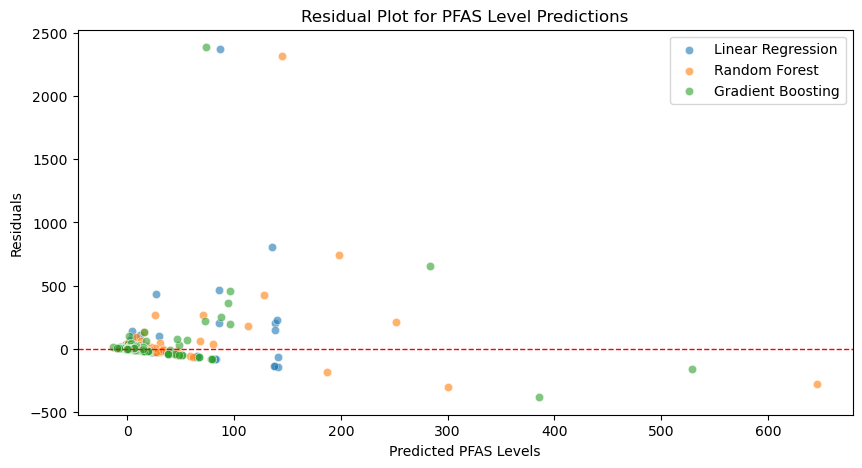

In [222]:
# Create a figure
plt.figure(figsize=(10, 5))

for name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on test data
    residuals = y_test - y_pred  # Compute residuals

    # Plot residuals
    sns.scatterplot(x=y_pred, y=residuals, label=name, alpha=0.6)

# Add reference line at zero
plt.axhline(y=0, color="red", linestyle="dashed", linewidth=1)

# Labels & title
plt.xlabel("Predicted PFAS Levels")
plt.ylabel("Residuals")
plt.title("Residual Plot for PFAS Level Predictions")
plt.legend()
plt.show()

### Log-Transform PFAS Concentration Values

In [224]:
# **Log Transform PFAS Levels (Adding 1 to avoid log(0))**
df_ml["log_result_numeric"] = np.log1p(df_ml["result_numeric"])

# Define Features (X) and Target (y)
X = df_ml.drop(columns=["result_numeric", "log_result_numeric"])  # Features
y = df_ml["log_result_numeric"]  # Log-transformed target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train & Evaluate ML Models with Log-Transformed PFAS Levels

In [226]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models & evaluate performance
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, mse, r2]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["MAE", "MSE", "R²"])
print("Model Performance:\n", results_df)

Model Performance:
      Linear Regression  Random Forest  Gradient Boosting
MAE           0.307173       0.123207           0.238464
MSE           0.324575       0.157988           0.250099
R²            0.244362       0.632191           0.417747


### Log Transformed Residuals Plot

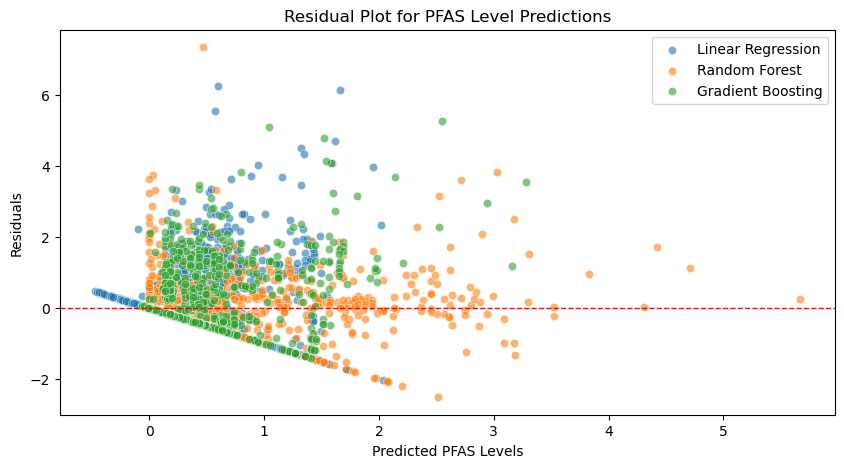

In [228]:
# Create a figure
plt.figure(figsize=(10, 5))

for name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on test data
    residuals = y_test - y_pred  # Compute residuals

    # Plot residuals
    sns.scatterplot(x=y_pred, y=residuals, label=name, alpha=0.6)

# Add reference line at zero
plt.axhline(y=0, color="red", linestyle="dashed", linewidth=1)

# Labels & title
plt.xlabel("Predicted PFAS Levels")
plt.ylabel("Residuals")
plt.title("Residual Plot for PFAS Level Predictions")
plt.legend()
plt.show()

### Feature Importance

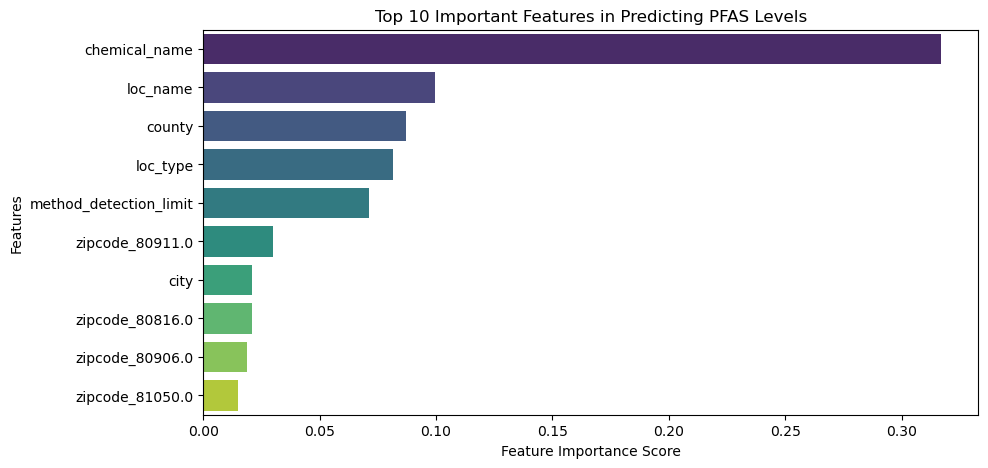

In [230]:
# Feature importance from Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], hue=feature_importance.index[:10], palette="viridis", dodge=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Predicting PFAS Levels")
plt.legend([], [], frameon=False)  # Remove legend for cleaner visualization
plt.show()

### Select Most Important Features

In [232]:
# Select only the most important features
selected_features = [
    "chemical_name",
    "loc_name",
    "loc_type",
    "method_detection_limit",
]

# Subset the data
X_selected = X[selected_features]

### Hyperparameter Tuning for Random Forest Model

In [234]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=25, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(X_selected, y)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with best parameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_selected, y)

Fitting 25 folds for each of 27 candidates, totalling 675 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

### Model Evaluation: Assessing Performance of the Refined Random Forest Model

### Model Performance on Test Data: Evaluating the Refined Random Forest Model

In [237]:
# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model again with best parameters
best_rf_model.fit(X_train, y_train)

# Predict on test data
y_test_pred = best_rf_model.predict(X_test)

# Evaluate on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Performance - MAE: {test_mae:.4f}, R² Score: {test_r2:.4f}")

Test Performance - MAE: 0.2043, R² Score: 0.4445


> ***Note:***  The refined Random Forest model, after selecting only the top features, has resulted in a lower R² score of 0.4445, indicating a decline in its ability to explain the variance in PFAS levels. While the MAE of 0.2043 remains low, the overall model performance suggests that reducing the feature set may have removed important predictive variables. 

### Generating Interaction Terms for Enhanced Feature Engineering

This step introduces interaction terms between features to capture potential relationships that may improve model performance. Polynomial features (degree=2) are created, focusing on pairwise interactions without adding higher-order terms. The transformed dataset is then used to train and evaluate the Random Forest model.

In [240]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms (degree=2 for pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_selected)

# Convert back to DataFrame with new feature names
feature_names = poly.get_feature_names_out(X_selected.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# Train Model (Random Forest)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance with Interaction Terms - MAE: {mae:.4f}, R² Score: {r2:.4f}")

Model Performance with Interaction Terms - MAE: 0.1488, R² Score: 0.5691


### Feature Selection Using Random Forest

This step applies a Random Forest model to identify and retain only the most important features based on a median importance threshold. By reducing dimensionality, the model focuses on the most relevant predictors, potentially improving performance and reducing overfitting. The refined dataset is then used to train and evaluate the Random Forest model.

In [242]:
from sklearn.feature_selection import SelectFromModel

# Train a Random Forest model for feature selection
feature_selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")
feature_selector.fit(X_selected, y)

# Keep only important features
X_selected_new = feature_selector.transform(X_selected)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected_new, y, test_size=0.2, random_state=42)

# Train Model
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance with Feature Selection - MAE: {mae:.4f}, R² Score: {r2:.4f}")

Model Performance with Feature Selection - MAE: 0.1342, R² Score: 0.5891


### Summary of Machine Learning Analysis on PFAS Contamination  

The Random Forest model performed best in predicting PFAS contamination levels after applying a log transformation to the target variable. With an R² score of 0.63, it explained a moderate portion of the variance in PFAS levels, outperforming Gradient Boosting (R² = 0.42) and Linear Regression (R² = 0.24).  

Key Findings:  
- **Most Important Features**: The strongest predictors of PFAS levels were chemical_name, location name, county, and location type, along with detection limits and select zip codes.  
- **Model Performance:** The Random Forest model achieved the lowest Mean Absolute Error (MAE = 0.12) and the highest R², indicating its effectiveness in capturing non-linear relationships in the data.  
- **Log Transformation Impact:** Applying a log transformation significantly improved model performance, reducing error and stabilizing variance.  

Next Steps:  
Further improvements may involve feature engineering, incorporating additional environmental factors, or testing advanced ensemble methods to enhance predictive accuracy. 

## Part 5 - ML Analysis on Health Risk Score Using PFAS Data  

In this section, we apply machine learning techniques to analyze **health risk scores** in relation to **PFAS contamination**. By leveraging predictive modeling we aim to identify key factors influencing health risks in PFAS-exposed areas.  

**Key Objectives:**  
- **Predictive Modeling:** Use regression models to estimate health risk scores based on PFAS exposure and other environmental factors.  
- **Feature Importance:** Determine which factors (e.g., PFAS concentration, location type, population density) are most strongly associated with health risks.  

### Merge Health with Cleaned PFAS Data

In [246]:
# Standardize county names
county_health_data["county_name"] = county_health_data["county_name"].str.title().str.strip()
merged_pfas_cleaned["county"] = merged_pfas_cleaned["county"].str.title().str.strip()

# Merge full data sets
full_pfas_health_merged = county_health_data.merge(
    merged_pfas_cleaned, left_on="county_name", right_on="county", how="inner"
)

# Drop duplicate county column
full_pfas_health_merged.drop(columns=["county"], inplace=True)

# Display dataset summary
print(full_pfas_health_merged.info())

# Show first rows
print(full_pfas_health_merged.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   county_name                           2294 non-null   object        
 1   total_population                      2294 non-null   float64       
 2   cancer_prevalence_crude               2294 non-null   float64       
 3   diabetes_prevalence_crude             2294 non-null   float64       
 4   obesity_prevalence_crude              2294 non-null   float64       
 5   high_blood_pressure_prevalence_crude  2294 non-null   float64       
 6   coronary_heart_disease_crude          2294 non-null   float64       
 7   high_cholesterol_prevalence_crude     2294 non-null   float64       
 8   health_risk_score                     2294 non-null   float64       
 9   loc_name                              2294 non-null   object        
 10  

### Missing Values

method_detection_limit    636
loc_purpose                14
remark_1                   32
dtype: int64


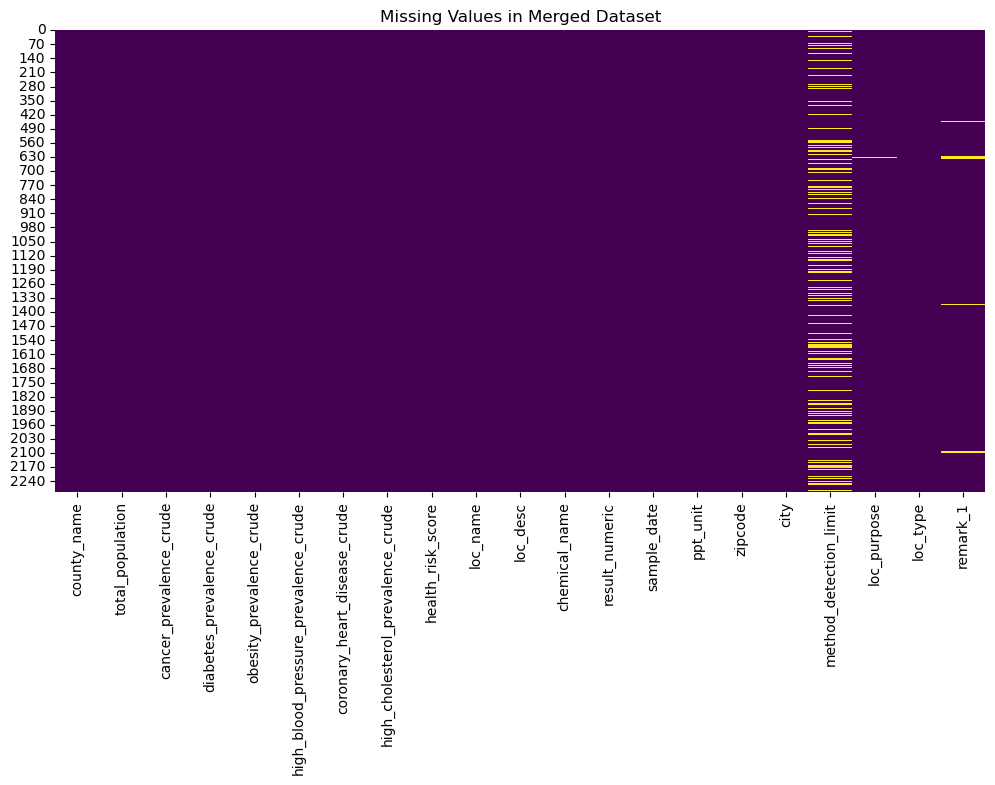

In [248]:
# Count missing values per column
missing_values = full_pfas_health_merged.isnull().sum()

# Display missing values
print(missing_values[missing_values > 0])

# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(full_pfas_health_merged.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Merged Dataset")
plt.show()

In [249]:
# Fill missing numerical values with median
full_pfas_health_merged.fillna(full_pfas_health_merged.median(numeric_only=True), inplace=True)

In [250]:
full_pfas_health_merged["log_result_numeric"] = np.log1p(full_pfas_health_merged["result_numeric"])

In [251]:
full_pfas_health_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   county_name                           2294 non-null   object        
 1   total_population                      2294 non-null   float64       
 2   cancer_prevalence_crude               2294 non-null   float64       
 3   diabetes_prevalence_crude             2294 non-null   float64       
 4   obesity_prevalence_crude              2294 non-null   float64       
 5   high_blood_pressure_prevalence_crude  2294 non-null   float64       
 6   coronary_heart_disease_crude          2294 non-null   float64       
 7   high_cholesterol_prevalence_crude     2294 non-null   float64       
 8   health_risk_score                     2294 non-null   float64       
 9   loc_name                              2294 non-null   object        
 10  

In [252]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define Features and Target
features = [
    "log_result_numeric",  # Log-transformed PFAS contamination level
    "total_population",
    "cancer_prevalence_crude",
    "diabetes_prevalence_crude",
    "obesity_prevalence_crude",
    "high_blood_pressure_prevalence_crude",
    "coronary_heart_disease_crude",
    "high_cholesterol_prevalence_crude",
    "county_name",  # Categorical features
    "zipcode",
    "city"
]

# Separate categorical and numerical features
categorical_features = ["county_name", "zipcode", "city"]
numerical_features = [col for col in features if col not in categorical_features]

# Preprocessing: Standardize numerical & one-hot encode categorical variables
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Train-Test Split
X = full_pfas_health_merged[features].dropna()
y = full_pfas_health_merged.loc[X.index, "health_risk_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models with Pipelines
models = {
    "Linear Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ("preprocessor", preprocessor),
        ("model", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
    ])
}

# Fit and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Display Model Performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Results:")
print(results_df)


Model Performance Results:
                        MAE       MSE        R²
Linear Regression  0.000516  0.000025  0.999866
Random Forest      0.000444  0.000014  0.999925
Gradient Boosting  0.004983  0.000057  0.999693


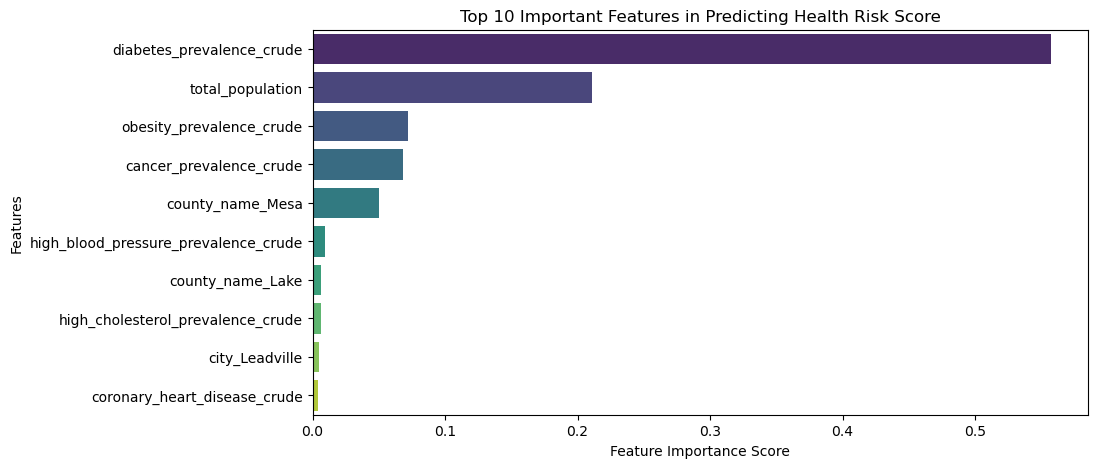

In [253]:
# Extract feature importances from the trained Random Forest model
rf_model = models["Random Forest"].named_steps["model"]  # Access trained RF model
feature_importances = rf_model.feature_importances_

# Get feature names from the preprocessor
num_features = numerical_features
cat_features = models["Random Forest"].named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_features = np.concatenate([num_features, cat_features])

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": all_features, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 5))
sns.barplot(
    x=feature_importance_df[:10]["Importance"], 
    y=feature_importance_df[:10]["Feature"], 
    hue=feature_importance_df[:10]["Feature"],  # Assign hue to the y-variable
    palette="viridis", 
    dodge=False,
    legend=False  # Hide legend to avoid clutter
)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Predicting Health Risk Score")
plt.show()


### Summary: Predicting Health Risk Score Using PFAS Data  

PFAS contamination levels did not significantly contribute to predicting the Health Risk Score. The models, especially Random Forest, performed exceptionally well (R² ≈ 1.0), but this suggests overfitting rather than meaningful insights. Diabetes prevalence and total population were the most important features, while PFAS had minimal impact. More detailed PFAS exposure data may be needed for a stronger analysis.

# Final Summary: PFAS Contamination and Health Effects Analysis

This notebook aimed to explore potential health effects of PFAS contamination by integrating environmental and health data through exploratory analysis and machine learning techniques.  

**Key Findings**  

**1. PFAS Contamination Analysis**  
- PFAS levels were analyzed across multiple locations, identifying key contamination sources.  
- Fire stations and military-related locations showed the highest PFAS levels, likely due to firefighting foam use.  
- Machine learning models predicted PFAS contamination with moderate accuracy, with Random Forest performing best after log transformation.

**2. Health Risk Score Prediction**  
- Health risk scores were modeled using PFAS levels and chronic disease prevalence.  
- PFAS levels did not significantly contribute to predicting health risk scores, suggesting either a weak relationship or insufficient granularity in the data.  
- Diabetes prevalence, total population, and high blood pressure were the strongest predictors of health risk, while PFAS levels had minimal impact.

**3. Correlation between PFAS Levels and Health Risk Scores**
- A statistical comparison indicated a higher average health risk score in high-PFAS counties (0.98) compared to low-PFAS counties (0.76), suggesting a potential association between PFAS exposure and increased health risks.
- Pearson correlation analysis yielded a correlation coefficient of 0.331, indicating a weak to moderate positive correlation between PFAS contamination and health risk scores.
- The associated p-value (0.032) demonstrated statistical significance at the 5% level, providing evidence of a meaningful relationship, though further research is necessary to establish causation.
  
**Conclusion**
While preliminary analyses revealed a statistically significant correlation between PFAS contamination and health risk scores, overall modeling did not confirm a robust predictive relationship. Future research should incorporate longitudinal health data, exposure duration, and socioeconomic factors for a more comprehensive assessment.